# Семинар по теории оптимальной транспортировки


На данном семинаре мы последовательно разберем хронологию вывода основных уравнений теории оптимальной транспортировки, рассмотрим приложение данной теории для ряда задач, и проведем обзор современного применения оптимальной траспортировки для задач машинного обучения с использованием нейронных сетей.

# Структура семинара 
## Теория
1.   Введение в оптимальную транспортировку. Постановка задачи Гаспаром Монжем (Earth Moving Distance)
2.   Проблема вычисления Earth Moving Distance. 
3.   Постановка проблемы Леонидом Канторовичем

## Практика 

1.   Использование теории оптимальной транспортировки для задачи траспортировки продуктов между пекарнями и кафе
2.   Использование теории оптимальной транспортировки для задачи транспортировки/трансфера цвета между изображениями

## Дистанция Вассерштейна и Генеративные сети
1.   Дуальная постановка Канторовича
2.   Дистанция Вассерштейна 
3.   Вассерштейн Генеративно-Состязательные Сети






---

# Введение в теорию оптимальной транспортировки


## Постановка задачи Гаспаром Монжем (Earth Moving Distance)

Задача оптимальной транспортировки в математике называется задачей Монжа-Канторовича.

Формальное описание, данное Монжем:

\\

$\displaystyle \inf_{T_{\#} \mu \ =\upsilon } \ \int _{\Omega} \ c( x,\ T( x)) \ \mu ( dx)$  

\\

Где: 

* $\Omega - \ измеримое \ пространство $
* $с:\Omega\times \Omega\ \rightarrow \mathbb{R},$ 
* $\mu ,\nu \ вероятностные\ меры\ в\ пространстве\ \mathbb{P}( \Omega)$
* $\displaystyle T\ :\ \Omega \ \rightarrow \ \Omega $

Задача заключается в минимизации этой работы поиском оптимального $\displaystyle T$
 

В данной постановке задачи это свойство мало применимо на практике в том числе в машинном обучении, так как в постановке Монжа массы не делимы. 

## Постановка проблемы Леонидом Канторовичем
Леонид Канторович изучил данную проблему в 20 веке, переформулировал и упростил ее, чем и положил начало новых исследований в данной области. 


Постановка Канторовича осуществляет некоторую relaxation допуская возможность разделения масс для сохранения пропорции. 


Канторович поставил задачу, вместо поиска transport map искать transport plan

\\
$$
\inf\iint c( x,y) \ P( dx,\ dy) ,\ \ P\in \prod ( \mu ,\ u)
$$


$\ P( X,Y) \ =\ \mu ( x) \ \times \ \nu ( Y)$

\\


Задача найти такую меру $\displaystyle P\ $ заданную на $\displaystyle X,\ Y$ что:

$\displaystyle  \begin{array}{{>{\displaystyle}l}}
\int _{\ x\ in\ X} P( dx,dy) =\nu ( y) \ -\ вся\ масса\ траспортированная\ из\ x\ \\
\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ суммируется\ в\ значение\ распределения\ \nu ( y) \ в\ этой\ точке\\
\\
\int\nolimits _{\ y\ in\ Y} P( dx,dy) =\mu ( x) \ -\ вся\ масса\ траспортированная\ из\ y\ \\
\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ суммируется\ в\ значение\ распределения\ \mu ( x) \ в\ этой\ точке
\end{array}$



При этом минимизирующую $\displaystyle \iint c( x,y) \ P( dx,\ dy)$



---



# Практика


Теория оптимальной транспортировки позволяет сравнивать два (взвешенных) облака точек $(X, a)$ и $(Y, b)$, где $X \in \mathbb{R}^{n \times d}$ и $Y \in \mathbb{R}^{m \times d}$ - расположение в $n$ (соответственно и в $m$) точек размерностью $d$, и где $a \in \mathbb{R}^n$, $b \in \mathbb{R}^m$ есть веса.

\\

Необходимым является условие, чтобы сумма весов была равна единице, то есть $\sum_{i=1}^n a_i = \sum_{j=1}^m b_j = 1$.
Базовая идея оптимальной траспортировки заключается в том, чтобы "траспортировать" массу расположенную в точках $X$ в массу расположенную в точках $Y$.

\\

Давайте обозначим через $\mathcal{U}(a,b) = \left\{ P \in \mathbb{R}^{n \times m} \,|\, P \geq 0, \sum_{j=1}^m P_{ij} = a_i, \sum_{i=1}^n P_{ij} = b_j\right\}$ множество возможных траспортных планов.
Если $P \in \mathcal{U}(a,b)$, количество $P_{ij} \geq 0$ должно рассматриваться как масса, траспортированная из точки $X_i$ в точку $Y_j$. Поэтому мы и называем эту величину планом траспортировки.

\\

Мы также будем рассматривать матрицу стоимости $C \in \mathbb{R}^{n \times m}$. Значение $C_{ij}$ может быть рассмотрено как цена, которую необходимо заплатить, чтобы траспортировать одну точку массы из $X_i$ в $Y_j$. Эта цена обычно определяется позицией $X_i$ и $Y_j$, например $C_{ij} = \|X_i - Y_j\|$ or $C_{ij} = \|X_i - Y_j\|^2$.

\\


Тогда транспортируемая по плану $P \in \mathcal{U}(a,b)$ масса имеет общую стоимость, равную $\sum_{ij} P_{ij} C_{ij}$.
В теории оптимальной транспортировки мы хотим найти такой план, который минимизирует общую стоимость. Другими словами, мы хотим решить 
$$
    \min_{P \in \mathcal{U}(a,b)} \sum_{ij} C_{ij }P_{ij}.
$$

Данная прблема является задачей линейного программирования: целевая функция линейна по $P$, и ограничения оптимизации тоже линейны для $P$. Мы можем решить данную проблему, используя классические алгоритмы линейного программирования, например симплекс-методом.

Если $P^*$ - это решение проблемы оптимальной транспортировки, мы скажем, что $P^*$ - оптимальный транспорт между $(X, a)$ и $(Y, b)$, и что $\sum_{ij} P^*_{ij} C_{ij}$ - это дистанция оптимальной траспортировки $(X, a)$ и $(Y, b)$ или, другими словами, минимальное значение энергии/работы, которое необходимо затратить, чтобы траспортировать массу, расположенную в точках $X$ в целевое значение масс, расположенных в точках $Y$.

# Использование теории оптимальной транспортировки для задачи траспортировки продуктов между пекарнями и кафе

В данной задаче мы имеем позиции пекарен $X \in \mathbb{R}^{8 \times 2}$ и соответсвующие им продукты $a \in \mathbb{R}^8$ которые описываются облаком точек. Кафе, в котором продается выпечка из пекарен, обозначены расположением $Y \in \mathbb{R}^{5 \times 2}$ и $b \in \mathbb{R}^{5}$.

In [ ]:
!pip install POT

import ot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 664 kB 3.9 MB/s 


In [ ]:
import os
!pip install --upgrade git+https://github.com/mlss-skoltech/tutorials.git#subdirectory=optimal_transport_tutorial

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/mlss-skoltech/tutorials.git to /tmp/pip-req-build-w9wqs6fi
  Running command git clone -q https://github.com/mlss-skoltech/tutorials.git /tmp/pip-req-build-w9wqs6fi
  Created wheel for optimaltransport: filename=optimaltransport-0.1-py3-none-any.whl size=7865019 sha256=4f3843785198610e3e0d6dc412714c0a22a0a8d5fbe076750e4ae8648dbaeab0
  Stored in directory: /tmp/pip-ephem-wheel-cache-5a6sxipg/wheels/93/81/f0/fbd6ec88d0527c458152912bf53e3ec6a2cd3df3b133f1fa7e
Successfully built optimaltransport


In [ ]:
import pkg_resources

DATA_PATH = pkg_resources.resource_filename('optimaltransport', 'data/')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load the data
import pickle

with open(DATA_PATH + 'croissants.pickle', 'rb') as file:
    croissants = pickle.load(file)

X = croissants['bakery_pos']
a = croissants['bakery_prod']
Y = croissants['cafe_pos']
b = croissants['cafe_prod']

print('Bakery productions =', a)
print('Café sales =', b)
print('Total number of croissants =', a.sum())

Bakery productions = [31. 48. 82. 30. 40. 48. 89. 73.]
Café sales = [82. 88. 92. 88. 91.]
Total number of croissants = 441.0


In [ ]:
X

array([[184.86464733, 201.8163543 ],
       [449.3486663 , 168.40784664],
       [245.41756746, 288.12166576],
       [273.95400109, 364.68282915],
       [494.58935376, 336.8424061 ],
       [738.19305545, 238.70491485],
       [736.10502372, 375.12298779],
       [537.74200949, 482.30861653]])

In [ ]:
Y

array([[302.08410452, 442.78633642],
       [345.1162221 , 368.52123027],
       [449.226184  , 201.94529124],
       [454.08464888, 387.95508982],
       [627.60125204, 408.7770822 ]])

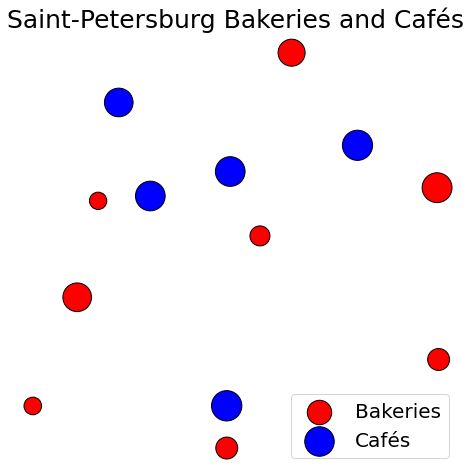

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(X[:,0], X[:,1], s=10*a, c='r', edgecolors='k', label='Bakeries')
plt.scatter(Y[:,0], Y[:,1], s=10*b, c='b', edgecolors='k', label='Cafés')
plt.legend(fontsize=20)
plt.axis('off')
plt.title('Saint-Petersburg Bakeries and Cafés', fontsize=25)
plt.show()

Вычислим матрицу стоимости, где стоимость определяется расстоянием, вычислим такую матрицу используя расстояния $\ell_1$ и $\ell_2$.


In [ ]:
C_1 = np.zeros((8,5))
C_2 = np.zeros((8,5))
for i in range(8):
    for j in range(5):
        C_1[i,j] = np.linalg.norm(X[i]-Y[j])
        C_2[i,j] = C_1[i,j]**2

In [ ]:
C_2

array([[ 71806.93342368,  53471.0828867 ,  69887.03869363,
        107127.03809694, 238848.44404326],
       [ 96970.40680838,  50909.76872922,   1124.77519163,
         48223.42151718,  89551.35372338],
       [ 27132.25677185,  16403.91170975,  48964.31969921,
         53508.66342873, 160622.09827457],
       [  6891.46056701,   5078.79502259,  57203.84434635,
         32988.64839201, 127010.6812586 ],
       [ 48282.38735754,  23345.76498866,  20255.04876894,
          4253.1375545 ,  22866.76271036],
       [231840.24371169, 171361.67266306,  84853.12272464,
        102993.20141004,  41155.08908898],
       [192952.48705117, 152915.82619273, 112289.98326498,
         79700.15466443,  12905.66653869],
       [ 57096.65880001,  50052.26323952,  86438.64553436,
         15901.14198628,  13481.57001385]])

Теперь вычислим с помощью библиотеки ОТ оптимальную траспортировку выпечки из перкарен в кафе, для двух матриц расстояния по $\ell_1$ и $\ell_2$

In [ ]:
optimal_plan_1 = ot.emd(a, b, C_1)
print(optimal_plan_1)
optimal_cost_1 = np.sum(optimal_plan_1*C_1)
print('1-Wasserstein distance =', optimal_cost_1)
print('')

optimal_plan_2 = ot.emd(a, b, C_2)
print(optimal_plan_2)
optimal_cost_2 = np.sum(optimal_plan_2*C_2)
print('2-Wasserstein distance =', np.sqrt(optimal_cost_2))

[[ 0. 31.  0.  0.  0.]
 [ 0.  0. 48.  0.  0.]
 [25. 57.  0.  0.  0.]
 [30.  0.  0.  0.  0.]
 [ 0.  0.  0. 40.  0.]
 [ 0.  0. 44.  2.  2.]
 [ 0.  0.  0.  0. 89.]
 [27.  0.  0. 46.  0.]]
1-Wasserstein distance = 61523.15971278249

[[ 0. 31.  0.  0.  0.]
 [ 0.  0. 48.  0.  0.]
 [52. 30.  0.  0.  0.]
 [30.  0.  0.  0.  0.]
 [ 0. 27.  0. 13.  0.]
 [ 0.  0. 44.  2.  2.]
 [ 0.  0.  0.  0. 89.]
 [ 0.  0.  0. 73.  0.]]
2-Wasserstein distance = 3292.139032582319


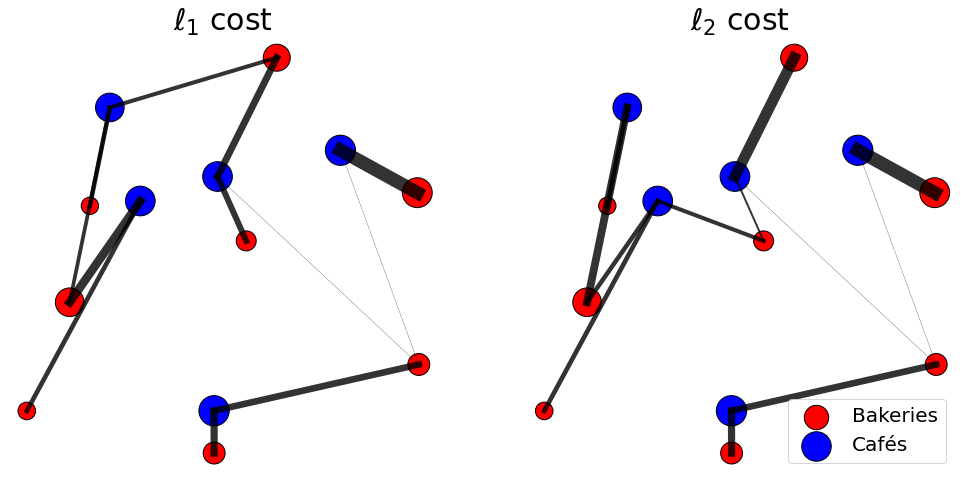

In [ ]:
fig = plt.figure(figsize=(17,8))

ax = fig.add_subplot(1, 2, 1)
ax.scatter(X[:,0], X[:,1], s=10*a, c='r', edgecolors='k', label='Bakeries')
ax.scatter(Y[:,0], Y[:,1], s=10*b, c='b', edgecolors='k', label='Cafés')
for i in range(8):
    for j in range(5):
        ax.plot([X[i,0], Y[j,0]], [X[i,1], Y[j,1]], c='k', lw=0.15*optimal_plan_1[i,j], alpha=0.8)
ax.axis('off')
ax.set_title('$\ell_1$ cost', fontsize=30)

ax = fig.add_subplot(1, 2, 2)
ax.scatter(X[:,0], X[:,1], s=10*a, c='r', edgecolors='k', label='Bakeries')
ax.scatter(Y[:,0], Y[:,1], s=10*b, c='b', edgecolors='k', label='Cafés')
for i in range(8):
    for j in range(5):
        ax.plot([X[i,0], Y[j,0]], [X[i,1], Y[j,1]], c='k', lw=0.15*optimal_plan_2[i,j], alpha=0.8)
ax.axis('off')
ax.set_title('$\ell_2$ cost', fontsize=30)

plt.legend(fontsize=20)
plt.show()

## Использование теории оптимальной транспортировки для задачи транспортировки/трансфера цвета между изображениями

Для исходного и целевого изображений цель передачи цвета состоит в том, чтобы преобразовать цвета исходного изображения так, чтобы оно было похоже на цветовую палитру целевого изображения. В конце концов, мы хотим найти «цветовое отображение», дающее каждому цвету исходного изображения новый цвет. Это можно сделать, вычислив оптимальный транспортный план между двумя изображениями, которые видны как облака точек в пространстве RGB.

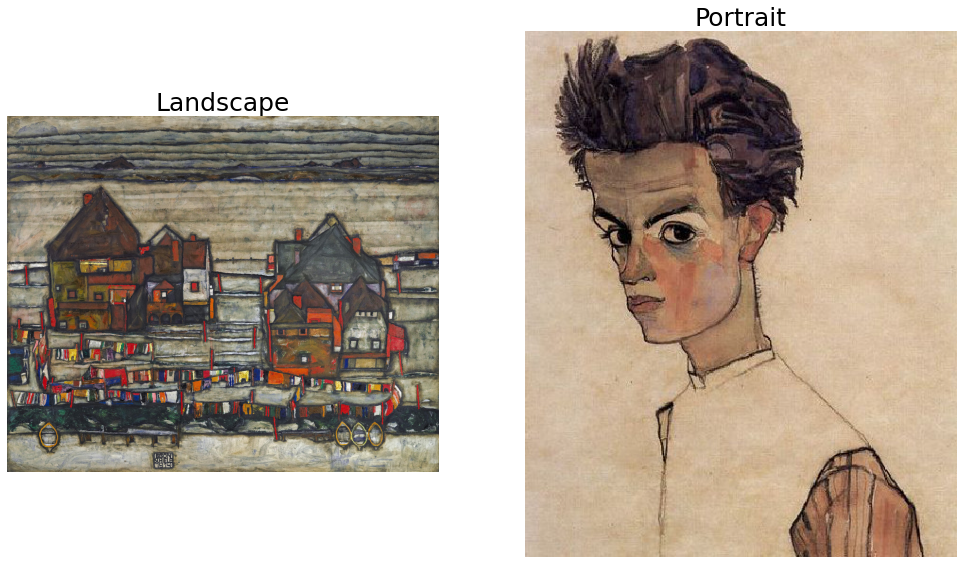

In [ ]:
import numpy as np
import ot
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
from mpl_toolkits.mplot3d import Axes3D

I1 = imread(DATA_PATH + 'schiele.jpg').astype(np.float64) / 256
I2 = imread(DATA_PATH + 'schiele2.jpg').astype(np.float64) / 256

fig = plt.figure(figsize=(17, 30))

ax = fig.add_subplot(1, 2, 1)
ax.imshow(I1)
ax.set_title('Landscape', fontsize=25)
ax.axis('off')

ax = fig.add_subplot(1, 2, 2)
ax.imshow(I2)
ax.set_title('Portrait', fontsize=25)
ax.axis('off')

plt.show()

Нам нужно будет работать с «матрицами» вместо изображений. Поскольку существует 3 цвета, изображения имеют форму (Ширина, Высота, 3), а соответствующие матрицы будут иметь форму (Ширина * Высота, 3).

In [ ]:
def im2mat(I):
    '''Convert image I to matrix.'''
    return I.reshape(-1,3)

def mat2im(X, shape):
    '''Convert matrix X to image with shape 'shape'.'''
    return X.reshape(shape)

X1 = im2mat(I1)
X2 = im2mat(I2)

В реальных изображениях слишком много разных цветов, поэтому нам потребуется их подвыборка. Для этого мы используем K-средние для всех цветов и оставляем только вычисленные центроиды. Обратите внимание, что использование мини-пакетных K-средних ускоряет вычисления.

In [ ]:
from sklearn.cluster import MiniBatchKMeans

# Size of the subsampled point clouds
nbsamples = 1000

kmeans1 = MiniBatchKMeans(n_clusters=nbsamples, init_size=nbsamples).fit(X1)
X1_sampled = kmeans1.cluster_centers_

kmeans2 = MiniBatchKMeans(n_clusters=nbsamples, init_size=nbsamples).fit(X2)
X2_sampled = kmeans2.cluster_centers_

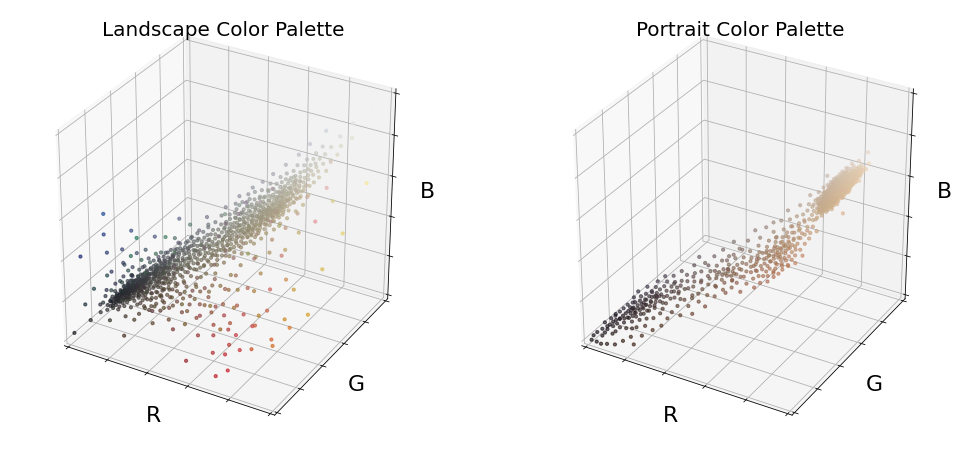

In [ ]:
def showImageAsPointCloud(X, Y):
    '''Show the color palette associated with images X and Y.'''
    fig = plt.figure(figsize=(17,8))
    ax = fig.add_subplot(121, projection='3d')
    ax.set_xlim(0,1)
    ax.scatter(X[:,0], X[:,1], X[:,2], c=X, s=10, marker='o', alpha=0.6)
    ax.set_xlabel('R',fontsize=22)
    ax.set_xticklabels([])
    ax.set_ylim(0,1)
    ax.set_ylabel('G',fontsize=22)
    ax.set_yticklabels([])
    ax.set_zlim(0,1)
    ax.set_zlabel('B',fontsize=22)
    ax.set_zticklabels([])
    ax.set_title('Landscape Color Palette', fontsize=20)
    ax.grid('off')
    
    ax = fig.add_subplot(122, projection='3d')
    ax.set_xlim(0,1)
    ax.scatter(Y[:,0], Y[:,1], Y[:,2], c=Y, s=10, marker='o', alpha=0.6)
    ax.set_xlabel('R',fontsize=22)
    ax.set_xticklabels([])
    ax.set_ylim(0,1)
    ax.set_ylabel('G',fontsize=22)
    ax.set_yticklabels([])
    ax.set_zlim(0,1)
    ax.set_zlabel('B',fontsize=22)
    ax.set_zticklabels([])
    ax.set_title('Portrait Color Palette', fontsize=20)
    ax.grid('off')
    
    plt.show()
showImageAsPointCloud(X1_sampled, X2_sampled)

Для того, чтобы вычислить оптимальную траспортировку между двумя облаками точек, как и в предыдущей задаче, мы сперва должны задать некоторую дистанцию и в данной задаче мы будем использовать квадратичную дистанцию $C_{ij} = \|X_i - Y_j\|^2$.

In [ ]:
C_1 = np.ones((nbsamples,nbsamples))
C_2 = np.ones((nbsamples,nbsamples))
for i in range(nbsamples):
    for j in range(nbsamples):
        C_1[i,j] = np.linalg.norm(X1_sampled[i]-X2_sampled[j])
        C_2[i,j] = C_1[i,j]**2

In [ ]:
OT_plan = ot.emd(np.ones(nbsamples), np.ones(nbsamples), C_2)

In [ ]:
def colorTransfer(OT_plan, kmeans1, kmeans2, shape):
    '''Return the color-transfered image of shape "shape".'''
    samples_transformed = OT_plan.dot(kmeans2.cluster_centers_)
    X1_transformed = samples_transformed[kmeans1.labels_]
    return mat2im(X1_transformed, shape)

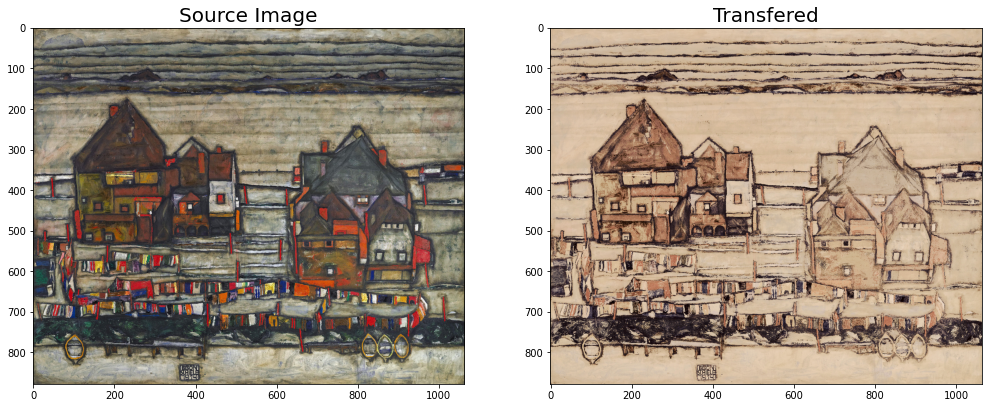

In [ ]:
fig = plt.figure(figsize=(17, 20))

ax = fig.add_subplot(1, 2, 1)
ax.imshow(I1)
ax.set_title('Source Image', fontsize=20)

ax = fig.add_subplot(1, 2, 2)
I = colorTransfer(OT_plan, kmeans1, kmeans2, I1.shape)
ax.imshow(I)
ax.set_title('Transfered', fontsize=20)

plt.show()

--- 

 ## Дистанция Вассерштейна и Генеративно-Состязательные Сети 

## Двойственная постановка Канторовича


\\

$$Primal:\inf_{P\in \prod ( \mu ,\nu )}\iint c( x,y) \ P( dx,\ dy)$$ 

\\

$$Dual:\displaystyle \sup _{ \begin{array}{{>{\displaystyle}l}}
\phi \in L_{1}( \mu ) ,\ \psi \ \in L_{1}( \nu )\\
\phi ( x) \ +\psi ( y) \ \leqslant c( x,y)
\end{array}}\int \phi d\mu +\int \psi d\nu \ $$  

\\
Логически возникающий вопрос: откуда двойственная постановка собственно возникает, и что означают переменные там возникающие?

Глобально, идея данного подхода заключается в перестановке ограничений и переменных местами, при этом задача минимизации меняется на задачу максимизации.

Осуществим вывод двойственной постановки:

\\

$$ 
L_{\prod }( P) \ =\ \sup _{\phi ,\psi }\left[\int \phi d\mu +\int \psi d\nu -\iint \phi \ \oplus \ \psi dP\right] \ =\{0\ if\ P\in \prod ( \mu ,\nu ) \ \ or\ +\infty \ otherwise\ \\
$$

\\
Данное выражение выглядит достаточно сложно. Глобально это выражение есть представление задачи оптимизации в такой форме, чтобы оптимизируя ее, мы смогли найти правильную функцию P, то есть правильный coupling. 

Это выражение утверждает, что функция от $\displaystyle P\ $(coupling) равна нулю, если мы имеем правильные маргинальные распределения, и плюс бесконечность в любом другом случае. 


В данном выражении мы берем supremum от 

$$\displaystyle \int \phi d\mu +\int \psi d\nu $$

\\

Отнимаем от этих функций

$$\displaystyle \iint \phi \ \oplus \ \psi dP$$ 
Где это выражение есть ничто иное как: 

\\
$$\displaystyle \iint \phi \ ( x) \ dP(x ,y) \ +\ \iint \psi ( y) dP( x,y)$$
\\

Как результат, если функция P задает правильные маргиналы, то, так как 

\\
$$\displaystyle \int \phi d\mu \ =\iint \phi ( x) dP(x ,y) \ \ и\ \int \psi d\nu \ =\ \iint \psi ( y) dP( x,y) $$ 

\\
Наше выражение будет равно нулю. Если coupling неверный, значит, где-то мы будем иметь ненулевое значение, и следовательно, мы всегда можем максимизировать функции $\displaystyle \phi ,\ \psi $ в плюс бесконечность. 



Далее проделываем трюк перехода в двойственную задачу. 

Запишем функцию, которую необходимо оптимизировать:

\\

$$\displaystyle \inf_{P\in \prod ( \mu ,\nu )}\iint cdP$$ и у нас есть некоторое условие, которое мы можем превратить в часть объектной функции 
$$\displaystyle \inf_{P\in P_{+}\left( \Omega^{2}\right)}\iint cdP+\ L_{\prod }( P)$$

\\

Запишем задачу в более детальной форме.

\\

$$\displaystyle \inf_{P\in P_{+}\left( \Omega^{2}\right)}\iint cdP+\sup _{\phi ,\psi }\int \phi d\mu +\int \psi d\nu -\iint \phi \ \oplus \ \psi dP\ $$

\\

Далее начинается алгебраическая игра по упрощению выражения. Осуществим перемещение мест $\displaystyle \inf ,\sup $. Доказательство возможности такой перестановки выходит за рамки данного курса.  

\\

$$\displaystyle \inf_{P\in P_{+}\left( \Omega^{2}\right)}\sup _{\phi ,\psi }\iint cdP+\int \phi d\mu +\int \psi d\nu -\iint \phi \ \oplus \ \psi dP$$

\\

Перенесем все члены (terms) с $\displaystyle P$ влево

\\

$$\displaystyle \inf_{P\in P_{+}\left( \Omega^{2}\right)}\sup _{\phi ,\psi }\iint cdP-\iint \phi \ \oplus \ \psi dP+\int \phi d\mu +\int \psi d\nu $$
\\
 

В таком случае более явно видно, что мы имеем два двойных интеграла по $\displaystyle P$. Их можно объеденить. 

\\

$$\displaystyle \inf_{P\in P_{+}\left( \Omega^{2}\right)}\sup _{\phi ,\psi }\iint ( c-\phi \ \oplus \ \psi ) dP+\int \phi d\mu +\int \psi d\nu $$

\\

И снова инверсия $\displaystyle \sup -\inf \ $

$$\displaystyle \sup _{\phi ,\psi } \ \inf_{P\in P_{+}\left( \Omega^{2}\right)}\iint ( c-\phi \ \oplus \ \psi ) dP+\int \phi d\mu +\int \psi d\nu $$

\\

В таком случае, в выражении, в первую очередь происходит интегрирование по $\displaystyle P$ и только потом по $\displaystyle \psi ,\phi $. 

\\

Вопрос, насколько низкие значения может принимать первая часть выражения? 

$$\displaystyle \inf_{P\in P_{+}\left( \Omega^{2}\right)}\left[\iint ( c-\phi \ \oplus \ \psi ) dP\right] =\ \inf_{P\in P_{+}\left( \Omega^{2}\right)}\left[ с( x,y) -\iint \phi ( x) dP(x ,y) \ +\iint \psi ( y) dP( x,y)\right] \ $$  

 

$$\displaystyle \inf_{P\in P_{+}\left( \Omega^{2}\right)}\iint ( c-\phi \ \oplus \ \psi ) dP\ =\ 0\ if\ \ c-\phi \ \oplus \ \psi \ \geqslant \ 0\ \ and\ -\infty \ otherwise$$


То есть если $\displaystyle c-\phi \ \oplus \ \psi $ ⩽ 0, то так как мы берем infimum, наши значения функций будут принимать значения, уходящие в минус бесконечность. Но если у нас $\displaystyle c-\phi \ \oplus \ \psi $ ⩾ 0,  то, так как мы берем infimum, самый минимум, который мы можем получить это 0. Так как мы не максимизируем, риска, что выражение начнет принимать значение плюс бесконечность у нас нет. Поэтому имеем два условия, и затем просто транслируем это свойство, как необходимое условие для того, чтобы мы имели решение двойственной постановки. 

$$\displaystyle \sup _{\phi \ \oplus \ \psi \ \leqslant c}\int \phi d\mu +\int \psi d\nu $$ - Dual


## Дистанция Вассерштейна

Дистанция Вассерштейна есть ничто иное, как задача Кантаровича, на которой задана некоторая метрика. В зависимости от метрики у нас будут выстраиваться определенные свойства.

Дистанция Вассерштейна определяется в любой размерности и имеет следующий общий вид: 
$$W_{p}^{p}(\mu ,\nu)=\inf _{P} \int P(x, y)\|x-y\|_{k}^{k} d x d y$$

Дистанция Вассерштейна в двойственной постановке.



$$\displaystyle W^{p}_{p}( \mu ,\nu ) \ =\ \sup _{ \begin{array}{{>{\displaystyle}l}}
\phi \ ( x) \in L_{1}( \mu ) ,\ \psi ( y) \ \in L_{1}( \nu )\\
\phi ( x) \ \oplus \ \psi ( y) \ \leqslant D^{p}( x,y)
\end{array}}\int \phi d\mu +\int \psi d\nu $$

При двойственной постановке возникает вопрос о возможности еще сократить размерность параметров, которые нам необхомдимо оптимизировать. Несмотря на то, что мы сократили размер параметров, некоторая сложность c размерностью $\displaystyle \Omega$ все же сохраняется. 



Чтобы сократить размерность была применена достаточно интересная теория, под названием D - transforms, которая уходит корнями к выпуклой оптимизации. 



Идея ее в следующем: 

Представим, что мы нашли некоторую функцию $\displaystyle \phi $. Как мы можем найти $\displaystyle \psi $?

Имея заданное нами ограничение $\displaystyle \phi \ \oplus \ \psi \ \leqslant D( x,y)$ мы можем легко вывести $\displaystyle \psi $ при имеющемся $\displaystyle \phi $.



$\displaystyle  \begin{array}{{>{\displaystyle}l}}
\psi ( y) \ \leqslant D^{p}( x,y) -\ \phi ( x) \ \\
\\
\psi ( y) \ \leqslant \inf_{x} D^{p}( x,y) -\ \phi ( x) \ 
\end{array}$



Определяя в этом уравнении infimum мы собственно и определяем функцию $\displaystyle \psi $



$\displaystyle \phi ^{'}( y) \ \leqslant \inf_{x} D^{p}( x,y) -\ \phi ( x)$

$\displaystyle W^{p}_{p}( \mu ,\nu ) \ =\ \sup _{\phi \ }\int \phi d\mu +\int \phi 'd\nu $


$\displaystyle W^{p}_{p}( \mu ,\nu ) \ =\ \sup _{\phi \ is\ D^{p} \ concave}\int \phi d\mu +\int \phi 'd\nu $ - Semi Dual 



Важным замечанием является то, что: $\displaystyle D^{p} \ concave\ equal\ to\ L_{1} \ Lipshetz\ $

То есть, если функции Липшецевы, тогда дистанция является дистанцией Вассерштейна. Доказательство этого выходит за рамки данного семинара.




В случае если $\displaystyle D^{1}$, то есть p=1, тогда мы можем записать дистанцию Вассерштейна так:



$\displaystyle W^{1}_{p}( \mu ,\nu ) \ =\ \sup _{\phi \ is\ D^{p} \ concave}\int \phi ( d\mu -d\nu )$


Для удобства заменим обозначение функции через $f$


$$W_{c}[p, q]=\sup _{f \in L_{c}}\left[\int f(x) p(x) d x-\int f(y) q(y) d y\right]$$

И запишем условие этой оптимизации такое, что функция $f$ должна оставаться Липшецевой 

Давайте теперь подумаем еще раз, какую задачу решает функция $f$ в данной формулировке: Предположим что распределения, с которыми мы работаем, являются распределениями изображений людей $P$ и животных $Q$

Однако сама по себе формула имеет довольно интуитивное толкование. Очевидно, что если
p равно q, разница между их ожидаемыми значениями любой функции f будет равна нулю, и, следовательно, расхождение исчезнет. Теперь предположим, что p и q различаются в некоторой области своего домена. В этом случае расхождение получается путем нахождения функции f, которая максимизирует эту разницу в терминах ее ожидаемого значения. Другими словами, f действует как детектор признаков, максимально отличающих p от q. Например, представьте, что p - это распределение по изображениям ландшафта без следов человеческой деятельности, а q - распределение по изображениям ландшафта с самолетом в небе. В этом случае оптимальным f будет плоский детектор. Из этого примера вы можете увидеть, как f играет роль дискриминатора в Wasserstein GAN. Обратите внимание, что без каких-либо ограничений на f любую небольшую разницу в распределениях можно произвольно увеличить, и расхождение будет бесконечным.

Давайте теперь используем нейронные сети в качестве функции $f$

In [1]:
import argparse
import os
import numpy as np
import math
import sys

In [ ]:
!pip install torch

In [ ]:
!pip install torchvision

In [19]:
import torchvision.transforms as transforms
from torchvision.utils import save_image

from torch.utils.data import DataLoader
from torchvision import datasets
from torch.autograd import Variable

import torch.nn as nn
import torch.nn.functional as F
import torch
from matplotlib import pyplot as plt
from PIL import Image
from tqdm import tqdm

In [3]:
dataloader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=64, shuffle=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



In [4]:
img_shape = (1, 28, 28)
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()

        self.model = nn.Sequential(
            nn.Linear(int(np.prod(28*28)), 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 1),
        )

    def forward(self, img):
        img_flat = img.view(img.shape[0], -1)
        validity = self.model(img_flat)
        return validity


# Initialize generator and discriminator
discriminator = Discriminator()

# Optimizers
optimizer_D = torch.optim.RMSprop(discriminator.parameters(), lr=0.00005)

Но какие распределения мы будем использовать? Давайте попробуем вместо P использовать распределения, которые мы получаем некоторой функцией, преобразующей нормальное распределение некоторой размерности. 

In [5]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()

        def block(in_feat, out_feat, normalize=True):
            layers = [nn.Linear(in_feat, out_feat)]
            if normalize:
                layers.append(nn.BatchNorm1d(out_feat, 0.8))
            layers.append(nn.LeakyReLU(0.2, inplace=True))
            return layers

        self.model = nn.Sequential(
            *block(100, 128, normalize=False),
            *block(128, 256),
            *block(256, 512),
            *block(512, 1024),
            nn.Linear(1024, int(np.prod(img_shape))),
            nn.Tanh()
        )

    def forward(self, z):
        img = self.model(z)
        img = img.view(img.shape[0], *img_shape)
        return img

generator = Generator()
optimizer_G = torch.optim.RMSprop(generator.parameters(), lr=0.00005)


Теперь попробуем обучить функцию генератора таким образом, чтобы то распределение, в которое он трансформирует нормальное было максимально близко к распределению изображений $P_{θ}=g_{\theta}(Z)$ to match $P_r$. 

Мы можем для фиксированного $g_{\theta}$ вычислить функцию $f_{w}$ так, чтобы она показывала точную дистанцию Вассерштейна между сгенерированными и реальными изображениями.
Затем мы можем использовать данное значение для обучения генератора с помощью backprop

$$\begin{aligned} \nabla_{\theta} W\left(P_{r}, P_{\theta}\right) &=\nabla_{\theta}\left(\mathbb{E}_{x \sim P_{r}}\left[f_{w}(x)\right]-\mathbb{E}_{z \sim Z}\left[f_{w}\left(g_{\theta}(z)\right)\right]\right) \\ &=-\mathbb{E}_{z \sim Z}\left[\nabla_{\theta} f_{w}\left(g_{\theta}(z)\right)\right] \end{aligned}$$ 

Алгоритм будет выглядеть так:

*   For a fixed $\theta$, compute an approximation of $W(P_r,P_\theta)$ by training fw to convergence.
* Once we find the optimal fw, compute the θ gradient $ -\mathbb{E}_{z \sim Z}\left[\nabla_{\theta} f_{w}\left(g_{\theta}(z)\right)\right]$ by sampling several $z$.
*   Update θ, and repeat the process.



In [20]:
# denormalization image from range (-1)-1 to range 0-1 to display it
def denorm(x):
    image = (x + 1.) / 2
    
    return image

In [21]:
sample_dir = "./images"

if not os.path.exists(sample_dir):
    os.makedirs(sample_dir)

# function to save the sample output of generator
def save_fake_images_mnist(G_model, index):
    # sample_vectors = torch.randn(batch_size, latent_size).to(device)
    sample_vectors = torch.Tensor(np.random.normal(0, 1, (100, 100)))
    fake_images = G_model(sample_vectors)
    fake_images = fake_images.reshape(fake_images.size(0), 1, 28, 28)
    #print(fake_images)
    fake_fname = "fake_images-{0:0=4d}.png".format(index)
    print("Saving", fake_fname)
    save_image(denorm(fake_images), os.path.join(sample_dir, fake_fname), nrow=10)

In [22]:
Tensor = torch.FloatTensor
batches_done = 0
for epoch in tqdm(range(250)):

    for i, (imgs, _) in enumerate(dataloader):

        # Configure input
        real_imgs = Variable(imgs)

        # ---------------------
        #  Train Discriminator
        # ---------------------

        optimizer_D.zero_grad()

        # Sample noise as generator input
        z = Variable(Tensor(np.random.normal(0, 1, (imgs.shape[0], 100))))

        # Generate a batch of images
        fake_imgs = generator(z).detach()
        # Adversarial loss
        d_real = discriminator(real_imgs)
        d_fake = discriminator(fake_imgs)
        loss_D = d_fake.mean() - d_real.mean()

        loss_D.backward()
        optimizer_D.step()

        # Clip weights of discriminator
        for p in discriminator.parameters():
            p.data.clamp_(-0.01, 0.01)

        # Train the generator every n_critic iterations
        if i % 5 == 0:

            # -----------------
            #  Train Generator
            # -----------------

            optimizer_G.zero_grad()

            # Generate a batch of images
            gen_imgs = generator(z)
            # Adversarial loss
            d_fake = discriminator(gen_imgs)
            loss_G = -d_fake.mean()

            loss_G.backward()
            optimizer_G.step()

            print(
                "[Epoch %d/%d] [Batch %d/%d] [D loss: %f] [G loss: %f]"
                % (epoch, 100, batches_done % len(dataloader), len(dataloader), loss_D.item(), loss_G.item())
            )
        
        batches_done += 1
        
    save_fake_images_mnist(generator, epoch)

  0%|          | 0/250 [00:00<?, ?it/s]

[Epoch 0/100] [Batch 0/938] [D loss: -0.048477] [G loss: 0.009785]
[Epoch 0/100] [Batch 5/938] [D loss: -0.073941] [G loss: 0.008734]
[Epoch 0/100] [Batch 10/938] [D loss: -0.248417] [G loss: 0.005612]
[Epoch 0/100] [Batch 15/938] [D loss: -0.535958] [G loss: -0.006088]
[Epoch 0/100] [Batch 20/938] [D loss: -0.914029] [G loss: -0.032099]
[Epoch 0/100] [Batch 25/938] [D loss: -1.266354] [G loss: -0.075640]
[Epoch 0/100] [Batch 30/938] [D loss: -1.582871] [G loss: -0.135489]
[Epoch 0/100] [Batch 35/938] [D loss: -1.973979] [G loss: -0.226217]
[Epoch 0/100] [Batch 40/938] [D loss: -2.645815] [G loss: -0.317358]
[Epoch 0/100] [Batch 45/938] [D loss: -2.748523] [G loss: -0.452791]
[Epoch 0/100] [Batch 50/938] [D loss: -3.120366] [G loss: -0.602001]
[Epoch 0/100] [Batch 55/938] [D loss: -3.453667] [G loss: -0.781139]
[Epoch 0/100] [Batch 60/938] [D loss: -3.906367] [G loss: -0.994107]
[Epoch 0/100] [Batch 65/938] [D loss: -4.257996] [G loss: -1.208655]
[Epoch 0/100] [Batch 70/938] [D loss: -

  0%|          | 1/250 [00:42<2:58:25, 42.99s/it]

Saving fake_images-0000.png
[Epoch 1/100] [Batch 0/938] [D loss: -0.515742] [G loss: -4.800226]
[Epoch 1/100] [Batch 5/938] [D loss: -0.593063] [G loss: -4.315302]
[Epoch 1/100] [Batch 10/938] [D loss: -0.369970] [G loss: -3.983089]
[Epoch 1/100] [Batch 15/938] [D loss: -0.612973] [G loss: -3.752711]
[Epoch 1/100] [Batch 20/938] [D loss: -0.630517] [G loss: -3.460927]
[Epoch 1/100] [Batch 25/938] [D loss: -0.520834] [G loss: -3.203620]
[Epoch 1/100] [Batch 30/938] [D loss: -1.559348] [G loss: -2.952602]
[Epoch 1/100] [Batch 35/938] [D loss: -1.141035] [G loss: -2.726932]
[Epoch 1/100] [Batch 40/938] [D loss: -1.093800] [G loss: -2.416418]
[Epoch 1/100] [Batch 45/938] [D loss: -1.305840] [G loss: -1.900717]
[Epoch 1/100] [Batch 50/938] [D loss: -1.883169] [G loss: -1.216869]
[Epoch 1/100] [Batch 55/938] [D loss: -1.827576] [G loss: -0.236920]
[Epoch 1/100] [Batch 60/938] [D loss: -2.344857] [G loss: 0.581346]
[Epoch 1/100] [Batch 65/938] [D loss: -2.774358] [G loss: 1.345444]
[Epoch 1/1

  1%|          | 2/250 [01:19<2:41:34, 39.09s/it]

Saving fake_images-0001.png
[Epoch 2/100] [Batch 0/938] [D loss: -1.823266] [G loss: -2.950005]
[Epoch 2/100] [Batch 5/938] [D loss: -2.099082] [G loss: -2.868471]
[Epoch 2/100] [Batch 10/938] [D loss: -2.077743] [G loss: -2.760420]
[Epoch 2/100] [Batch 15/938] [D loss: -2.044370] [G loss: -2.640886]
[Epoch 2/100] [Batch 20/938] [D loss: -2.076077] [G loss: -2.688630]
[Epoch 2/100] [Batch 25/938] [D loss: -1.928968] [G loss: -2.697056]
[Epoch 2/100] [Batch 30/938] [D loss: -2.134320] [G loss: -2.740392]
[Epoch 2/100] [Batch 35/938] [D loss: -2.377475] [G loss: -2.710333]
[Epoch 2/100] [Batch 40/938] [D loss: -1.807307] [G loss: -2.526981]
[Epoch 2/100] [Batch 45/938] [D loss: -2.419052] [G loss: -2.721551]
[Epoch 2/100] [Batch 50/938] [D loss: -2.283060] [G loss: -2.632260]
[Epoch 2/100] [Batch 55/938] [D loss: -2.035495] [G loss: -2.733573]
[Epoch 2/100] [Batch 60/938] [D loss: -2.002188] [G loss: -2.687470]
[Epoch 2/100] [Batch 65/938] [D loss: -2.406115] [G loss: -2.640222]
[Epoch 2

  1%|          | 3/250 [01:57<2:38:51, 38.59s/it]

[Epoch 2/100] [Batch 935/938] [D loss: -1.395068] [G loss: -2.908106]
Saving fake_images-0002.png
[Epoch 3/100] [Batch 0/938] [D loss: -1.682977] [G loss: -2.940600]
[Epoch 3/100] [Batch 5/938] [D loss: -1.465234] [G loss: -3.099349]
[Epoch 3/100] [Batch 10/938] [D loss: -1.831146] [G loss: -3.128820]
[Epoch 3/100] [Batch 15/938] [D loss: -1.447380] [G loss: -3.151268]
[Epoch 3/100] [Batch 20/938] [D loss: -1.344393] [G loss: -3.144846]
[Epoch 3/100] [Batch 25/938] [D loss: -1.615622] [G loss: -3.059460]
[Epoch 3/100] [Batch 30/938] [D loss: -1.436787] [G loss: -3.085161]
[Epoch 3/100] [Batch 35/938] [D loss: -1.750153] [G loss: -3.078808]
[Epoch 3/100] [Batch 40/938] [D loss: -1.413580] [G loss: -2.989600]
[Epoch 3/100] [Batch 45/938] [D loss: -1.695759] [G loss: -2.974403]
[Epoch 3/100] [Batch 50/938] [D loss: -1.294670] [G loss: -3.061150]
[Epoch 3/100] [Batch 55/938] [D loss: -1.543714] [G loss: -3.096003]
[Epoch 3/100] [Batch 60/938] [D loss: -1.733987] [G loss: -2.961073]
[Epoch 

  2%|▏         | 4/250 [02:34<2:35:13, 37.86s/it]

[Epoch 3/100] [Batch 935/938] [D loss: -1.399756] [G loss: -3.155114]
Saving fake_images-0003.png
[Epoch 4/100] [Batch 0/938] [D loss: -2.022364] [G loss: -3.173929]
[Epoch 4/100] [Batch 5/938] [D loss: -1.429310] [G loss: -3.248422]
[Epoch 4/100] [Batch 10/938] [D loss: -1.467287] [G loss: -3.080291]
[Epoch 4/100] [Batch 15/938] [D loss: -2.047665] [G loss: -3.181645]
[Epoch 4/100] [Batch 20/938] [D loss: -1.640434] [G loss: -3.195282]
[Epoch 4/100] [Batch 25/938] [D loss: -1.541245] [G loss: -3.205741]
[Epoch 4/100] [Batch 30/938] [D loss: -1.837455] [G loss: -3.206114]
[Epoch 4/100] [Batch 35/938] [D loss: -1.255608] [G loss: -3.242346]
[Epoch 4/100] [Batch 40/938] [D loss: -1.637560] [G loss: -3.102707]
[Epoch 4/100] [Batch 45/938] [D loss: -1.790278] [G loss: -3.217488]
[Epoch 4/100] [Batch 50/938] [D loss: -1.699738] [G loss: -3.221131]
[Epoch 4/100] [Batch 55/938] [D loss: -1.577788] [G loss: -3.191155]
[Epoch 4/100] [Batch 60/938] [D loss: -1.471527] [G loss: -3.277586]
[Epoch 

  2%|▏         | 5/250 [03:10<2:32:01, 37.23s/it]

[Epoch 4/100] [Batch 935/938] [D loss: -1.571446] [G loss: -3.202896]
Saving fake_images-0004.png
[Epoch 5/100] [Batch 0/938] [D loss: -1.488628] [G loss: -3.192903]
[Epoch 5/100] [Batch 5/938] [D loss: -1.840602] [G loss: -3.246008]
[Epoch 5/100] [Batch 10/938] [D loss: -1.349982] [G loss: -3.327989]
[Epoch 5/100] [Batch 15/938] [D loss: -1.173085] [G loss: -3.353442]
[Epoch 5/100] [Batch 20/938] [D loss: -1.345034] [G loss: -3.296220]
[Epoch 5/100] [Batch 25/938] [D loss: -1.904562] [G loss: -3.315685]
[Epoch 5/100] [Batch 30/938] [D loss: -1.684775] [G loss: -3.265436]
[Epoch 5/100] [Batch 35/938] [D loss: -1.842606] [G loss: -3.218724]
[Epoch 5/100] [Batch 40/938] [D loss: -1.904888] [G loss: -3.255213]
[Epoch 5/100] [Batch 45/938] [D loss: -1.614074] [G loss: -3.243692]
[Epoch 5/100] [Batch 50/938] [D loss: -1.377560] [G loss: -3.222479]
[Epoch 5/100] [Batch 55/938] [D loss: -1.475448] [G loss: -3.310060]
[Epoch 5/100] [Batch 60/938] [D loss: -1.507520] [G loss: -3.225831]
[Epoch 

  2%|▏         | 6/250 [03:46<2:29:59, 36.88s/it]

[Epoch 5/100] [Batch 935/938] [D loss: -1.515595] [G loss: -3.356639]
Saving fake_images-0005.png
[Epoch 6/100] [Batch 0/938] [D loss: -1.271566] [G loss: -3.422799]
[Epoch 6/100] [Batch 5/938] [D loss: -1.217369] [G loss: -3.387405]
[Epoch 6/100] [Batch 10/938] [D loss: -1.487547] [G loss: -3.355708]
[Epoch 6/100] [Batch 15/938] [D loss: -2.079750] [G loss: -3.503278]
[Epoch 6/100] [Batch 20/938] [D loss: -1.498961] [G loss: -3.378949]
[Epoch 6/100] [Batch 25/938] [D loss: -1.794363] [G loss: -3.420781]
[Epoch 6/100] [Batch 30/938] [D loss: -1.582018] [G loss: -3.417399]
[Epoch 6/100] [Batch 35/938] [D loss: -1.855862] [G loss: -3.498240]
[Epoch 6/100] [Batch 40/938] [D loss: -1.705708] [G loss: -3.325000]
[Epoch 6/100] [Batch 45/938] [D loss: -1.440331] [G loss: -3.375963]
[Epoch 6/100] [Batch 50/938] [D loss: -1.814296] [G loss: -3.574789]
[Epoch 6/100] [Batch 55/938] [D loss: -1.388991] [G loss: -3.527822]
[Epoch 6/100] [Batch 60/938] [D loss: -1.907622] [G loss: -3.564975]
[Epoch 

  3%|▎         | 7/250 [04:22<2:28:30, 36.67s/it]

[Epoch 6/100] [Batch 935/938] [D loss: -1.667533] [G loss: -3.544058]
Saving fake_images-0006.png
[Epoch 7/100] [Batch 0/938] [D loss: -1.212499] [G loss: -3.472031]
[Epoch 7/100] [Batch 5/938] [D loss: -1.469800] [G loss: -3.488345]
[Epoch 7/100] [Batch 10/938] [D loss: -1.326695] [G loss: -3.452347]
[Epoch 7/100] [Batch 15/938] [D loss: -1.510853] [G loss: -3.521512]
[Epoch 7/100] [Batch 20/938] [D loss: -1.573521] [G loss: -3.525313]
[Epoch 7/100] [Batch 25/938] [D loss: -1.178191] [G loss: -3.501457]
[Epoch 7/100] [Batch 30/938] [D loss: -1.224142] [G loss: -3.485926]
[Epoch 7/100] [Batch 35/938] [D loss: -1.761353] [G loss: -3.548652]
[Epoch 7/100] [Batch 40/938] [D loss: -1.372705] [G loss: -3.509162]
[Epoch 7/100] [Batch 45/938] [D loss: -1.835671] [G loss: -3.487505]
[Epoch 7/100] [Batch 50/938] [D loss: -1.836480] [G loss: -3.457803]
[Epoch 7/100] [Batch 55/938] [D loss: -1.817576] [G loss: -3.477275]
[Epoch 7/100] [Batch 60/938] [D loss: -1.288190] [G loss: -3.422939]
[Epoch 

  3%|▎         | 8/250 [04:58<2:27:06, 36.47s/it]

Saving fake_images-0007.png
[Epoch 8/100] [Batch 0/938] [D loss: -1.237171] [G loss: -3.559235]
[Epoch 8/100] [Batch 5/938] [D loss: -1.470560] [G loss: -3.388997]
[Epoch 8/100] [Batch 10/938] [D loss: -1.579814] [G loss: -3.433436]
[Epoch 8/100] [Batch 15/938] [D loss: -1.292027] [G loss: -3.450918]
[Epoch 8/100] [Batch 20/938] [D loss: -1.278098] [G loss: -3.429141]
[Epoch 8/100] [Batch 25/938] [D loss: -1.373001] [G loss: -3.476575]
[Epoch 8/100] [Batch 30/938] [D loss: -1.257973] [G loss: -3.505672]
[Epoch 8/100] [Batch 35/938] [D loss: -1.603323] [G loss: -3.469855]
[Epoch 8/100] [Batch 40/938] [D loss: -1.660504] [G loss: -3.404500]
[Epoch 8/100] [Batch 45/938] [D loss: -1.674578] [G loss: -3.449829]
[Epoch 8/100] [Batch 50/938] [D loss: -1.209406] [G loss: -3.440110]
[Epoch 8/100] [Batch 55/938] [D loss: -1.311864] [G loss: -3.521370]
[Epoch 8/100] [Batch 60/938] [D loss: -1.806625] [G loss: -3.448712]
[Epoch 8/100] [Batch 65/938] [D loss: -1.723974] [G loss: -3.456739]
[Epoch 8

  4%|▎         | 9/250 [05:35<2:27:18, 36.67s/it]

Saving fake_images-0008.png
[Epoch 9/100] [Batch 0/938] [D loss: -1.622649] [G loss: -3.514158]
[Epoch 9/100] [Batch 5/938] [D loss: -1.730639] [G loss: -3.510412]
[Epoch 9/100] [Batch 10/938] [D loss: -1.238660] [G loss: -3.527164]
[Epoch 9/100] [Batch 15/938] [D loss: -1.006323] [G loss: -3.497438]
[Epoch 9/100] [Batch 20/938] [D loss: -1.222686] [G loss: -3.483628]
[Epoch 9/100] [Batch 25/938] [D loss: -1.636620] [G loss: -3.534937]
[Epoch 9/100] [Batch 30/938] [D loss: -1.439501] [G loss: -3.464113]
[Epoch 9/100] [Batch 35/938] [D loss: -1.651246] [G loss: -3.450694]
[Epoch 9/100] [Batch 40/938] [D loss: -1.538717] [G loss: -3.478335]
[Epoch 9/100] [Batch 45/938] [D loss: -1.700190] [G loss: -3.567118]
[Epoch 9/100] [Batch 50/938] [D loss: -1.282318] [G loss: -3.464647]
[Epoch 9/100] [Batch 55/938] [D loss: -1.367762] [G loss: -3.423198]
[Epoch 9/100] [Batch 60/938] [D loss: -1.515895] [G loss: -3.475231]
[Epoch 9/100] [Batch 65/938] [D loss: -1.525369] [G loss: -3.454763]
[Epoch 9

  4%|▍         | 10/250 [06:12<2:26:16, 36.57s/it]

Saving fake_images-0009.png
[Epoch 10/100] [Batch 0/938] [D loss: -1.560987] [G loss: -3.474010]
[Epoch 10/100] [Batch 5/938] [D loss: -1.269156] [G loss: -3.385865]
[Epoch 10/100] [Batch 10/938] [D loss: -1.703999] [G loss: -3.413400]
[Epoch 10/100] [Batch 15/938] [D loss: -1.550374] [G loss: -3.425408]
[Epoch 10/100] [Batch 20/938] [D loss: -1.628917] [G loss: -3.450742]
[Epoch 10/100] [Batch 25/938] [D loss: -1.577689] [G loss: -3.427774]
[Epoch 10/100] [Batch 30/938] [D loss: -1.471260] [G loss: -3.486689]
[Epoch 10/100] [Batch 35/938] [D loss: -1.516244] [G loss: -3.512398]
[Epoch 10/100] [Batch 40/938] [D loss: -1.533069] [G loss: -3.531080]
[Epoch 10/100] [Batch 45/938] [D loss: -1.441274] [G loss: -3.555142]
[Epoch 10/100] [Batch 50/938] [D loss: -1.746637] [G loss: -3.535250]
[Epoch 10/100] [Batch 55/938] [D loss: -1.733393] [G loss: -3.490207]
[Epoch 10/100] [Batch 60/938] [D loss: -1.491945] [G loss: -3.606863]
[Epoch 10/100] [Batch 65/938] [D loss: -1.454007] [G loss: -3.53

  4%|▍         | 11/250 [06:48<2:25:19, 36.48s/it]

[Epoch 10/100] [Batch 935/938] [D loss: -1.218890] [G loss: -3.482744]
Saving fake_images-0010.png
[Epoch 11/100] [Batch 0/938] [D loss: -1.813945] [G loss: -3.567132]
[Epoch 11/100] [Batch 5/938] [D loss: -1.464223] [G loss: -3.517808]
[Epoch 11/100] [Batch 10/938] [D loss: -1.785251] [G loss: -3.586735]
[Epoch 11/100] [Batch 15/938] [D loss: -1.453033] [G loss: -3.509835]
[Epoch 11/100] [Batch 20/938] [D loss: -1.804529] [G loss: -3.527918]
[Epoch 11/100] [Batch 25/938] [D loss: -1.616805] [G loss: -3.424149]
[Epoch 11/100] [Batch 30/938] [D loss: -1.768123] [G loss: -3.577373]
[Epoch 11/100] [Batch 35/938] [D loss: -1.498558] [G loss: -3.566749]
[Epoch 11/100] [Batch 40/938] [D loss: -1.313978] [G loss: -3.530452]
[Epoch 11/100] [Batch 45/938] [D loss: -1.450052] [G loss: -3.599402]
[Epoch 11/100] [Batch 50/938] [D loss: -1.393336] [G loss: -3.598163]
[Epoch 11/100] [Batch 55/938] [D loss: -1.693865] [G loss: -3.533688]
[Epoch 11/100] [Batch 60/938] [D loss: -1.416182] [G loss: -3.5

  5%|▍         | 12/250 [07:24<2:24:34, 36.45s/it]

[Epoch 11/100] [Batch 935/938] [D loss: -1.266821] [G loss: -3.589388]
Saving fake_images-0011.png
[Epoch 12/100] [Batch 0/938] [D loss: -1.438508] [G loss: -3.598470]
[Epoch 12/100] [Batch 5/938] [D loss: -1.405366] [G loss: -3.573140]
[Epoch 12/100] [Batch 10/938] [D loss: -1.499964] [G loss: -3.597715]
[Epoch 12/100] [Batch 15/938] [D loss: -1.475857] [G loss: -3.551365]
[Epoch 12/100] [Batch 20/938] [D loss: -1.301351] [G loss: -3.502533]
[Epoch 12/100] [Batch 25/938] [D loss: -1.875836] [G loss: -3.609331]
[Epoch 12/100] [Batch 30/938] [D loss: -1.398808] [G loss: -3.592008]
[Epoch 12/100] [Batch 35/938] [D loss: -1.285056] [G loss: -3.449385]
[Epoch 12/100] [Batch 40/938] [D loss: -1.384558] [G loss: -3.573913]
[Epoch 12/100] [Batch 45/938] [D loss: -1.753104] [G loss: -3.576551]
[Epoch 12/100] [Batch 50/938] [D loss: -1.738720] [G loss: -3.470790]
[Epoch 12/100] [Batch 55/938] [D loss: -1.566573] [G loss: -3.582709]
[Epoch 12/100] [Batch 60/938] [D loss: -1.755858] [G loss: -3.5

  5%|▌         | 13/250 [08:01<2:23:52, 36.42s/it]

Saving fake_images-0012.png
[Epoch 13/100] [Batch 0/938] [D loss: -1.362292] [G loss: -3.507516]
[Epoch 13/100] [Batch 5/938] [D loss: -1.584607] [G loss: -3.507832]
[Epoch 13/100] [Batch 10/938] [D loss: -1.503480] [G loss: -3.455079]
[Epoch 13/100] [Batch 15/938] [D loss: -1.957156] [G loss: -3.493859]
[Epoch 13/100] [Batch 20/938] [D loss: -1.429254] [G loss: -3.597548]
[Epoch 13/100] [Batch 25/938] [D loss: -1.616112] [G loss: -3.490227]
[Epoch 13/100] [Batch 30/938] [D loss: -1.253304] [G loss: -3.445072]
[Epoch 13/100] [Batch 35/938] [D loss: -1.273303] [G loss: -3.443300]
[Epoch 13/100] [Batch 40/938] [D loss: -1.401449] [G loss: -3.476580]
[Epoch 13/100] [Batch 45/938] [D loss: -1.644890] [G loss: -3.489172]
[Epoch 13/100] [Batch 50/938] [D loss: -1.587576] [G loss: -3.537347]
[Epoch 13/100] [Batch 55/938] [D loss: -1.517982] [G loss: -3.616421]
[Epoch 13/100] [Batch 60/938] [D loss: -1.662456] [G loss: -3.482914]
[Epoch 13/100] [Batch 65/938] [D loss: -1.725456] [G loss: -3.53

  6%|▌         | 14/250 [08:37<2:23:10, 36.40s/it]

Saving fake_images-0013.png
[Epoch 14/100] [Batch 0/938] [D loss: -1.415939] [G loss: -3.549922]
[Epoch 14/100] [Batch 5/938] [D loss: -1.534544] [G loss: -3.417502]
[Epoch 14/100] [Batch 10/938] [D loss: -1.434805] [G loss: -3.587691]
[Epoch 14/100] [Batch 15/938] [D loss: -1.768468] [G loss: -3.630847]
[Epoch 14/100] [Batch 20/938] [D loss: -0.925016] [G loss: -3.552652]
[Epoch 14/100] [Batch 25/938] [D loss: -1.435987] [G loss: -3.485396]
[Epoch 14/100] [Batch 30/938] [D loss: -1.244771] [G loss: -3.473149]
[Epoch 14/100] [Batch 35/938] [D loss: -1.610132] [G loss: -3.454678]
[Epoch 14/100] [Batch 40/938] [D loss: -1.470820] [G loss: -3.536980]
[Epoch 14/100] [Batch 45/938] [D loss: -1.356339] [G loss: -3.515560]
[Epoch 14/100] [Batch 50/938] [D loss: -1.606773] [G loss: -3.423015]
[Epoch 14/100] [Batch 55/938] [D loss: -1.641104] [G loss: -3.500742]
[Epoch 14/100] [Batch 60/938] [D loss: -0.958096] [G loss: -3.415514]
[Epoch 14/100] [Batch 65/938] [D loss: -1.694440] [G loss: -3.55

  6%|▌         | 15/250 [09:14<2:23:21, 36.60s/it]

Saving fake_images-0014.png
[Epoch 15/100] [Batch 0/938] [D loss: -1.089529] [G loss: -3.548438]
[Epoch 15/100] [Batch 5/938] [D loss: -1.114263] [G loss: -3.608335]
[Epoch 15/100] [Batch 10/938] [D loss: -1.626598] [G loss: -3.450765]
[Epoch 15/100] [Batch 15/938] [D loss: -1.169962] [G loss: -3.564243]
[Epoch 15/100] [Batch 20/938] [D loss: -1.393922] [G loss: -3.494921]
[Epoch 15/100] [Batch 25/938] [D loss: -1.314203] [G loss: -3.471426]
[Epoch 15/100] [Batch 30/938] [D loss: -1.568311] [G loss: -3.608686]
[Epoch 15/100] [Batch 35/938] [D loss: -1.644886] [G loss: -3.527235]
[Epoch 15/100] [Batch 40/938] [D loss: -1.817041] [G loss: -3.613906]
[Epoch 15/100] [Batch 45/938] [D loss: -1.717637] [G loss: -3.612125]
[Epoch 15/100] [Batch 50/938] [D loss: -1.125466] [G loss: -3.543324]
[Epoch 15/100] [Batch 55/938] [D loss: -1.079961] [G loss: -3.674493]
[Epoch 15/100] [Batch 60/938] [D loss: -1.150347] [G loss: -3.593107]
[Epoch 15/100] [Batch 65/938] [D loss: -1.106269] [G loss: -3.52

  6%|▋         | 16/250 [09:54<2:27:05, 37.72s/it]

Saving fake_images-0015.png
[Epoch 16/100] [Batch 0/938] [D loss: -1.348653] [G loss: -3.536604]
[Epoch 16/100] [Batch 5/938] [D loss: -1.463703] [G loss: -3.490326]
[Epoch 16/100] [Batch 10/938] [D loss: -1.449736] [G loss: -3.542614]
[Epoch 16/100] [Batch 15/938] [D loss: -1.579680] [G loss: -3.470300]
[Epoch 16/100] [Batch 20/938] [D loss: -1.476317] [G loss: -3.567916]
[Epoch 16/100] [Batch 25/938] [D loss: -1.605932] [G loss: -3.640800]
[Epoch 16/100] [Batch 30/938] [D loss: -1.698625] [G loss: -3.541641]
[Epoch 16/100] [Batch 35/938] [D loss: -1.470836] [G loss: -3.476089]
[Epoch 16/100] [Batch 40/938] [D loss: -1.597663] [G loss: -3.489114]
[Epoch 16/100] [Batch 45/938] [D loss: -1.108326] [G loss: -3.560744]
[Epoch 16/100] [Batch 50/938] [D loss: -1.558357] [G loss: -3.503731]
[Epoch 16/100] [Batch 55/938] [D loss: -1.456732] [G loss: -3.583885]
[Epoch 16/100] [Batch 60/938] [D loss: -1.527783] [G loss: -3.620817]
[Epoch 16/100] [Batch 65/938] [D loss: -1.459706] [G loss: -3.62

  7%|▋         | 17/250 [10:31<2:25:03, 37.35s/it]

Saving fake_images-0016.png
[Epoch 17/100] [Batch 0/938] [D loss: -1.390654] [G loss: -3.549688]
[Epoch 17/100] [Batch 5/938] [D loss: -1.217510] [G loss: -3.557625]
[Epoch 17/100] [Batch 10/938] [D loss: -1.463218] [G loss: -3.646924]
[Epoch 17/100] [Batch 15/938] [D loss: -1.584058] [G loss: -3.578257]
[Epoch 17/100] [Batch 20/938] [D loss: -1.723510] [G loss: -3.612702]
[Epoch 17/100] [Batch 25/938] [D loss: -1.628845] [G loss: -3.590291]
[Epoch 17/100] [Batch 30/938] [D loss: -1.281036] [G loss: -3.581124]
[Epoch 17/100] [Batch 35/938] [D loss: -1.613754] [G loss: -3.515445]
[Epoch 17/100] [Batch 40/938] [D loss: -1.504213] [G loss: -3.560343]
[Epoch 17/100] [Batch 45/938] [D loss: -1.855174] [G loss: -3.506746]
[Epoch 17/100] [Batch 50/938] [D loss: -1.655950] [G loss: -3.561922]
[Epoch 17/100] [Batch 55/938] [D loss: -1.643918] [G loss: -3.531071]
[Epoch 17/100] [Batch 60/938] [D loss: -1.314814] [G loss: -3.487594]
[Epoch 17/100] [Batch 65/938] [D loss: -1.609154] [G loss: -3.67

  7%|▋         | 18/250 [11:07<2:23:33, 37.13s/it]

[Epoch 17/100] [Batch 935/938] [D loss: -1.720157] [G loss: -3.595250]
Saving fake_images-0017.png
[Epoch 18/100] [Batch 0/938] [D loss: -1.235824] [G loss: -3.559379]
[Epoch 18/100] [Batch 5/938] [D loss: -1.747684] [G loss: -3.568639]
[Epoch 18/100] [Batch 10/938] [D loss: -1.175094] [G loss: -3.540437]
[Epoch 18/100] [Batch 15/938] [D loss: -1.317520] [G loss: -3.408975]
[Epoch 18/100] [Batch 20/938] [D loss: -1.654183] [G loss: -3.588302]
[Epoch 18/100] [Batch 25/938] [D loss: -1.498306] [G loss: -3.702891]
[Epoch 18/100] [Batch 30/938] [D loss: -1.303324] [G loss: -3.481499]
[Epoch 18/100] [Batch 35/938] [D loss: -1.627055] [G loss: -3.543287]
[Epoch 18/100] [Batch 40/938] [D loss: -1.458301] [G loss: -3.575110]
[Epoch 18/100] [Batch 45/938] [D loss: -1.574969] [G loss: -3.603900]
[Epoch 18/100] [Batch 50/938] [D loss: -1.439981] [G loss: -3.514532]
[Epoch 18/100] [Batch 55/938] [D loss: -1.352138] [G loss: -3.518765]
[Epoch 18/100] [Batch 60/938] [D loss: -1.368868] [G loss: -3.4

  8%|▊         | 19/250 [11:44<2:22:17, 36.96s/it]

Saving fake_images-0018.png
[Epoch 19/100] [Batch 0/938] [D loss: -1.282803] [G loss: -3.585490]
[Epoch 19/100] [Batch 5/938] [D loss: -1.029252] [G loss: -3.574789]
[Epoch 19/100] [Batch 10/938] [D loss: -1.629561] [G loss: -3.582009]
[Epoch 19/100] [Batch 15/938] [D loss: -1.301284] [G loss: -3.542920]
[Epoch 19/100] [Batch 20/938] [D loss: -1.456139] [G loss: -3.599974]
[Epoch 19/100] [Batch 25/938] [D loss: -1.783126] [G loss: -3.635383]
[Epoch 19/100] [Batch 30/938] [D loss: -1.655711] [G loss: -3.616407]
[Epoch 19/100] [Batch 35/938] [D loss: -1.326420] [G loss: -3.524758]
[Epoch 19/100] [Batch 40/938] [D loss: -1.504977] [G loss: -3.567491]
[Epoch 19/100] [Batch 45/938] [D loss: -1.260167] [G loss: -3.627101]
[Epoch 19/100] [Batch 50/938] [D loss: -1.457805] [G loss: -3.636574]
[Epoch 19/100] [Batch 55/938] [D loss: -1.839373] [G loss: -3.577950]
[Epoch 19/100] [Batch 60/938] [D loss: -0.944957] [G loss: -3.430102]
[Epoch 19/100] [Batch 65/938] [D loss: -1.689820] [G loss: -3.54

  8%|▊         | 20/250 [12:22<2:22:17, 37.12s/it]

[Epoch 19/100] [Batch 935/938] [D loss: -1.704267] [G loss: -3.587052]
Saving fake_images-0019.png
[Epoch 20/100] [Batch 0/938] [D loss: -1.824920] [G loss: -3.652149]
[Epoch 20/100] [Batch 5/938] [D loss: -1.183365] [G loss: -3.664788]
[Epoch 20/100] [Batch 10/938] [D loss: -1.318695] [G loss: -3.693397]
[Epoch 20/100] [Batch 15/938] [D loss: -1.275150] [G loss: -3.600585]
[Epoch 20/100] [Batch 20/938] [D loss: -1.360565] [G loss: -3.680165]
[Epoch 20/100] [Batch 25/938] [D loss: -1.434400] [G loss: -3.672732]
[Epoch 20/100] [Batch 30/938] [D loss: -1.733740] [G loss: -3.655270]
[Epoch 20/100] [Batch 35/938] [D loss: -1.266871] [G loss: -3.686130]
[Epoch 20/100] [Batch 40/938] [D loss: -1.560064] [G loss: -3.622682]
[Epoch 20/100] [Batch 45/938] [D loss: -1.547865] [G loss: -3.498262]
[Epoch 20/100] [Batch 50/938] [D loss: -1.321345] [G loss: -3.567839]
[Epoch 20/100] [Batch 55/938] [D loss: -1.315842] [G loss: -3.598879]
[Epoch 20/100] [Batch 60/938] [D loss: -0.924814] [G loss: -3.5

  8%|▊         | 21/250 [12:58<2:20:47, 36.89s/it]

Saving fake_images-0020.png
[Epoch 21/100] [Batch 0/938] [D loss: -1.147711] [G loss: -3.584692]
[Epoch 21/100] [Batch 5/938] [D loss: -1.304471] [G loss: -3.567169]
[Epoch 21/100] [Batch 10/938] [D loss: -1.035028] [G loss: -3.532412]
[Epoch 21/100] [Batch 15/938] [D loss: -1.669216] [G loss: -3.575627]
[Epoch 21/100] [Batch 20/938] [D loss: -1.124657] [G loss: -3.580194]
[Epoch 21/100] [Batch 25/938] [D loss: -1.808509] [G loss: -3.651303]
[Epoch 21/100] [Batch 30/938] [D loss: -1.191221] [G loss: -3.522547]
[Epoch 21/100] [Batch 35/938] [D loss: -1.287867] [G loss: -3.530442]
[Epoch 21/100] [Batch 40/938] [D loss: -1.701160] [G loss: -3.656615]
[Epoch 21/100] [Batch 45/938] [D loss: -1.405900] [G loss: -3.636591]
[Epoch 21/100] [Batch 50/938] [D loss: -1.233375] [G loss: -3.533508]
[Epoch 21/100] [Batch 55/938] [D loss: -1.595785] [G loss: -3.653270]
[Epoch 21/100] [Batch 60/938] [D loss: -1.612475] [G loss: -3.710389]
[Epoch 21/100] [Batch 65/938] [D loss: -1.780577] [G loss: -3.52

  9%|▉         | 22/250 [13:34<2:19:49, 36.80s/it]

[Epoch 21/100] [Batch 935/938] [D loss: -1.942575] [G loss: -3.586491]
Saving fake_images-0021.png
[Epoch 22/100] [Batch 0/938] [D loss: -1.490529] [G loss: -3.536843]
[Epoch 22/100] [Batch 5/938] [D loss: -1.490150] [G loss: -3.605115]
[Epoch 22/100] [Batch 10/938] [D loss: -1.366540] [G loss: -3.610870]
[Epoch 22/100] [Batch 15/938] [D loss: -1.362349] [G loss: -3.534780]
[Epoch 22/100] [Batch 20/938] [D loss: -1.119632] [G loss: -3.571667]
[Epoch 22/100] [Batch 25/938] [D loss: -1.315151] [G loss: -3.615382]
[Epoch 22/100] [Batch 30/938] [D loss: -1.627987] [G loss: -3.558252]
[Epoch 22/100] [Batch 35/938] [D loss: -1.354035] [G loss: -3.601609]
[Epoch 22/100] [Batch 40/938] [D loss: -1.794965] [G loss: -3.677502]
[Epoch 22/100] [Batch 45/938] [D loss: -1.492081] [G loss: -3.664930]
[Epoch 22/100] [Batch 50/938] [D loss: -1.300664] [G loss: -3.611708]
[Epoch 22/100] [Batch 55/938] [D loss: -1.559853] [G loss: -3.573123]
[Epoch 22/100] [Batch 60/938] [D loss: -0.956616] [G loss: -3.4

  9%|▉         | 23/250 [14:11<2:19:05, 36.76s/it]

Saving fake_images-0022.png
[Epoch 23/100] [Batch 0/938] [D loss: -1.139144] [G loss: -3.549389]
[Epoch 23/100] [Batch 5/938] [D loss: -1.392596] [G loss: -3.647933]
[Epoch 23/100] [Batch 10/938] [D loss: -1.409999] [G loss: -3.679405]
[Epoch 23/100] [Batch 15/938] [D loss: -1.382951] [G loss: -3.600934]
[Epoch 23/100] [Batch 20/938] [D loss: -1.727790] [G loss: -3.594446]
[Epoch 23/100] [Batch 25/938] [D loss: -1.326071] [G loss: -3.601604]
[Epoch 23/100] [Batch 30/938] [D loss: -1.173496] [G loss: -3.497340]
[Epoch 23/100] [Batch 35/938] [D loss: -1.759656] [G loss: -3.673417]
[Epoch 23/100] [Batch 40/938] [D loss: -1.386388] [G loss: -3.598026]
[Epoch 23/100] [Batch 45/938] [D loss: -1.324964] [G loss: -3.599732]
[Epoch 23/100] [Batch 50/938] [D loss: -1.498835] [G loss: -3.499315]
[Epoch 23/100] [Batch 55/938] [D loss: -1.336905] [G loss: -3.571826]
[Epoch 23/100] [Batch 60/938] [D loss: -1.362280] [G loss: -3.609068]
[Epoch 23/100] [Batch 65/938] [D loss: -1.177836] [G loss: -3.48

 10%|▉         | 24/250 [14:48<2:18:22, 36.74s/it]

[Epoch 23/100] [Batch 935/938] [D loss: -1.313347] [G loss: -3.615452]
Saving fake_images-0023.png
[Epoch 24/100] [Batch 0/938] [D loss: -1.704286] [G loss: -3.576097]
[Epoch 24/100] [Batch 5/938] [D loss: -1.081203] [G loss: -3.695919]
[Epoch 24/100] [Batch 10/938] [D loss: -1.246708] [G loss: -3.620934]
[Epoch 24/100] [Batch 15/938] [D loss: -1.331129] [G loss: -3.633737]
[Epoch 24/100] [Batch 20/938] [D loss: -1.108429] [G loss: -3.574905]
[Epoch 24/100] [Batch 25/938] [D loss: -1.407499] [G loss: -3.551510]
[Epoch 24/100] [Batch 30/938] [D loss: -1.165106] [G loss: -3.639038]
[Epoch 24/100] [Batch 35/938] [D loss: -1.522183] [G loss: -3.695766]
[Epoch 24/100] [Batch 40/938] [D loss: -1.596205] [G loss: -3.665339]
[Epoch 24/100] [Batch 45/938] [D loss: -1.525531] [G loss: -3.643059]
[Epoch 24/100] [Batch 50/938] [D loss: -1.697881] [G loss: -3.626665]
[Epoch 24/100] [Batch 55/938] [D loss: -1.142608] [G loss: -3.577424]
[Epoch 24/100] [Batch 60/938] [D loss: -1.232857] [G loss: -3.6

 10%|█         | 25/250 [15:24<2:17:34, 36.69s/it]

[Epoch 24/100] [Batch 935/938] [D loss: -1.159762] [G loss: -3.633720]
Saving fake_images-0024.png
[Epoch 25/100] [Batch 0/938] [D loss: -1.631143] [G loss: -3.612800]
[Epoch 25/100] [Batch 5/938] [D loss: -1.346266] [G loss: -3.636759]
[Epoch 25/100] [Batch 10/938] [D loss: -1.393399] [G loss: -3.705602]
[Epoch 25/100] [Batch 15/938] [D loss: -1.216388] [G loss: -3.717960]
[Epoch 25/100] [Batch 20/938] [D loss: -1.052457] [G loss: -3.688280]
[Epoch 25/100] [Batch 25/938] [D loss: -1.451944] [G loss: -3.653200]
[Epoch 25/100] [Batch 30/938] [D loss: -1.600485] [G loss: -3.637882]
[Epoch 25/100] [Batch 35/938] [D loss: -1.389011] [G loss: -3.599555]
[Epoch 25/100] [Batch 40/938] [D loss: -1.141810] [G loss: -3.556760]
[Epoch 25/100] [Batch 45/938] [D loss: -1.490677] [G loss: -3.552030]
[Epoch 25/100] [Batch 50/938] [D loss: -1.307894] [G loss: -3.595214]
[Epoch 25/100] [Batch 55/938] [D loss: -1.519207] [G loss: -3.640941]
[Epoch 25/100] [Batch 60/938] [D loss: -1.319291] [G loss: -3.5

 10%|█         | 26/250 [16:02<2:17:43, 36.89s/it]

Saving fake_images-0025.png
[Epoch 26/100] [Batch 0/938] [D loss: -1.514966] [G loss: -3.743371]
[Epoch 26/100] [Batch 5/938] [D loss: -1.247166] [G loss: -3.726486]
[Epoch 26/100] [Batch 10/938] [D loss: -1.206631] [G loss: -3.631684]
[Epoch 26/100] [Batch 15/938] [D loss: -1.506509] [G loss: -3.651151]
[Epoch 26/100] [Batch 20/938] [D loss: -1.429090] [G loss: -3.759383]
[Epoch 26/100] [Batch 25/938] [D loss: -1.355243] [G loss: -3.632627]
[Epoch 26/100] [Batch 30/938] [D loss: -1.463989] [G loss: -3.733932]
[Epoch 26/100] [Batch 35/938] [D loss: -1.100573] [G loss: -3.645058]
[Epoch 26/100] [Batch 40/938] [D loss: -1.413435] [G loss: -3.567899]
[Epoch 26/100] [Batch 45/938] [D loss: -1.658356] [G loss: -3.574388]
[Epoch 26/100] [Batch 50/938] [D loss: -1.733516] [G loss: -3.616215]
[Epoch 26/100] [Batch 55/938] [D loss: -1.581877] [G loss: -3.574837]
[Epoch 26/100] [Batch 60/938] [D loss: -1.162708] [G loss: -3.638478]
[Epoch 26/100] [Batch 65/938] [D loss: -1.361521] [G loss: -3.57

 11%|█         | 27/250 [16:38<2:16:40, 36.77s/it]

[Epoch 26/100] [Batch 935/938] [D loss: -1.602612] [G loss: -3.586205]
Saving fake_images-0026.png
[Epoch 27/100] [Batch 0/938] [D loss: -1.410562] [G loss: -3.657978]
[Epoch 27/100] [Batch 5/938] [D loss: -1.418810] [G loss: -3.642881]
[Epoch 27/100] [Batch 10/938] [D loss: -1.340635] [G loss: -3.615235]
[Epoch 27/100] [Batch 15/938] [D loss: -1.289094] [G loss: -3.509183]
[Epoch 27/100] [Batch 20/938] [D loss: -1.540786] [G loss: -3.551997]
[Epoch 27/100] [Batch 25/938] [D loss: -1.627722] [G loss: -3.581834]
[Epoch 27/100] [Batch 30/938] [D loss: -1.164751] [G loss: -3.602878]
[Epoch 27/100] [Batch 35/938] [D loss: -1.335524] [G loss: -3.645886]
[Epoch 27/100] [Batch 40/938] [D loss: -1.245816] [G loss: -3.559017]
[Epoch 27/100] [Batch 45/938] [D loss: -1.199732] [G loss: -3.606041]
[Epoch 27/100] [Batch 50/938] [D loss: -1.660556] [G loss: -3.639621]
[Epoch 27/100] [Batch 55/938] [D loss: -1.347786] [G loss: -3.538028]
[Epoch 27/100] [Batch 60/938] [D loss: -1.509165] [G loss: -3.5

 11%|█         | 28/250 [17:15<2:15:46, 36.70s/it]

[Epoch 27/100] [Batch 935/938] [D loss: -1.621049] [G loss: -3.590751]
Saving fake_images-0027.png
[Epoch 28/100] [Batch 0/938] [D loss: -1.275458] [G loss: -3.620245]
[Epoch 28/100] [Batch 5/938] [D loss: -1.535343] [G loss: -3.629449]
[Epoch 28/100] [Batch 10/938] [D loss: -1.608115] [G loss: -3.693102]
[Epoch 28/100] [Batch 15/938] [D loss: -1.463134] [G loss: -3.635885]
[Epoch 28/100] [Batch 20/938] [D loss: -1.493277] [G loss: -3.609379]
[Epoch 28/100] [Batch 25/938] [D loss: -1.670697] [G loss: -3.549257]
[Epoch 28/100] [Batch 30/938] [D loss: -1.611001] [G loss: -3.634784]
[Epoch 28/100] [Batch 35/938] [D loss: -1.502078] [G loss: -3.732568]
[Epoch 28/100] [Batch 40/938] [D loss: -1.571948] [G loss: -3.664817]
[Epoch 28/100] [Batch 45/938] [D loss: -1.507258] [G loss: -3.544103]
[Epoch 28/100] [Batch 50/938] [D loss: -1.531261] [G loss: -3.527755]
[Epoch 28/100] [Batch 55/938] [D loss: -1.135019] [G loss: -3.621229]
[Epoch 28/100] [Batch 60/938] [D loss: -1.402136] [G loss: -3.7

 12%|█▏        | 29/250 [17:51<2:15:04, 36.67s/it]

Saving fake_images-0028.png
[Epoch 29/100] [Batch 0/938] [D loss: -1.610133] [G loss: -3.656116]
[Epoch 29/100] [Batch 5/938] [D loss: -1.641859] [G loss: -3.587855]
[Epoch 29/100] [Batch 10/938] [D loss: -1.695564] [G loss: -3.561902]
[Epoch 29/100] [Batch 15/938] [D loss: -1.613258] [G loss: -3.580519]
[Epoch 29/100] [Batch 20/938] [D loss: -1.441760] [G loss: -3.540086]
[Epoch 29/100] [Batch 25/938] [D loss: -1.350165] [G loss: -3.597335]
[Epoch 29/100] [Batch 30/938] [D loss: -1.305036] [G loss: -3.502396]
[Epoch 29/100] [Batch 35/938] [D loss: -1.252870] [G loss: -3.641781]
[Epoch 29/100] [Batch 40/938] [D loss: -1.374555] [G loss: -3.554319]
[Epoch 29/100] [Batch 45/938] [D loss: -1.817859] [G loss: -3.601596]
[Epoch 29/100] [Batch 50/938] [D loss: -1.555444] [G loss: -3.605221]
[Epoch 29/100] [Batch 55/938] [D loss: -1.893083] [G loss: -3.688358]
[Epoch 29/100] [Batch 60/938] [D loss: -1.336323] [G loss: -3.677640]
[Epoch 29/100] [Batch 65/938] [D loss: -1.340069] [G loss: -3.52

 12%|█▏        | 30/250 [18:28<2:14:17, 36.63s/it]

[Epoch 29/100] [Batch 935/938] [D loss: -1.205976] [G loss: -3.643976]
Saving fake_images-0029.png
[Epoch 30/100] [Batch 0/938] [D loss: -1.006542] [G loss: -3.731960]
[Epoch 30/100] [Batch 5/938] [D loss: -1.306361] [G loss: -3.712560]
[Epoch 30/100] [Batch 10/938] [D loss: -1.193384] [G loss: -3.679429]
[Epoch 30/100] [Batch 15/938] [D loss: -1.497754] [G loss: -3.672677]
[Epoch 30/100] [Batch 20/938] [D loss: -1.499949] [G loss: -3.667742]
[Epoch 30/100] [Batch 25/938] [D loss: -1.219369] [G loss: -3.692527]
[Epoch 30/100] [Batch 30/938] [D loss: -1.297037] [G loss: -3.653790]
[Epoch 30/100] [Batch 35/938] [D loss: -1.117167] [G loss: -3.595366]
[Epoch 30/100] [Batch 40/938] [D loss: -1.718330] [G loss: -3.773866]
[Epoch 30/100] [Batch 45/938] [D loss: -1.637666] [G loss: -3.618589]
[Epoch 30/100] [Batch 50/938] [D loss: -1.264333] [G loss: -3.665635]
[Epoch 30/100] [Batch 55/938] [D loss: -1.529280] [G loss: -3.656187]
[Epoch 30/100] [Batch 60/938] [D loss: -0.926339] [G loss: -3.5

 12%|█▏        | 31/250 [19:04<2:13:33, 36.59s/it]

[Epoch 30/100] [Batch 935/938] [D loss: -1.293182] [G loss: -3.644801]
Saving fake_images-0030.png
[Epoch 31/100] [Batch 0/938] [D loss: -0.996371] [G loss: -3.507765]
[Epoch 31/100] [Batch 5/938] [D loss: -1.526252] [G loss: -3.547384]
[Epoch 31/100] [Batch 10/938] [D loss: -1.539864] [G loss: -3.547030]
[Epoch 31/100] [Batch 15/938] [D loss: -1.356774] [G loss: -3.569865]
[Epoch 31/100] [Batch 20/938] [D loss: -0.931360] [G loss: -3.551506]
[Epoch 31/100] [Batch 25/938] [D loss: -1.388697] [G loss: -3.551013]
[Epoch 31/100] [Batch 30/938] [D loss: -1.254983] [G loss: -3.497740]
[Epoch 31/100] [Batch 35/938] [D loss: -1.457624] [G loss: -3.569749]
[Epoch 31/100] [Batch 40/938] [D loss: -1.359814] [G loss: -3.625596]
[Epoch 31/100] [Batch 45/938] [D loss: -1.433237] [G loss: -3.617870]
[Epoch 31/100] [Batch 50/938] [D loss: -1.353975] [G loss: -3.526240]
[Epoch 31/100] [Batch 55/938] [D loss: -1.326809] [G loss: -3.709625]
[Epoch 31/100] [Batch 60/938] [D loss: -1.425810] [G loss: -3.6

 13%|█▎        | 32/250 [19:42<2:13:35, 36.77s/it]

[Epoch 31/100] [Batch 935/938] [D loss: -1.486020] [G loss: -3.663568]
Saving fake_images-0031.png
[Epoch 32/100] [Batch 0/938] [D loss: -1.494163] [G loss: -3.671331]
[Epoch 32/100] [Batch 5/938] [D loss: -1.986195] [G loss: -3.831398]
[Epoch 32/100] [Batch 10/938] [D loss: -1.509732] [G loss: -3.703132]
[Epoch 32/100] [Batch 15/938] [D loss: -1.559864] [G loss: -3.641718]
[Epoch 32/100] [Batch 20/938] [D loss: -1.589404] [G loss: -3.682684]
[Epoch 32/100] [Batch 25/938] [D loss: -1.287904] [G loss: -3.740540]
[Epoch 32/100] [Batch 30/938] [D loss: -1.195458] [G loss: -3.633433]
[Epoch 32/100] [Batch 35/938] [D loss: -1.711381] [G loss: -3.611587]
[Epoch 32/100] [Batch 40/938] [D loss: -1.787646] [G loss: -3.592963]
[Epoch 32/100] [Batch 45/938] [D loss: -1.512895] [G loss: -3.599563]
[Epoch 32/100] [Batch 50/938] [D loss: -1.560382] [G loss: -3.612315]
[Epoch 32/100] [Batch 55/938] [D loss: -0.915311] [G loss: -3.619226]
[Epoch 32/100] [Batch 60/938] [D loss: -1.463841] [G loss: -3.6

 13%|█▎        | 33/250 [20:18<2:12:26, 36.62s/it]

[Epoch 32/100] [Batch 935/938] [D loss: -1.262294] [G loss: -3.714521]
Saving fake_images-0032.png
[Epoch 33/100] [Batch 0/938] [D loss: -1.252147] [G loss: -3.642368]
[Epoch 33/100] [Batch 5/938] [D loss: -1.227918] [G loss: -3.693422]
[Epoch 33/100] [Batch 10/938] [D loss: -1.147905] [G loss: -3.663659]
[Epoch 33/100] [Batch 15/938] [D loss: -1.429422] [G loss: -3.652439]
[Epoch 33/100] [Batch 20/938] [D loss: -1.613461] [G loss: -3.715270]
[Epoch 33/100] [Batch 25/938] [D loss: -1.321029] [G loss: -3.696532]
[Epoch 33/100] [Batch 30/938] [D loss: -0.957120] [G loss: -3.592174]
[Epoch 33/100] [Batch 35/938] [D loss: -0.952149] [G loss: -3.534832]
[Epoch 33/100] [Batch 40/938] [D loss: -1.477824] [G loss: -3.672064]
[Epoch 33/100] [Batch 45/938] [D loss: -1.637531] [G loss: -3.625361]
[Epoch 33/100] [Batch 50/938] [D loss: -1.800165] [G loss: -3.681822]
[Epoch 33/100] [Batch 55/938] [D loss: -1.297333] [G loss: -3.682694]
[Epoch 33/100] [Batch 60/938] [D loss: -1.421583] [G loss: -3.6

 14%|█▎        | 34/250 [20:54<2:11:42, 36.59s/it]

[Epoch 33/100] [Batch 935/938] [D loss: -1.345719] [G loss: -3.696712]
Saving fake_images-0033.png
[Epoch 34/100] [Batch 0/938] [D loss: -0.860487] [G loss: -3.600756]
[Epoch 34/100] [Batch 5/938] [D loss: -1.274990] [G loss: -3.574583]
[Epoch 34/100] [Batch 10/938] [D loss: -1.286342] [G loss: -3.665702]
[Epoch 34/100] [Batch 15/938] [D loss: -1.453179] [G loss: -3.690549]
[Epoch 34/100] [Batch 20/938] [D loss: -1.187387] [G loss: -3.659787]
[Epoch 34/100] [Batch 25/938] [D loss: -1.296745] [G loss: -3.615945]
[Epoch 34/100] [Batch 30/938] [D loss: -1.127904] [G loss: -3.592490]
[Epoch 34/100] [Batch 35/938] [D loss: -1.320673] [G loss: -3.609093]
[Epoch 34/100] [Batch 40/938] [D loss: -1.582113] [G loss: -3.710842]
[Epoch 34/100] [Batch 45/938] [D loss: -1.139050] [G loss: -3.599731]
[Epoch 34/100] [Batch 50/938] [D loss: -1.224575] [G loss: -3.573606]
[Epoch 34/100] [Batch 55/938] [D loss: -1.431652] [G loss: -3.521376]
[Epoch 34/100] [Batch 60/938] [D loss: -1.173356] [G loss: -3.5

 14%|█▍        | 35/250 [21:31<2:11:05, 36.58s/it]

[Epoch 34/100] [Batch 935/938] [D loss: -1.353348] [G loss: -3.645347]
Saving fake_images-0034.png
[Epoch 35/100] [Batch 0/938] [D loss: -1.606370] [G loss: -3.787687]
[Epoch 35/100] [Batch 5/938] [D loss: -1.453523] [G loss: -3.703851]
[Epoch 35/100] [Batch 10/938] [D loss: -1.611401] [G loss: -3.723161]
[Epoch 35/100] [Batch 15/938] [D loss: -1.090272] [G loss: -3.676726]
[Epoch 35/100] [Batch 20/938] [D loss: -1.331501] [G loss: -3.709367]
[Epoch 35/100] [Batch 25/938] [D loss: -0.920262] [G loss: -3.554210]
[Epoch 35/100] [Batch 30/938] [D loss: -1.283972] [G loss: -3.701702]
[Epoch 35/100] [Batch 35/938] [D loss: -1.537081] [G loss: -3.781105]
[Epoch 35/100] [Batch 40/938] [D loss: -1.641455] [G loss: -3.735464]
[Epoch 35/100] [Batch 45/938] [D loss: -1.820993] [G loss: -3.646500]
[Epoch 35/100] [Batch 50/938] [D loss: -1.378540] [G loss: -3.631864]
[Epoch 35/100] [Batch 55/938] [D loss: -1.648740] [G loss: -3.820874]
[Epoch 35/100] [Batch 60/938] [D loss: -0.990206] [G loss: -3.6

 14%|█▍        | 36/250 [22:07<2:10:08, 36.49s/it]

[Epoch 35/100] [Batch 935/938] [D loss: -1.387834] [G loss: -3.734726]
Saving fake_images-0035.png
[Epoch 36/100] [Batch 0/938] [D loss: -1.387334] [G loss: -3.639754]
[Epoch 36/100] [Batch 5/938] [D loss: -1.486675] [G loss: -3.686429]
[Epoch 36/100] [Batch 10/938] [D loss: -1.612857] [G loss: -3.705397]
[Epoch 36/100] [Batch 15/938] [D loss: -1.547480] [G loss: -3.654340]
[Epoch 36/100] [Batch 20/938] [D loss: -1.494720] [G loss: -3.599884]
[Epoch 36/100] [Batch 25/938] [D loss: -1.540323] [G loss: -3.695583]
[Epoch 36/100] [Batch 30/938] [D loss: -1.901882] [G loss: -3.695294]
[Epoch 36/100] [Batch 35/938] [D loss: -1.456713] [G loss: -3.727989]
[Epoch 36/100] [Batch 40/938] [D loss: -1.570540] [G loss: -3.643789]
[Epoch 36/100] [Batch 45/938] [D loss: -1.082563] [G loss: -3.673132]
[Epoch 36/100] [Batch 50/938] [D loss: -1.199172] [G loss: -3.673484]
[Epoch 36/100] [Batch 55/938] [D loss: -1.200698] [G loss: -3.659165]
[Epoch 36/100] [Batch 60/938] [D loss: -0.957042] [G loss: -3.5

 15%|█▍        | 37/250 [22:44<2:10:13, 36.68s/it]

[Epoch 36/100] [Batch 935/938] [D loss: -1.150334] [G loss: -3.656383]
Saving fake_images-0036.png
[Epoch 37/100] [Batch 0/938] [D loss: -1.612853] [G loss: -3.673548]
[Epoch 37/100] [Batch 5/938] [D loss: -1.464232] [G loss: -3.679951]
[Epoch 37/100] [Batch 10/938] [D loss: -1.037109] [G loss: -3.663328]
[Epoch 37/100] [Batch 15/938] [D loss: -1.579026] [G loss: -3.802900]
[Epoch 37/100] [Batch 20/938] [D loss: -1.233050] [G loss: -3.762028]
[Epoch 37/100] [Batch 25/938] [D loss: -1.573759] [G loss: -3.762106]
[Epoch 37/100] [Batch 30/938] [D loss: -1.308635] [G loss: -3.730933]
[Epoch 37/100] [Batch 35/938] [D loss: -0.993323] [G loss: -3.721765]
[Epoch 37/100] [Batch 40/938] [D loss: -1.179860] [G loss: -3.626431]
[Epoch 37/100] [Batch 45/938] [D loss: -1.360255] [G loss: -3.815059]
[Epoch 37/100] [Batch 50/938] [D loss: -1.569353] [G loss: -3.730577]
[Epoch 37/100] [Batch 55/938] [D loss: -1.290717] [G loss: -3.695884]
[Epoch 37/100] [Batch 60/938] [D loss: -1.546152] [G loss: -3.7

 15%|█▌        | 38/250 [23:21<2:09:26, 36.63s/it]

[Epoch 37/100] [Batch 935/938] [D loss: -1.507294] [G loss: -3.729350]
Saving fake_images-0037.png
[Epoch 38/100] [Batch 0/938] [D loss: -1.475823] [G loss: -3.675823]
[Epoch 38/100] [Batch 5/938] [D loss: -1.459564] [G loss: -3.656695]
[Epoch 38/100] [Batch 10/938] [D loss: -1.191381] [G loss: -3.646456]
[Epoch 38/100] [Batch 15/938] [D loss: -1.335539] [G loss: -3.734918]
[Epoch 38/100] [Batch 20/938] [D loss: -1.338320] [G loss: -3.571434]
[Epoch 38/100] [Batch 25/938] [D loss: -1.711269] [G loss: -3.624911]
[Epoch 38/100] [Batch 30/938] [D loss: -1.441654] [G loss: -3.588630]
[Epoch 38/100] [Batch 35/938] [D loss: -1.120973] [G loss: -3.666668]
[Epoch 38/100] [Batch 40/938] [D loss: -1.298317] [G loss: -3.634869]
[Epoch 38/100] [Batch 45/938] [D loss: -1.265501] [G loss: -3.646686]
[Epoch 38/100] [Batch 50/938] [D loss: -1.381580] [G loss: -3.628275]
[Epoch 38/100] [Batch 55/938] [D loss: -1.795469] [G loss: -3.599994]
[Epoch 38/100] [Batch 60/938] [D loss: -1.062124] [G loss: -3.6

 16%|█▌        | 39/250 [23:57<2:08:46, 36.62s/it]

Saving fake_images-0038.png
[Epoch 39/100] [Batch 0/938] [D loss: -1.256111] [G loss: -3.638054]
[Epoch 39/100] [Batch 5/938] [D loss: -0.822100] [G loss: -3.533023]
[Epoch 39/100] [Batch 10/938] [D loss: -1.532671] [G loss: -3.669155]
[Epoch 39/100] [Batch 15/938] [D loss: -1.390480] [G loss: -3.619965]
[Epoch 39/100] [Batch 20/938] [D loss: -1.622575] [G loss: -3.651002]
[Epoch 39/100] [Batch 25/938] [D loss: -1.369803] [G loss: -3.655704]
[Epoch 39/100] [Batch 30/938] [D loss: -1.221828] [G loss: -3.764950]
[Epoch 39/100] [Batch 35/938] [D loss: -1.415446] [G loss: -3.523251]
[Epoch 39/100] [Batch 40/938] [D loss: -1.377796] [G loss: -3.666633]
[Epoch 39/100] [Batch 45/938] [D loss: -1.318248] [G loss: -3.618683]
[Epoch 39/100] [Batch 50/938] [D loss: -1.868524] [G loss: -3.759274]
[Epoch 39/100] [Batch 55/938] [D loss: -1.132448] [G loss: -3.652117]
[Epoch 39/100] [Batch 60/938] [D loss: -1.074672] [G loss: -3.572969]
[Epoch 39/100] [Batch 65/938] [D loss: -1.529344] [G loss: -3.70

 16%|█▌        | 40/250 [24:34<2:08:05, 36.60s/it]

Saving fake_images-0039.png
[Epoch 40/100] [Batch 0/938] [D loss: -1.276138] [G loss: -3.667025]
[Epoch 40/100] [Batch 5/938] [D loss: -1.146922] [G loss: -3.729119]
[Epoch 40/100] [Batch 10/938] [D loss: -1.524934] [G loss: -3.642011]
[Epoch 40/100] [Batch 15/938] [D loss: -1.132817] [G loss: -3.750580]
[Epoch 40/100] [Batch 20/938] [D loss: -1.091941] [G loss: -3.626362]
[Epoch 40/100] [Batch 25/938] [D loss: -1.423694] [G loss: -3.651975]
[Epoch 40/100] [Batch 30/938] [D loss: -1.190027] [G loss: -3.670325]
[Epoch 40/100] [Batch 35/938] [D loss: -1.139558] [G loss: -3.653013]
[Epoch 40/100] [Batch 40/938] [D loss: -1.080974] [G loss: -3.611587]
[Epoch 40/100] [Batch 45/938] [D loss: -1.183568] [G loss: -3.587213]
[Epoch 40/100] [Batch 50/938] [D loss: -1.387387] [G loss: -3.604883]
[Epoch 40/100] [Batch 55/938] [D loss: -1.568569] [G loss: -3.657043]
[Epoch 40/100] [Batch 60/938] [D loss: -1.163657] [G loss: -3.669504]
[Epoch 40/100] [Batch 65/938] [D loss: -1.162374] [G loss: -3.56

 16%|█▋        | 41/250 [25:11<2:07:29, 36.60s/it]

Saving fake_images-0040.png
[Epoch 41/100] [Batch 0/938] [D loss: -1.186833] [G loss: -3.678937]
[Epoch 41/100] [Batch 5/938] [D loss: -1.236132] [G loss: -3.737659]
[Epoch 41/100] [Batch 10/938] [D loss: -1.333460] [G loss: -3.724646]
[Epoch 41/100] [Batch 15/938] [D loss: -1.248212] [G loss: -3.647955]
[Epoch 41/100] [Batch 20/938] [D loss: -1.242570] [G loss: -3.623687]
[Epoch 41/100] [Batch 25/938] [D loss: -1.464447] [G loss: -3.551992]
[Epoch 41/100] [Batch 30/938] [D loss: -1.327629] [G loss: -3.588121]
[Epoch 41/100] [Batch 35/938] [D loss: -1.044257] [G loss: -3.709440]
[Epoch 41/100] [Batch 40/938] [D loss: -1.141789] [G loss: -3.573904]
[Epoch 41/100] [Batch 45/938] [D loss: -1.529694] [G loss: -3.705012]
[Epoch 41/100] [Batch 50/938] [D loss: -1.410016] [G loss: -3.784843]
[Epoch 41/100] [Batch 55/938] [D loss: -1.106189] [G loss: -3.721486]
[Epoch 41/100] [Batch 60/938] [D loss: -1.491018] [G loss: -3.656390]
[Epoch 41/100] [Batch 65/938] [D loss: -1.422023] [G loss: -3.66

 17%|█▋        | 42/250 [25:47<2:06:52, 36.60s/it]

Saving fake_images-0041.png
[Epoch 42/100] [Batch 0/938] [D loss: -1.684346] [G loss: -3.602662]
[Epoch 42/100] [Batch 5/938] [D loss: -1.449684] [G loss: -3.773819]
[Epoch 42/100] [Batch 10/938] [D loss: -1.221113] [G loss: -3.692139]
[Epoch 42/100] [Batch 15/938] [D loss: -1.700093] [G loss: -3.646934]
[Epoch 42/100] [Batch 20/938] [D loss: -1.397512] [G loss: -3.582266]
[Epoch 42/100] [Batch 25/938] [D loss: -1.232425] [G loss: -3.609750]
[Epoch 42/100] [Batch 30/938] [D loss: -1.438539] [G loss: -3.640741]
[Epoch 42/100] [Batch 35/938] [D loss: -1.048159] [G loss: -3.643786]
[Epoch 42/100] [Batch 40/938] [D loss: -1.020657] [G loss: -3.648996]
[Epoch 42/100] [Batch 45/938] [D loss: -1.466313] [G loss: -3.665568]
[Epoch 42/100] [Batch 50/938] [D loss: -1.392797] [G loss: -3.580391]
[Epoch 42/100] [Batch 55/938] [D loss: -1.048774] [G loss: -3.642235]
[Epoch 42/100] [Batch 60/938] [D loss: -1.431404] [G loss: -3.696547]
[Epoch 42/100] [Batch 65/938] [D loss: -0.931240] [G loss: -3.53

 17%|█▋        | 43/250 [26:25<2:07:06, 36.84s/it]

Saving fake_images-0042.png
[Epoch 43/100] [Batch 0/938] [D loss: -0.908438] [G loss: -3.705631]
[Epoch 43/100] [Batch 5/938] [D loss: -1.504996] [G loss: -3.592607]
[Epoch 43/100] [Batch 10/938] [D loss: -1.319658] [G loss: -3.664841]
[Epoch 43/100] [Batch 15/938] [D loss: -1.441826] [G loss: -3.734360]
[Epoch 43/100] [Batch 20/938] [D loss: -1.276242] [G loss: -3.699318]
[Epoch 43/100] [Batch 25/938] [D loss: -1.305911] [G loss: -3.606771]
[Epoch 43/100] [Batch 30/938] [D loss: -1.782707] [G loss: -3.654078]
[Epoch 43/100] [Batch 35/938] [D loss: -1.293824] [G loss: -3.678400]
[Epoch 43/100] [Batch 40/938] [D loss: -1.585989] [G loss: -3.715423]
[Epoch 43/100] [Batch 45/938] [D loss: -1.432358] [G loss: -3.660336]
[Epoch 43/100] [Batch 50/938] [D loss: -1.334282] [G loss: -3.626206]
[Epoch 43/100] [Batch 55/938] [D loss: -1.447699] [G loss: -3.674579]
[Epoch 43/100] [Batch 60/938] [D loss: -1.501494] [G loss: -3.740199]
[Epoch 43/100] [Batch 65/938] [D loss: -1.071455] [G loss: -3.66

 18%|█▊        | 44/250 [27:01<2:06:15, 36.77s/it]

Saving fake_images-0043.png
[Epoch 44/100] [Batch 0/938] [D loss: -1.429267] [G loss: -3.684301]
[Epoch 44/100] [Batch 5/938] [D loss: -1.290297] [G loss: -3.707079]
[Epoch 44/100] [Batch 10/938] [D loss: -1.428979] [G loss: -3.745785]
[Epoch 44/100] [Batch 15/938] [D loss: -1.145506] [G loss: -3.648093]
[Epoch 44/100] [Batch 20/938] [D loss: -1.454032] [G loss: -3.791012]
[Epoch 44/100] [Batch 25/938] [D loss: -1.084225] [G loss: -3.635495]
[Epoch 44/100] [Batch 30/938] [D loss: -1.264588] [G loss: -3.606368]
[Epoch 44/100] [Batch 35/938] [D loss: -1.256326] [G loss: -3.628836]
[Epoch 44/100] [Batch 40/938] [D loss: -1.452770] [G loss: -3.573164]
[Epoch 44/100] [Batch 45/938] [D loss: -1.358763] [G loss: -3.608383]
[Epoch 44/100] [Batch 50/938] [D loss: -1.798561] [G loss: -3.622646]
[Epoch 44/100] [Batch 55/938] [D loss: -1.262126] [G loss: -3.640855]
[Epoch 44/100] [Batch 60/938] [D loss: -1.426924] [G loss: -3.616940]
[Epoch 44/100] [Batch 65/938] [D loss: -1.156529] [G loss: -3.60

 18%|█▊        | 45/250 [27:38<2:05:32, 36.74s/it]

Saving fake_images-0044.png
[Epoch 45/100] [Batch 0/938] [D loss: -1.373522] [G loss: -3.757581]
[Epoch 45/100] [Batch 5/938] [D loss: -1.673337] [G loss: -3.754048]
[Epoch 45/100] [Batch 10/938] [D loss: -1.334682] [G loss: -3.661981]
[Epoch 45/100] [Batch 15/938] [D loss: -1.884259] [G loss: -3.699906]
[Epoch 45/100] [Batch 20/938] [D loss: -1.261124] [G loss: -3.789911]
[Epoch 45/100] [Batch 25/938] [D loss: -1.404504] [G loss: -3.673999]
[Epoch 45/100] [Batch 30/938] [D loss: -1.477983] [G loss: -3.628365]
[Epoch 45/100] [Batch 35/938] [D loss: -1.423299] [G loss: -3.726473]
[Epoch 45/100] [Batch 40/938] [D loss: -1.250159] [G loss: -3.686720]
[Epoch 45/100] [Batch 45/938] [D loss: -1.577078] [G loss: -3.750558]
[Epoch 45/100] [Batch 50/938] [D loss: -1.169176] [G loss: -3.645524]
[Epoch 45/100] [Batch 55/938] [D loss: -1.698018] [G loss: -3.805273]
[Epoch 45/100] [Batch 60/938] [D loss: -1.474434] [G loss: -3.758645]
[Epoch 45/100] [Batch 65/938] [D loss: -1.332277] [G loss: -3.70

 18%|█▊        | 46/250 [28:15<2:04:50, 36.72s/it]

[Epoch 45/100] [Batch 935/938] [D loss: -1.353580] [G loss: -3.661641]
Saving fake_images-0045.png
[Epoch 46/100] [Batch 0/938] [D loss: -1.048255] [G loss: -3.688104]
[Epoch 46/100] [Batch 5/938] [D loss: -1.223928] [G loss: -3.666506]
[Epoch 46/100] [Batch 10/938] [D loss: -2.009719] [G loss: -3.732672]
[Epoch 46/100] [Batch 15/938] [D loss: -1.093457] [G loss: -3.719660]
[Epoch 46/100] [Batch 20/938] [D loss: -1.098840] [G loss: -3.709940]
[Epoch 46/100] [Batch 25/938] [D loss: -1.231520] [G loss: -3.699241]
[Epoch 46/100] [Batch 30/938] [D loss: -1.158587] [G loss: -3.688203]
[Epoch 46/100] [Batch 35/938] [D loss: -0.875295] [G loss: -3.644716]
[Epoch 46/100] [Batch 40/938] [D loss: -1.313725] [G loss: -3.641660]
[Epoch 46/100] [Batch 45/938] [D loss: -0.914496] [G loss: -3.623962]
[Epoch 46/100] [Batch 50/938] [D loss: -1.295065] [G loss: -3.736124]
[Epoch 46/100] [Batch 55/938] [D loss: -1.255386] [G loss: -3.682064]
[Epoch 46/100] [Batch 60/938] [D loss: -1.719152] [G loss: -3.8

 19%|█▉        | 47/250 [28:51<2:03:59, 36.65s/it]

[Epoch 46/100] [Batch 935/938] [D loss: -1.682027] [G loss: -3.732086]
Saving fake_images-0046.png
[Epoch 47/100] [Batch 0/938] [D loss: -1.189327] [G loss: -3.683781]
[Epoch 47/100] [Batch 5/938] [D loss: -1.277200] [G loss: -3.674479]
[Epoch 47/100] [Batch 10/938] [D loss: -1.902602] [G loss: -3.740888]
[Epoch 47/100] [Batch 15/938] [D loss: -1.379805] [G loss: -3.631711]
[Epoch 47/100] [Batch 20/938] [D loss: -1.550539] [G loss: -3.784647]
[Epoch 47/100] [Batch 25/938] [D loss: -1.366813] [G loss: -3.701468]
[Epoch 47/100] [Batch 30/938] [D loss: -1.325731] [G loss: -3.669952]
[Epoch 47/100] [Batch 35/938] [D loss: -1.192394] [G loss: -3.660443]
[Epoch 47/100] [Batch 40/938] [D loss: -1.253916] [G loss: -3.769083]
[Epoch 47/100] [Batch 45/938] [D loss: -1.496458] [G loss: -3.734928]
[Epoch 47/100] [Batch 50/938] [D loss: -1.489670] [G loss: -3.722851]
[Epoch 47/100] [Batch 55/938] [D loss: -1.418023] [G loss: -3.813829]
[Epoch 47/100] [Batch 60/938] [D loss: -1.226783] [G loss: -3.7

 19%|█▉        | 48/250 [29:28<2:03:42, 36.74s/it]

[Epoch 47/100] [Batch 935/938] [D loss: -1.025275] [G loss: -3.655909]
Saving fake_images-0047.png
[Epoch 48/100] [Batch 0/938] [D loss: -1.408371] [G loss: -3.701342]
[Epoch 48/100] [Batch 5/938] [D loss: -1.242445] [G loss: -3.700521]
[Epoch 48/100] [Batch 10/938] [D loss: -1.525413] [G loss: -3.802655]
[Epoch 48/100] [Batch 15/938] [D loss: -1.331231] [G loss: -3.725221]
[Epoch 48/100] [Batch 20/938] [D loss: -0.831213] [G loss: -3.652544]
[Epoch 48/100] [Batch 25/938] [D loss: -1.399633] [G loss: -3.782108]
[Epoch 48/100] [Batch 30/938] [D loss: -1.710564] [G loss: -3.665640]
[Epoch 48/100] [Batch 35/938] [D loss: -1.175813] [G loss: -3.609179]
[Epoch 48/100] [Batch 40/938] [D loss: -1.277223] [G loss: -3.704853]
[Epoch 48/100] [Batch 45/938] [D loss: -1.444129] [G loss: -3.788245]
[Epoch 48/100] [Batch 50/938] [D loss: -1.322577] [G loss: -3.711091]
[Epoch 48/100] [Batch 55/938] [D loss: -1.535739] [G loss: -3.781345]
[Epoch 48/100] [Batch 60/938] [D loss: -1.660080] [G loss: -3.7

 20%|█▉        | 49/250 [30:05<2:03:43, 36.93s/it]

Saving fake_images-0048.png
[Epoch 49/100] [Batch 0/938] [D loss: -1.257907] [G loss: -3.721295]
[Epoch 49/100] [Batch 5/938] [D loss: -1.766636] [G loss: -3.672985]
[Epoch 49/100] [Batch 10/938] [D loss: -1.126565] [G loss: -3.686574]
[Epoch 49/100] [Batch 15/938] [D loss: -1.518697] [G loss: -3.725446]
[Epoch 49/100] [Batch 20/938] [D loss: -1.232258] [G loss: -3.691017]
[Epoch 49/100] [Batch 25/938] [D loss: -1.570623] [G loss: -3.664476]
[Epoch 49/100] [Batch 30/938] [D loss: -1.132378] [G loss: -3.735565]
[Epoch 49/100] [Batch 35/938] [D loss: -1.348246] [G loss: -3.694610]
[Epoch 49/100] [Batch 40/938] [D loss: -1.428065] [G loss: -3.656550]
[Epoch 49/100] [Batch 45/938] [D loss: -1.269658] [G loss: -3.674624]
[Epoch 49/100] [Batch 50/938] [D loss: -1.221013] [G loss: -3.649298]
[Epoch 49/100] [Batch 55/938] [D loss: -1.405620] [G loss: -3.733637]
[Epoch 49/100] [Batch 60/938] [D loss: -1.467398] [G loss: -3.750550]
[Epoch 49/100] [Batch 65/938] [D loss: -1.156875] [G loss: -3.68

 20%|██        | 50/250 [30:42<2:02:48, 36.84s/it]

[Epoch 49/100] [Batch 935/938] [D loss: -1.157627] [G loss: -3.567391]
Saving fake_images-0049.png
[Epoch 50/100] [Batch 0/938] [D loss: -1.343981] [G loss: -3.664134]
[Epoch 50/100] [Batch 5/938] [D loss: -0.896482] [G loss: -3.532591]
[Epoch 50/100] [Batch 10/938] [D loss: -1.084398] [G loss: -3.571745]
[Epoch 50/100] [Batch 15/938] [D loss: -1.254296] [G loss: -3.547213]
[Epoch 50/100] [Batch 20/938] [D loss: -1.273788] [G loss: -3.647905]
[Epoch 50/100] [Batch 25/938] [D loss: -0.853822] [G loss: -3.616354]
[Epoch 50/100] [Batch 30/938] [D loss: -1.148212] [G loss: -3.722652]
[Epoch 50/100] [Batch 35/938] [D loss: -1.643186] [G loss: -3.690500]
[Epoch 50/100] [Batch 40/938] [D loss: -1.354730] [G loss: -3.619336]
[Epoch 50/100] [Batch 45/938] [D loss: -1.366325] [G loss: -3.707441]
[Epoch 50/100] [Batch 50/938] [D loss: -1.436460] [G loss: -3.704079]
[Epoch 50/100] [Batch 55/938] [D loss: -1.214092] [G loss: -3.650250]
[Epoch 50/100] [Batch 60/938] [D loss: -1.232374] [G loss: -3.6

 20%|██        | 51/250 [31:19<2:02:06, 36.82s/it]

Saving fake_images-0050.png
[Epoch 51/100] [Batch 0/938] [D loss: -1.131901] [G loss: -3.567992]
[Epoch 51/100] [Batch 5/938] [D loss: -1.442238] [G loss: -3.701554]
[Epoch 51/100] [Batch 10/938] [D loss: -1.102159] [G loss: -3.762167]
[Epoch 51/100] [Batch 15/938] [D loss: -1.198872] [G loss: -3.661176]
[Epoch 51/100] [Batch 20/938] [D loss: -1.146750] [G loss: -3.606016]
[Epoch 51/100] [Batch 25/938] [D loss: -1.651363] [G loss: -3.691760]
[Epoch 51/100] [Batch 30/938] [D loss: -1.626514] [G loss: -3.698241]
[Epoch 51/100] [Batch 35/938] [D loss: -1.624473] [G loss: -3.786974]
[Epoch 51/100] [Batch 40/938] [D loss: -1.330251] [G loss: -3.603142]
[Epoch 51/100] [Batch 45/938] [D loss: -1.411588] [G loss: -3.641149]
[Epoch 51/100] [Batch 50/938] [D loss: -1.436074] [G loss: -3.701502]
[Epoch 51/100] [Batch 55/938] [D loss: -1.150691] [G loss: -3.669429]
[Epoch 51/100] [Batch 60/938] [D loss: -1.256011] [G loss: -3.740173]
[Epoch 51/100] [Batch 65/938] [D loss: -1.130633] [G loss: -3.59

 21%|██        | 52/250 [31:55<2:01:17, 36.75s/it]

[Epoch 51/100] [Batch 935/938] [D loss: -1.705331] [G loss: -3.721340]
Saving fake_images-0051.png
[Epoch 52/100] [Batch 0/938] [D loss: -1.351897] [G loss: -3.757055]
[Epoch 52/100] [Batch 5/938] [D loss: -1.447464] [G loss: -3.787902]
[Epoch 52/100] [Batch 10/938] [D loss: -1.770469] [G loss: -3.795582]
[Epoch 52/100] [Batch 15/938] [D loss: -1.491908] [G loss: -3.731534]
[Epoch 52/100] [Batch 20/938] [D loss: -1.142941] [G loss: -3.754837]
[Epoch 52/100] [Batch 25/938] [D loss: -1.480052] [G loss: -3.798116]
[Epoch 52/100] [Batch 30/938] [D loss: -1.433052] [G loss: -3.775991]
[Epoch 52/100] [Batch 35/938] [D loss: -1.550614] [G loss: -3.832067]
[Epoch 52/100] [Batch 40/938] [D loss: -1.634141] [G loss: -3.724683]
[Epoch 52/100] [Batch 45/938] [D loss: -1.512548] [G loss: -3.691271]
[Epoch 52/100] [Batch 50/938] [D loss: -1.364746] [G loss: -3.825122]
[Epoch 52/100] [Batch 55/938] [D loss: -1.711684] [G loss: -3.738776]
[Epoch 52/100] [Batch 60/938] [D loss: -1.336069] [G loss: -3.7

 21%|██        | 53/250 [32:32<2:00:38, 36.74s/it]

Saving fake_images-0052.png
[Epoch 53/100] [Batch 0/938] [D loss: -1.210572] [G loss: -3.614828]
[Epoch 53/100] [Batch 5/938] [D loss: -1.238175] [G loss: -3.688390]
[Epoch 53/100] [Batch 10/938] [D loss: -1.534544] [G loss: -3.715316]
[Epoch 53/100] [Batch 15/938] [D loss: -1.283826] [G loss: -3.685178]
[Epoch 53/100] [Batch 20/938] [D loss: -1.791362] [G loss: -3.742043]
[Epoch 53/100] [Batch 25/938] [D loss: -1.067669] [G loss: -3.692661]
[Epoch 53/100] [Batch 30/938] [D loss: -1.033787] [G loss: -3.701193]
[Epoch 53/100] [Batch 35/938] [D loss: -1.553374] [G loss: -3.749640]
[Epoch 53/100] [Batch 40/938] [D loss: -1.357867] [G loss: -3.686193]
[Epoch 53/100] [Batch 45/938] [D loss: -1.403020] [G loss: -3.630064]
[Epoch 53/100] [Batch 50/938] [D loss: -1.670995] [G loss: -3.733686]
[Epoch 53/100] [Batch 55/938] [D loss: -1.224296] [G loss: -3.645955]
[Epoch 53/100] [Batch 60/938] [D loss: -1.609623] [G loss: -3.692112]
[Epoch 53/100] [Batch 65/938] [D loss: -1.121147] [G loss: -3.75

 22%|██▏       | 54/250 [33:09<1:59:47, 36.67s/it]

[Epoch 53/100] [Batch 935/938] [D loss: -1.626665] [G loss: -3.607162]
Saving fake_images-0053.png
[Epoch 54/100] [Batch 0/938] [D loss: -1.377720] [G loss: -3.718809]
[Epoch 54/100] [Batch 5/938] [D loss: -1.174448] [G loss: -3.779129]
[Epoch 54/100] [Batch 10/938] [D loss: -1.685052] [G loss: -3.756240]
[Epoch 54/100] [Batch 15/938] [D loss: -1.350755] [G loss: -3.632822]
[Epoch 54/100] [Batch 20/938] [D loss: -1.542860] [G loss: -3.726743]
[Epoch 54/100] [Batch 25/938] [D loss: -1.204633] [G loss: -3.681793]
[Epoch 54/100] [Batch 30/938] [D loss: -1.274658] [G loss: -3.774404]
[Epoch 54/100] [Batch 35/938] [D loss: -1.635684] [G loss: -3.715899]
[Epoch 54/100] [Batch 40/938] [D loss: -1.456867] [G loss: -3.651243]
[Epoch 54/100] [Batch 45/938] [D loss: -1.097478] [G loss: -3.737790]
[Epoch 54/100] [Batch 50/938] [D loss: -1.370610] [G loss: -3.735671]
[Epoch 54/100] [Batch 55/938] [D loss: -1.220672] [G loss: -3.660126]
[Epoch 54/100] [Batch 60/938] [D loss: -1.072463] [G loss: -3.6

 22%|██▏       | 55/250 [33:46<1:59:32, 36.78s/it]

[Epoch 54/100] [Batch 935/938] [D loss: -1.335388] [G loss: -3.750567]
Saving fake_images-0054.png
[Epoch 55/100] [Batch 0/938] [D loss: -1.361628] [G loss: -3.830157]
[Epoch 55/100] [Batch 5/938] [D loss: -0.921860] [G loss: -3.755808]
[Epoch 55/100] [Batch 10/938] [D loss: -0.976711] [G loss: -3.672060]
[Epoch 55/100] [Batch 15/938] [D loss: -1.702281] [G loss: -3.772949]
[Epoch 55/100] [Batch 20/938] [D loss: -1.470237] [G loss: -3.649556]
[Epoch 55/100] [Batch 25/938] [D loss: -1.065190] [G loss: -3.700048]
[Epoch 55/100] [Batch 30/938] [D loss: -1.224578] [G loss: -3.774201]
[Epoch 55/100] [Batch 35/938] [D loss: -1.503948] [G loss: -3.829640]
[Epoch 55/100] [Batch 40/938] [D loss: -1.193023] [G loss: -3.663927]
[Epoch 55/100] [Batch 45/938] [D loss: -1.353772] [G loss: -3.780915]
[Epoch 55/100] [Batch 50/938] [D loss: -1.336357] [G loss: -3.613005]
[Epoch 55/100] [Batch 55/938] [D loss: -1.363005] [G loss: -3.694317]
[Epoch 55/100] [Batch 60/938] [D loss: -1.224957] [G loss: -3.6

 22%|██▏       | 56/250 [34:23<1:59:06, 36.84s/it]

Saving fake_images-0055.png
[Epoch 56/100] [Batch 0/938] [D loss: -1.375857] [G loss: -3.701202]
[Epoch 56/100] [Batch 5/938] [D loss: -1.153478] [G loss: -3.766523]
[Epoch 56/100] [Batch 10/938] [D loss: -1.373723] [G loss: -3.732685]
[Epoch 56/100] [Batch 15/938] [D loss: -1.163308] [G loss: -3.732640]
[Epoch 56/100] [Batch 20/938] [D loss: -1.360276] [G loss: -3.735200]
[Epoch 56/100] [Batch 25/938] [D loss: -1.261718] [G loss: -3.560651]
[Epoch 56/100] [Batch 30/938] [D loss: -1.083471] [G loss: -3.694911]
[Epoch 56/100] [Batch 35/938] [D loss: -1.277413] [G loss: -3.654465]
[Epoch 56/100] [Batch 40/938] [D loss: -1.935944] [G loss: -3.661701]
[Epoch 56/100] [Batch 45/938] [D loss: -1.286739] [G loss: -3.749230]
[Epoch 56/100] [Batch 50/938] [D loss: -1.128469] [G loss: -3.774502]
[Epoch 56/100] [Batch 55/938] [D loss: -1.353525] [G loss: -3.672995]
[Epoch 56/100] [Batch 60/938] [D loss: -1.253809] [G loss: -3.697845]
[Epoch 56/100] [Batch 65/938] [D loss: -1.208859] [G loss: -3.63

 23%|██▎       | 57/250 [34:59<1:58:13, 36.75s/it]

[Epoch 56/100] [Batch 935/938] [D loss: -0.965232] [G loss: -3.691195]
Saving fake_images-0056.png
[Epoch 57/100] [Batch 0/938] [D loss: -1.392310] [G loss: -3.648934]
[Epoch 57/100] [Batch 5/938] [D loss: -1.715800] [G loss: -3.719816]
[Epoch 57/100] [Batch 10/938] [D loss: -1.609584] [G loss: -3.648856]
[Epoch 57/100] [Batch 15/938] [D loss: -1.262315] [G loss: -3.700459]
[Epoch 57/100] [Batch 20/938] [D loss: -1.644787] [G loss: -3.745150]
[Epoch 57/100] [Batch 25/938] [D loss: -1.439837] [G loss: -3.794946]
[Epoch 57/100] [Batch 30/938] [D loss: -0.949924] [G loss: -3.618706]
[Epoch 57/100] [Batch 35/938] [D loss: -1.197923] [G loss: -3.573364]
[Epoch 57/100] [Batch 40/938] [D loss: -1.485160] [G loss: -3.753628]
[Epoch 57/100] [Batch 45/938] [D loss: -1.496392] [G loss: -3.613711]
[Epoch 57/100] [Batch 50/938] [D loss: -1.472908] [G loss: -3.728132]
[Epoch 57/100] [Batch 55/938] [D loss: -1.338004] [G loss: -3.613065]
[Epoch 57/100] [Batch 60/938] [D loss: -1.036216] [G loss: -3.5

 23%|██▎       | 58/250 [35:36<1:57:27, 36.70s/it]

Saving fake_images-0057.png
[Epoch 58/100] [Batch 0/938] [D loss: -1.158963] [G loss: -3.640156]
[Epoch 58/100] [Batch 5/938] [D loss: -1.391208] [G loss: -3.677700]
[Epoch 58/100] [Batch 10/938] [D loss: -1.342529] [G loss: -3.714486]
[Epoch 58/100] [Batch 15/938] [D loss: -1.445634] [G loss: -3.779509]
[Epoch 58/100] [Batch 20/938] [D loss: -1.399934] [G loss: -3.685031]
[Epoch 58/100] [Batch 25/938] [D loss: -1.314636] [G loss: -3.718995]
[Epoch 58/100] [Batch 30/938] [D loss: -1.755024] [G loss: -3.703128]
[Epoch 58/100] [Batch 35/938] [D loss: -1.438379] [G loss: -3.741870]
[Epoch 58/100] [Batch 40/938] [D loss: -1.509501] [G loss: -3.785034]
[Epoch 58/100] [Batch 45/938] [D loss: -1.460821] [G loss: -3.770480]
[Epoch 58/100] [Batch 50/938] [D loss: -1.449446] [G loss: -3.725312]
[Epoch 58/100] [Batch 55/938] [D loss: -1.285193] [G loss: -3.708730]
[Epoch 58/100] [Batch 60/938] [D loss: -1.568410] [G loss: -3.682491]
[Epoch 58/100] [Batch 65/938] [D loss: -1.237247] [G loss: -3.83

 24%|██▎       | 59/250 [36:13<1:56:52, 36.72s/it]

[Epoch 58/100] [Batch 935/938] [D loss: -1.450451] [G loss: -3.693805]
Saving fake_images-0058.png
[Epoch 59/100] [Batch 0/938] [D loss: -1.188065] [G loss: -3.725162]
[Epoch 59/100] [Batch 5/938] [D loss: -1.403244] [G loss: -3.769607]
[Epoch 59/100] [Batch 10/938] [D loss: -0.921655] [G loss: -3.667668]
[Epoch 59/100] [Batch 15/938] [D loss: -1.320922] [G loss: -3.577300]
[Epoch 59/100] [Batch 20/938] [D loss: -1.042167] [G loss: -3.693256]
[Epoch 59/100] [Batch 25/938] [D loss: -1.736567] [G loss: -3.724720]
[Epoch 59/100] [Batch 30/938] [D loss: -1.175165] [G loss: -3.716084]
[Epoch 59/100] [Batch 35/938] [D loss: -0.943169] [G loss: -3.763420]
[Epoch 59/100] [Batch 40/938] [D loss: -1.479123] [G loss: -3.794085]
[Epoch 59/100] [Batch 45/938] [D loss: -1.382747] [G loss: -3.729673]
[Epoch 59/100] [Batch 50/938] [D loss: -1.209315] [G loss: -3.795443]
[Epoch 59/100] [Batch 55/938] [D loss: -1.184515] [G loss: -3.757398]
[Epoch 59/100] [Batch 60/938] [D loss: -1.308290] [G loss: -3.7

 24%|██▍       | 60/250 [36:49<1:56:17, 36.72s/it]

Saving fake_images-0059.png
[Epoch 60/100] [Batch 0/938] [D loss: -1.257766] [G loss: -3.772852]
[Epoch 60/100] [Batch 5/938] [D loss: -1.346317] [G loss: -3.802173]
[Epoch 60/100] [Batch 10/938] [D loss: -1.108966] [G loss: -3.760756]
[Epoch 60/100] [Batch 15/938] [D loss: -0.980987] [G loss: -3.736852]
[Epoch 60/100] [Batch 20/938] [D loss: -1.512423] [G loss: -3.743149]
[Epoch 60/100] [Batch 25/938] [D loss: -1.146876] [G loss: -3.710332]
[Epoch 60/100] [Batch 30/938] [D loss: -1.310413] [G loss: -3.670899]
[Epoch 60/100] [Batch 35/938] [D loss: -1.279641] [G loss: -3.719033]
[Epoch 60/100] [Batch 40/938] [D loss: -1.275096] [G loss: -3.694977]
[Epoch 60/100] [Batch 45/938] [D loss: -1.627575] [G loss: -3.715820]
[Epoch 60/100] [Batch 50/938] [D loss: -1.413685] [G loss: -3.719546]
[Epoch 60/100] [Batch 55/938] [D loss: -1.373872] [G loss: -3.670171]
[Epoch 60/100] [Batch 60/938] [D loss: -1.568952] [G loss: -3.802466]
[Epoch 60/100] [Batch 65/938] [D loss: -1.496536] [G loss: -3.74

 24%|██▍       | 61/250 [37:26<1:55:30, 36.67s/it]

[Epoch 60/100] [Batch 935/938] [D loss: -1.276934] [G loss: -3.724551]
Saving fake_images-0060.png
[Epoch 61/100] [Batch 0/938] [D loss: -1.565933] [G loss: -3.818860]
[Epoch 61/100] [Batch 5/938] [D loss: -1.378525] [G loss: -3.742016]
[Epoch 61/100] [Batch 10/938] [D loss: -1.277859] [G loss: -3.794112]
[Epoch 61/100] [Batch 15/938] [D loss: -1.288245] [G loss: -3.697312]
[Epoch 61/100] [Batch 20/938] [D loss: -1.357081] [G loss: -3.737742]
[Epoch 61/100] [Batch 25/938] [D loss: -1.590964] [G loss: -3.722093]
[Epoch 61/100] [Batch 30/938] [D loss: -0.963738] [G loss: -3.622846]
[Epoch 61/100] [Batch 35/938] [D loss: -1.137838] [G loss: -3.719914]
[Epoch 61/100] [Batch 40/938] [D loss: -1.099200] [G loss: -3.698997]
[Epoch 61/100] [Batch 45/938] [D loss: -1.307409] [G loss: -3.714911]
[Epoch 61/100] [Batch 50/938] [D loss: -0.995346] [G loss: -3.703448]
[Epoch 61/100] [Batch 55/938] [D loss: -1.831531] [G loss: -3.730863]
[Epoch 61/100] [Batch 60/938] [D loss: -1.185478] [G loss: -3.6

 25%|██▍       | 62/250 [38:03<1:55:33, 36.88s/it]

Saving fake_images-0061.png
[Epoch 62/100] [Batch 0/938] [D loss: -1.678676] [G loss: -3.816615]
[Epoch 62/100] [Batch 5/938] [D loss: -1.311637] [G loss: -3.628015]
[Epoch 62/100] [Batch 10/938] [D loss: -1.504788] [G loss: -3.773592]
[Epoch 62/100] [Batch 15/938] [D loss: -1.388799] [G loss: -3.817451]
[Epoch 62/100] [Batch 20/938] [D loss: -1.351294] [G loss: -3.720841]
[Epoch 62/100] [Batch 25/938] [D loss: -1.152886] [G loss: -3.798547]
[Epoch 62/100] [Batch 30/938] [D loss: -1.437178] [G loss: -3.692943]
[Epoch 62/100] [Batch 35/938] [D loss: -1.729132] [G loss: -3.732807]
[Epoch 62/100] [Batch 40/938] [D loss: -1.392776] [G loss: -3.790900]
[Epoch 62/100] [Batch 45/938] [D loss: -1.890970] [G loss: -3.761840]
[Epoch 62/100] [Batch 50/938] [D loss: -1.430759] [G loss: -3.820623]
[Epoch 62/100] [Batch 55/938] [D loss: -1.264229] [G loss: -3.796363]
[Epoch 62/100] [Batch 60/938] [D loss: -1.506112] [G loss: -3.772187]
[Epoch 62/100] [Batch 65/938] [D loss: -1.258596] [G loss: -3.74

 25%|██▌       | 63/250 [38:40<1:54:42, 36.81s/it]

Saving fake_images-0062.png
[Epoch 63/100] [Batch 0/938] [D loss: -1.141140] [G loss: -3.776271]
[Epoch 63/100] [Batch 5/938] [D loss: -1.570993] [G loss: -3.716134]
[Epoch 63/100] [Batch 10/938] [D loss: -1.328423] [G loss: -3.638955]
[Epoch 63/100] [Batch 15/938] [D loss: -1.357867] [G loss: -3.710835]
[Epoch 63/100] [Batch 20/938] [D loss: -1.166438] [G loss: -3.607555]
[Epoch 63/100] [Batch 25/938] [D loss: -1.189044] [G loss: -3.717816]
[Epoch 63/100] [Batch 30/938] [D loss: -0.927827] [G loss: -3.661756]
[Epoch 63/100] [Batch 35/938] [D loss: -0.995641] [G loss: -3.642270]
[Epoch 63/100] [Batch 40/938] [D loss: -1.418646] [G loss: -3.715943]
[Epoch 63/100] [Batch 45/938] [D loss: -1.586301] [G loss: -3.634729]
[Epoch 63/100] [Batch 50/938] [D loss: -1.413206] [G loss: -3.672796]
[Epoch 63/100] [Batch 55/938] [D loss: -1.065736] [G loss: -3.719617]
[Epoch 63/100] [Batch 60/938] [D loss: -1.668415] [G loss: -3.722615]
[Epoch 63/100] [Batch 65/938] [D loss: -1.194917] [G loss: -3.71

 26%|██▌       | 64/250 [39:16<1:53:54, 36.74s/it]

[Epoch 63/100] [Batch 935/938] [D loss: -1.847700] [G loss: -3.771239]
Saving fake_images-0063.png
[Epoch 64/100] [Batch 0/938] [D loss: -1.178176] [G loss: -3.749824]
[Epoch 64/100] [Batch 5/938] [D loss: -1.239441] [G loss: -3.717429]
[Epoch 64/100] [Batch 10/938] [D loss: -1.368105] [G loss: -3.728175]
[Epoch 64/100] [Batch 15/938] [D loss: -1.001378] [G loss: -3.585825]
[Epoch 64/100] [Batch 20/938] [D loss: -1.426754] [G loss: -3.647998]
[Epoch 64/100] [Batch 25/938] [D loss: -1.268971] [G loss: -3.707174]
[Epoch 64/100] [Batch 30/938] [D loss: -1.369653] [G loss: -3.744244]
[Epoch 64/100] [Batch 35/938] [D loss: -1.109113] [G loss: -3.623764]
[Epoch 64/100] [Batch 40/938] [D loss: -0.891989] [G loss: -3.620473]
[Epoch 64/100] [Batch 45/938] [D loss: -1.581252] [G loss: -3.805401]
[Epoch 64/100] [Batch 50/938] [D loss: -1.378992] [G loss: -3.781123]
[Epoch 64/100] [Batch 55/938] [D loss: -1.696915] [G loss: -3.707735]
[Epoch 64/100] [Batch 60/938] [D loss: -1.514398] [G loss: -3.7

 26%|██▌       | 65/250 [39:53<1:53:24, 36.78s/it]

[Epoch 64/100] [Batch 935/938] [D loss: -1.080175] [G loss: -3.705509]
Saving fake_images-0064.png
[Epoch 65/100] [Batch 0/938] [D loss: -1.132471] [G loss: -3.735810]
[Epoch 65/100] [Batch 5/938] [D loss: -1.298274] [G loss: -3.897037]
[Epoch 65/100] [Batch 10/938] [D loss: -1.266918] [G loss: -3.698243]
[Epoch 65/100] [Batch 15/938] [D loss: -1.730571] [G loss: -3.722032]
[Epoch 65/100] [Batch 20/938] [D loss: -1.353589] [G loss: -3.726246]
[Epoch 65/100] [Batch 25/938] [D loss: -1.204281] [G loss: -3.684829]
[Epoch 65/100] [Batch 30/938] [D loss: -1.399251] [G loss: -3.732886]
[Epoch 65/100] [Batch 35/938] [D loss: -1.609637] [G loss: -3.772594]
[Epoch 65/100] [Batch 40/938] [D loss: -1.348685] [G loss: -3.687355]
[Epoch 65/100] [Batch 45/938] [D loss: -1.419768] [G loss: -3.678799]
[Epoch 65/100] [Batch 50/938] [D loss: -1.256258] [G loss: -3.690022]
[Epoch 65/100] [Batch 55/938] [D loss: -1.452316] [G loss: -3.672638]
[Epoch 65/100] [Batch 60/938] [D loss: -1.582047] [G loss: -3.6

 26%|██▋       | 66/250 [40:30<1:52:26, 36.67s/it]

Saving fake_images-0065.png
[Epoch 66/100] [Batch 0/938] [D loss: -1.537226] [G loss: -3.810134]
[Epoch 66/100] [Batch 5/938] [D loss: -1.064213] [G loss: -3.712103]
[Epoch 66/100] [Batch 10/938] [D loss: -1.104232] [G loss: -3.637784]
[Epoch 66/100] [Batch 15/938] [D loss: -1.612806] [G loss: -3.872633]
[Epoch 66/100] [Batch 20/938] [D loss: -1.617554] [G loss: -3.696746]
[Epoch 66/100] [Batch 25/938] [D loss: -1.134310] [G loss: -3.672965]
[Epoch 66/100] [Batch 30/938] [D loss: -1.148347] [G loss: -3.721219]
[Epoch 66/100] [Batch 35/938] [D loss: -1.365341] [G loss: -3.651525]
[Epoch 66/100] [Batch 40/938] [D loss: -0.913146] [G loss: -3.748587]
[Epoch 66/100] [Batch 45/938] [D loss: -1.371686] [G loss: -3.669919]
[Epoch 66/100] [Batch 50/938] [D loss: -1.133201] [G loss: -3.745815]
[Epoch 66/100] [Batch 55/938] [D loss: -1.412730] [G loss: -3.684736]
[Epoch 66/100] [Batch 60/938] [D loss: -1.429168] [G loss: -3.696124]
[Epoch 66/100] [Batch 65/938] [D loss: -1.248824] [G loss: -3.72

 27%|██▋       | 67/250 [41:06<1:51:12, 36.46s/it]

Saving fake_images-0066.png
[Epoch 67/100] [Batch 0/938] [D loss: -1.173218] [G loss: -3.688854]
[Epoch 67/100] [Batch 5/938] [D loss: -1.260967] [G loss: -3.758896]
[Epoch 67/100] [Batch 10/938] [D loss: -1.082900] [G loss: -3.832301]
[Epoch 67/100] [Batch 15/938] [D loss: -1.651570] [G loss: -3.772965]
[Epoch 67/100] [Batch 20/938] [D loss: -1.283641] [G loss: -3.800795]
[Epoch 67/100] [Batch 25/938] [D loss: -1.608673] [G loss: -3.773343]
[Epoch 67/100] [Batch 30/938] [D loss: -1.012232] [G loss: -3.785583]
[Epoch 67/100] [Batch 35/938] [D loss: -1.090093] [G loss: -3.770553]
[Epoch 67/100] [Batch 40/938] [D loss: -1.514437] [G loss: -3.810878]
[Epoch 67/100] [Batch 45/938] [D loss: -1.357590] [G loss: -3.790697]
[Epoch 67/100] [Batch 50/938] [D loss: -1.161660] [G loss: -3.687874]
[Epoch 67/100] [Batch 55/938] [D loss: -1.531528] [G loss: -3.613229]
[Epoch 67/100] [Batch 60/938] [D loss: -1.446539] [G loss: -3.782658]
[Epoch 67/100] [Batch 65/938] [D loss: -1.260174] [G loss: -3.85

 27%|██▋       | 68/250 [41:44<1:52:05, 36.95s/it]

[Epoch 67/100] [Batch 935/938] [D loss: -1.634090] [G loss: -3.772268]
Saving fake_images-0067.png
[Epoch 68/100] [Batch 0/938] [D loss: -1.132992] [G loss: -3.671623]
[Epoch 68/100] [Batch 5/938] [D loss: -1.215279] [G loss: -3.669597]
[Epoch 68/100] [Batch 10/938] [D loss: -1.845695] [G loss: -3.782908]
[Epoch 68/100] [Batch 15/938] [D loss: -0.966287] [G loss: -3.628531]
[Epoch 68/100] [Batch 20/938] [D loss: -1.079715] [G loss: -3.604141]
[Epoch 68/100] [Batch 25/938] [D loss: -1.544168] [G loss: -3.854795]
[Epoch 68/100] [Batch 30/938] [D loss: -1.440166] [G loss: -3.767068]
[Epoch 68/100] [Batch 35/938] [D loss: -1.328749] [G loss: -3.639367]
[Epoch 68/100] [Batch 40/938] [D loss: -1.067823] [G loss: -3.689949]
[Epoch 68/100] [Batch 45/938] [D loss: -1.281466] [G loss: -3.801306]
[Epoch 68/100] [Batch 50/938] [D loss: -1.105924] [G loss: -3.725555]
[Epoch 68/100] [Batch 55/938] [D loss: -1.467560] [G loss: -3.706815]
[Epoch 68/100] [Batch 60/938] [D loss: -1.459939] [G loss: -3.7

 28%|██▊       | 69/250 [42:20<1:50:54, 36.76s/it]

[Epoch 68/100] [Batch 935/938] [D loss: -1.271548] [G loss: -3.799494]
Saving fake_images-0068.png
[Epoch 69/100] [Batch 0/938] [D loss: -1.581800] [G loss: -3.791214]
[Epoch 69/100] [Batch 5/938] [D loss: -1.109634] [G loss: -3.680331]
[Epoch 69/100] [Batch 10/938] [D loss: -1.063131] [G loss: -3.778516]
[Epoch 69/100] [Batch 15/938] [D loss: -1.007824] [G loss: -3.712222]
[Epoch 69/100] [Batch 20/938] [D loss: -1.383886] [G loss: -3.694782]
[Epoch 69/100] [Batch 25/938] [D loss: -1.383173] [G loss: -3.654513]
[Epoch 69/100] [Batch 30/938] [D loss: -1.450807] [G loss: -3.722414]
[Epoch 69/100] [Batch 35/938] [D loss: -1.216542] [G loss: -3.673748]
[Epoch 69/100] [Batch 40/938] [D loss: -1.390574] [G loss: -3.699940]
[Epoch 69/100] [Batch 45/938] [D loss: -1.134538] [G loss: -3.689297]
[Epoch 69/100] [Batch 50/938] [D loss: -1.426847] [G loss: -3.740560]
[Epoch 69/100] [Batch 55/938] [D loss: -1.419374] [G loss: -3.737273]
[Epoch 69/100] [Batch 60/938] [D loss: -1.417294] [G loss: -3.8

 28%|██▊       | 70/250 [42:56<1:49:57, 36.65s/it]

[Epoch 69/100] [Batch 935/938] [D loss: -1.656744] [G loss: -3.825297]
Saving fake_images-0069.png
[Epoch 70/100] [Batch 0/938] [D loss: -1.435185] [G loss: -3.821259]
[Epoch 70/100] [Batch 5/938] [D loss: -0.919454] [G loss: -3.598584]
[Epoch 70/100] [Batch 10/938] [D loss: -1.425258] [G loss: -3.709331]
[Epoch 70/100] [Batch 15/938] [D loss: -1.411410] [G loss: -3.767426]
[Epoch 70/100] [Batch 20/938] [D loss: -1.340539] [G loss: -3.809244]
[Epoch 70/100] [Batch 25/938] [D loss: -1.524549] [G loss: -3.761419]
[Epoch 70/100] [Batch 30/938] [D loss: -1.383625] [G loss: -3.608449]
[Epoch 70/100] [Batch 35/938] [D loss: -1.777130] [G loss: -3.742307]
[Epoch 70/100] [Batch 40/938] [D loss: -0.960650] [G loss: -3.710834]
[Epoch 70/100] [Batch 45/938] [D loss: -1.731923] [G loss: -3.695440]
[Epoch 70/100] [Batch 50/938] [D loss: -1.218651] [G loss: -3.698646]
[Epoch 70/100] [Batch 55/938] [D loss: -1.244740] [G loss: -3.614006]
[Epoch 70/100] [Batch 60/938] [D loss: -1.392459] [G loss: -3.6

 28%|██▊       | 71/250 [43:33<1:49:11, 36.60s/it]

Saving fake_images-0070.png
[Epoch 71/100] [Batch 0/938] [D loss: -0.893984] [G loss: -3.760453]
[Epoch 71/100] [Batch 5/938] [D loss: -1.573856] [G loss: -3.779936]
[Epoch 71/100] [Batch 10/938] [D loss: -1.304575] [G loss: -3.743421]
[Epoch 71/100] [Batch 15/938] [D loss: -1.116944] [G loss: -3.771382]
[Epoch 71/100] [Batch 20/938] [D loss: -1.199764] [G loss: -3.687417]
[Epoch 71/100] [Batch 25/938] [D loss: -1.507102] [G loss: -3.766014]
[Epoch 71/100] [Batch 30/938] [D loss: -1.555561] [G loss: -3.656144]
[Epoch 71/100] [Batch 35/938] [D loss: -1.239882] [G loss: -3.623154]
[Epoch 71/100] [Batch 40/938] [D loss: -1.355183] [G loss: -3.856040]
[Epoch 71/100] [Batch 45/938] [D loss: -1.360569] [G loss: -3.740931]
[Epoch 71/100] [Batch 50/938] [D loss: -0.929419] [G loss: -3.682883]
[Epoch 71/100] [Batch 55/938] [D loss: -1.699359] [G loss: -3.749925]
[Epoch 71/100] [Batch 60/938] [D loss: -1.424024] [G loss: -3.707033]
[Epoch 71/100] [Batch 65/938] [D loss: -1.220779] [G loss: -3.68

 29%|██▉       | 72/250 [44:09<1:48:20, 36.52s/it]

[Epoch 71/100] [Batch 935/938] [D loss: -1.087497] [G loss: -3.618579]
Saving fake_images-0071.png
[Epoch 72/100] [Batch 0/938] [D loss: -1.166697] [G loss: -3.638706]
[Epoch 72/100] [Batch 5/938] [D loss: -1.106847] [G loss: -3.633801]
[Epoch 72/100] [Batch 10/938] [D loss: -1.322987] [G loss: -3.738773]
[Epoch 72/100] [Batch 15/938] [D loss: -0.902916] [G loss: -3.666687]
[Epoch 72/100] [Batch 20/938] [D loss: -1.280813] [G loss: -3.635487]
[Epoch 72/100] [Batch 25/938] [D loss: -1.402366] [G loss: -3.756935]
[Epoch 72/100] [Batch 30/938] [D loss: -1.669926] [G loss: -3.673988]
[Epoch 72/100] [Batch 35/938] [D loss: -1.513647] [G loss: -3.738425]
[Epoch 72/100] [Batch 40/938] [D loss: -1.433217] [G loss: -3.752470]
[Epoch 72/100] [Batch 45/938] [D loss: -1.063432] [G loss: -3.670409]
[Epoch 72/100] [Batch 50/938] [D loss: -1.284621] [G loss: -3.710189]
[Epoch 72/100] [Batch 55/938] [D loss: -1.174996] [G loss: -3.726761]
[Epoch 72/100] [Batch 60/938] [D loss: -1.285275] [G loss: -3.6

 29%|██▉       | 73/250 [44:46<1:47:56, 36.59s/it]

[Epoch 72/100] [Batch 935/938] [D loss: -1.654786] [G loss: -3.726096]
Saving fake_images-0072.png
[Epoch 73/100] [Batch 0/938] [D loss: -1.400772] [G loss: -3.705280]
[Epoch 73/100] [Batch 5/938] [D loss: -1.674118] [G loss: -3.678498]
[Epoch 73/100] [Batch 10/938] [D loss: -1.418449] [G loss: -3.749491]
[Epoch 73/100] [Batch 15/938] [D loss: -1.069634] [G loss: -3.689971]
[Epoch 73/100] [Batch 20/938] [D loss: -1.077640] [G loss: -3.690713]
[Epoch 73/100] [Batch 25/938] [D loss: -1.630378] [G loss: -3.755617]
[Epoch 73/100] [Batch 30/938] [D loss: -1.759163] [G loss: -3.709369]
[Epoch 73/100] [Batch 35/938] [D loss: -1.534109] [G loss: -3.646135]
[Epoch 73/100] [Batch 40/938] [D loss: -1.406220] [G loss: -3.702725]
[Epoch 73/100] [Batch 45/938] [D loss: -1.454898] [G loss: -3.627371]
[Epoch 73/100] [Batch 50/938] [D loss: -1.223949] [G loss: -3.662800]
[Epoch 73/100] [Batch 55/938] [D loss: -1.474613] [G loss: -3.724267]
[Epoch 73/100] [Batch 60/938] [D loss: -1.536102] [G loss: -3.7

 30%|██▉       | 74/250 [45:23<1:47:44, 36.73s/it]

[Epoch 73/100] [Batch 935/938] [D loss: -1.507388] [G loss: -3.721011]
Saving fake_images-0073.png
[Epoch 74/100] [Batch 0/938] [D loss: -1.201259] [G loss: -3.623809]
[Epoch 74/100] [Batch 5/938] [D loss: -1.401839] [G loss: -3.710264]
[Epoch 74/100] [Batch 10/938] [D loss: -1.132355] [G loss: -3.597305]
[Epoch 74/100] [Batch 15/938] [D loss: -1.173066] [G loss: -3.531979]
[Epoch 74/100] [Batch 20/938] [D loss: -1.351512] [G loss: -3.766411]
[Epoch 74/100] [Batch 25/938] [D loss: -1.456231] [G loss: -3.719644]
[Epoch 74/100] [Batch 30/938] [D loss: -1.208690] [G loss: -3.636066]
[Epoch 74/100] [Batch 35/938] [D loss: -1.357781] [G loss: -3.711517]
[Epoch 74/100] [Batch 40/938] [D loss: -1.272034] [G loss: -3.647393]
[Epoch 74/100] [Batch 45/938] [D loss: -1.772197] [G loss: -3.760972]
[Epoch 74/100] [Batch 50/938] [D loss: -1.509659] [G loss: -3.665698]
[Epoch 74/100] [Batch 55/938] [D loss: -1.262155] [G loss: -3.802965]
[Epoch 74/100] [Batch 60/938] [D loss: -1.193314] [G loss: -3.7

 30%|███       | 75/250 [46:00<1:46:54, 36.65s/it]

[Epoch 74/100] [Batch 935/938] [D loss: -1.205342] [G loss: -3.743276]
Saving fake_images-0074.png
[Epoch 75/100] [Batch 0/938] [D loss: -1.487859] [G loss: -3.830461]
[Epoch 75/100] [Batch 5/938] [D loss: -1.360295] [G loss: -3.740789]
[Epoch 75/100] [Batch 10/938] [D loss: -0.980433] [G loss: -3.697310]
[Epoch 75/100] [Batch 15/938] [D loss: -1.275872] [G loss: -3.673572]
[Epoch 75/100] [Batch 20/938] [D loss: -1.134807] [G loss: -3.816869]
[Epoch 75/100] [Batch 25/938] [D loss: -1.102545] [G loss: -3.641895]
[Epoch 75/100] [Batch 30/938] [D loss: -1.579504] [G loss: -3.664709]
[Epoch 75/100] [Batch 35/938] [D loss: -1.100592] [G loss: -3.599849]
[Epoch 75/100] [Batch 40/938] [D loss: -1.618591] [G loss: -3.779747]
[Epoch 75/100] [Batch 45/938] [D loss: -1.284850] [G loss: -3.652170]
[Epoch 75/100] [Batch 50/938] [D loss: -1.349864] [G loss: -3.636371]
[Epoch 75/100] [Batch 55/938] [D loss: -0.996968] [G loss: -3.692035]
[Epoch 75/100] [Batch 60/938] [D loss: -1.509620] [G loss: -3.7

 30%|███       | 76/250 [46:36<1:46:19, 36.66s/it]

[Epoch 75/100] [Batch 935/938] [D loss: -1.355852] [G loss: -3.715516]
Saving fake_images-0075.png
[Epoch 76/100] [Batch 0/938] [D loss: -1.468657] [G loss: -3.699424]
[Epoch 76/100] [Batch 5/938] [D loss: -1.570456] [G loss: -3.828201]
[Epoch 76/100] [Batch 10/938] [D loss: -1.327298] [G loss: -3.781549]
[Epoch 76/100] [Batch 15/938] [D loss: -1.388278] [G loss: -3.771101]
[Epoch 76/100] [Batch 20/938] [D loss: -1.384537] [G loss: -3.793552]
[Epoch 76/100] [Batch 25/938] [D loss: -1.375346] [G loss: -3.765554]
[Epoch 76/100] [Batch 30/938] [D loss: -1.439962] [G loss: -3.721218]
[Epoch 76/100] [Batch 35/938] [D loss: -1.626523] [G loss: -3.858704]
[Epoch 76/100] [Batch 40/938] [D loss: -1.646572] [G loss: -3.807764]
[Epoch 76/100] [Batch 45/938] [D loss: -1.164866] [G loss: -3.680892]
[Epoch 76/100] [Batch 50/938] [D loss: -1.719869] [G loss: -3.729240]
[Epoch 76/100] [Batch 55/938] [D loss: -1.752477] [G loss: -3.831570]
[Epoch 76/100] [Batch 60/938] [D loss: -1.042730] [G loss: -3.7

 31%|███       | 77/250 [47:13<1:45:50, 36.71s/it]

Saving fake_images-0076.png
[Epoch 77/100] [Batch 0/938] [D loss: -1.146066] [G loss: -3.617859]
[Epoch 77/100] [Batch 5/938] [D loss: -0.999135] [G loss: -3.727553]
[Epoch 77/100] [Batch 10/938] [D loss: -1.544030] [G loss: -3.733420]
[Epoch 77/100] [Batch 15/938] [D loss: -1.120344] [G loss: -3.631546]
[Epoch 77/100] [Batch 20/938] [D loss: -1.512412] [G loss: -3.743459]
[Epoch 77/100] [Batch 25/938] [D loss: -1.438335] [G loss: -3.676219]
[Epoch 77/100] [Batch 30/938] [D loss: -1.257964] [G loss: -3.684866]
[Epoch 77/100] [Batch 35/938] [D loss: -1.495363] [G loss: -3.662678]
[Epoch 77/100] [Batch 40/938] [D loss: -1.431488] [G loss: -3.679796]
[Epoch 77/100] [Batch 45/938] [D loss: -1.368963] [G loss: -3.493396]
[Epoch 77/100] [Batch 50/938] [D loss: -1.689263] [G loss: -3.667181]
[Epoch 77/100] [Batch 55/938] [D loss: -1.922679] [G loss: -3.660434]
[Epoch 77/100] [Batch 60/938] [D loss: -1.164309] [G loss: -3.602829]
[Epoch 77/100] [Batch 65/938] [D loss: -1.455189] [G loss: -3.70

 31%|███       | 78/250 [47:50<1:45:01, 36.64s/it]

[Epoch 77/100] [Batch 935/938] [D loss: -1.510366] [G loss: -3.688964]
Saving fake_images-0077.png
[Epoch 78/100] [Batch 0/938] [D loss: -1.381399] [G loss: -3.698105]
[Epoch 78/100] [Batch 5/938] [D loss: -1.205312] [G loss: -3.717230]
[Epoch 78/100] [Batch 10/938] [D loss: -1.211157] [G loss: -3.725742]
[Epoch 78/100] [Batch 15/938] [D loss: -1.707826] [G loss: -3.673673]
[Epoch 78/100] [Batch 20/938] [D loss: -1.237597] [G loss: -3.719468]
[Epoch 78/100] [Batch 25/938] [D loss: -1.601817] [G loss: -3.759377]
[Epoch 78/100] [Batch 30/938] [D loss: -1.251817] [G loss: -3.770412]
[Epoch 78/100] [Batch 35/938] [D loss: -1.017896] [G loss: -3.769494]
[Epoch 78/100] [Batch 40/938] [D loss: -1.379655] [G loss: -3.741324]
[Epoch 78/100] [Batch 45/938] [D loss: -1.574793] [G loss: -3.784384]
[Epoch 78/100] [Batch 50/938] [D loss: -1.223328] [G loss: -3.670211]
[Epoch 78/100] [Batch 55/938] [D loss: -1.514798] [G loss: -3.728973]
[Epoch 78/100] [Batch 60/938] [D loss: -1.254233] [G loss: -3.7

 32%|███▏      | 79/250 [48:26<1:44:33, 36.69s/it]

[Epoch 78/100] [Batch 935/938] [D loss: -1.702419] [G loss: -3.675838]
Saving fake_images-0078.png
[Epoch 79/100] [Batch 0/938] [D loss: -1.582212] [G loss: -3.678294]
[Epoch 79/100] [Batch 5/938] [D loss: -1.406611] [G loss: -3.741609]
[Epoch 79/100] [Batch 10/938] [D loss: -1.406238] [G loss: -3.686044]
[Epoch 79/100] [Batch 15/938] [D loss: -1.524006] [G loss: -3.774564]
[Epoch 79/100] [Batch 20/938] [D loss: -1.423081] [G loss: -3.756486]
[Epoch 79/100] [Batch 25/938] [D loss: -1.156516] [G loss: -3.652319]
[Epoch 79/100] [Batch 30/938] [D loss: -1.157484] [G loss: -3.711066]
[Epoch 79/100] [Batch 35/938] [D loss: -1.287599] [G loss: -3.739324]
[Epoch 79/100] [Batch 40/938] [D loss: -1.521492] [G loss: -3.794367]
[Epoch 79/100] [Batch 45/938] [D loss: -1.212946] [G loss: -3.778873]
[Epoch 79/100] [Batch 50/938] [D loss: -1.106983] [G loss: -3.725513]
[Epoch 79/100] [Batch 55/938] [D loss: -1.165880] [G loss: -3.737358]
[Epoch 79/100] [Batch 60/938] [D loss: -1.437422] [G loss: -3.7

 32%|███▏      | 80/250 [49:03<1:43:51, 36.65s/it]

Saving fake_images-0079.png
[Epoch 80/100] [Batch 0/938] [D loss: -1.246492] [G loss: -3.720305]
[Epoch 80/100] [Batch 5/938] [D loss: -1.207567] [G loss: -3.671692]
[Epoch 80/100] [Batch 10/938] [D loss: -1.153323] [G loss: -3.703610]
[Epoch 80/100] [Batch 15/938] [D loss: -1.364082] [G loss: -3.711620]
[Epoch 80/100] [Batch 20/938] [D loss: -1.306052] [G loss: -3.750311]
[Epoch 80/100] [Batch 25/938] [D loss: -1.690345] [G loss: -3.786712]
[Epoch 80/100] [Batch 30/938] [D loss: -1.516098] [G loss: -3.755086]
[Epoch 80/100] [Batch 35/938] [D loss: -1.438208] [G loss: -3.746712]
[Epoch 80/100] [Batch 40/938] [D loss: -1.219266] [G loss: -3.765760]
[Epoch 80/100] [Batch 45/938] [D loss: -1.359338] [G loss: -3.792510]
[Epoch 80/100] [Batch 50/938] [D loss: -1.308196] [G loss: -3.800106]
[Epoch 80/100] [Batch 55/938] [D loss: -1.056540] [G loss: -3.714012]
[Epoch 80/100] [Batch 60/938] [D loss: -1.676137] [G loss: -3.714975]
[Epoch 80/100] [Batch 65/938] [D loss: -1.083528] [G loss: -3.73

 32%|███▏      | 81/250 [49:40<1:43:46, 36.84s/it]

[Epoch 80/100] [Batch 935/938] [D loss: -1.082833] [G loss: -3.691014]
Saving fake_images-0080.png
[Epoch 81/100] [Batch 0/938] [D loss: -1.226319] [G loss: -3.708890]
[Epoch 81/100] [Batch 5/938] [D loss: -1.454033] [G loss: -3.760611]
[Epoch 81/100] [Batch 10/938] [D loss: -1.535813] [G loss: -3.721788]
[Epoch 81/100] [Batch 15/938] [D loss: -1.333731] [G loss: -3.660862]
[Epoch 81/100] [Batch 20/938] [D loss: -1.405410] [G loss: -3.759300]
[Epoch 81/100] [Batch 25/938] [D loss: -1.672191] [G loss: -3.753345]
[Epoch 81/100] [Batch 30/938] [D loss: -1.326502] [G loss: -3.770274]
[Epoch 81/100] [Batch 35/938] [D loss: -1.430413] [G loss: -3.697351]
[Epoch 81/100] [Batch 40/938] [D loss: -1.675795] [G loss: -3.781952]
[Epoch 81/100] [Batch 45/938] [D loss: -1.655457] [G loss: -3.818705]
[Epoch 81/100] [Batch 50/938] [D loss: -1.527651] [G loss: -3.740251]
[Epoch 81/100] [Batch 55/938] [D loss: -1.204179] [G loss: -3.799682]
[Epoch 81/100] [Batch 60/938] [D loss: -1.595267] [G loss: -3.6

 33%|███▎      | 82/250 [50:17<1:43:14, 36.87s/it]

Saving fake_images-0081.png
[Epoch 82/100] [Batch 0/938] [D loss: -1.144934] [G loss: -3.772426]
[Epoch 82/100] [Batch 5/938] [D loss: -1.448195] [G loss: -3.630143]
[Epoch 82/100] [Batch 10/938] [D loss: -1.003713] [G loss: -3.817866]
[Epoch 82/100] [Batch 15/938] [D loss: -1.245556] [G loss: -3.742897]
[Epoch 82/100] [Batch 20/938] [D loss: -1.349299] [G loss: -3.652087]
[Epoch 82/100] [Batch 25/938] [D loss: -1.222102] [G loss: -3.759540]
[Epoch 82/100] [Batch 30/938] [D loss: -1.201479] [G loss: -3.777844]
[Epoch 82/100] [Batch 35/938] [D loss: -1.396284] [G loss: -3.709542]
[Epoch 82/100] [Batch 40/938] [D loss: -1.036589] [G loss: -3.657943]
[Epoch 82/100] [Batch 45/938] [D loss: -1.621842] [G loss: -3.691759]
[Epoch 82/100] [Batch 50/938] [D loss: -1.109933] [G loss: -3.650973]
[Epoch 82/100] [Batch 55/938] [D loss: -1.300858] [G loss: -3.693493]
[Epoch 82/100] [Batch 60/938] [D loss: -1.172847] [G loss: -3.614838]
[Epoch 82/100] [Batch 65/938] [D loss: -1.316503] [G loss: -3.70

 33%|███▎      | 83/250 [50:54<1:42:19, 36.77s/it]

Saving fake_images-0082.png
[Epoch 83/100] [Batch 0/938] [D loss: -1.224349] [G loss: -3.751975]
[Epoch 83/100] [Batch 5/938] [D loss: -1.103558] [G loss: -3.800817]
[Epoch 83/100] [Batch 10/938] [D loss: -1.367526] [G loss: -3.781075]
[Epoch 83/100] [Batch 15/938] [D loss: -1.254843] [G loss: -3.664622]
[Epoch 83/100] [Batch 20/938] [D loss: -1.407372] [G loss: -3.796573]
[Epoch 83/100] [Batch 25/938] [D loss: -1.267493] [G loss: -3.651877]
[Epoch 83/100] [Batch 30/938] [D loss: -1.147267] [G loss: -3.680707]
[Epoch 83/100] [Batch 35/938] [D loss: -1.362465] [G loss: -3.772931]
[Epoch 83/100] [Batch 40/938] [D loss: -1.704141] [G loss: -3.804914]
[Epoch 83/100] [Batch 45/938] [D loss: -1.147324] [G loss: -3.744924]
[Epoch 83/100] [Batch 50/938] [D loss: -0.983862] [G loss: -3.722145]
[Epoch 83/100] [Batch 55/938] [D loss: -1.116908] [G loss: -3.724673]
[Epoch 83/100] [Batch 60/938] [D loss: -1.136791] [G loss: -3.712152]
[Epoch 83/100] [Batch 65/938] [D loss: -1.462855] [G loss: -3.74

 34%|███▎      | 84/250 [51:30<1:41:34, 36.71s/it]

[Epoch 83/100] [Batch 935/938] [D loss: -1.391216] [G loss: -3.678334]
Saving fake_images-0083.png
[Epoch 84/100] [Batch 0/938] [D loss: -1.167205] [G loss: -3.759464]
[Epoch 84/100] [Batch 5/938] [D loss: -1.412118] [G loss: -3.653244]
[Epoch 84/100] [Batch 10/938] [D loss: -1.831562] [G loss: -3.808495]
[Epoch 84/100] [Batch 15/938] [D loss: -1.173788] [G loss: -3.741620]
[Epoch 84/100] [Batch 20/938] [D loss: -1.758314] [G loss: -3.818825]
[Epoch 84/100] [Batch 25/938] [D loss: -1.319630] [G loss: -3.769779]
[Epoch 84/100] [Batch 30/938] [D loss: -1.481682] [G loss: -3.757150]
[Epoch 84/100] [Batch 35/938] [D loss: -1.260756] [G loss: -3.826102]
[Epoch 84/100] [Batch 40/938] [D loss: -1.372142] [G loss: -3.815245]
[Epoch 84/100] [Batch 45/938] [D loss: -1.334977] [G loss: -3.720216]
[Epoch 84/100] [Batch 50/938] [D loss: -0.988870] [G loss: -3.807776]
[Epoch 84/100] [Batch 55/938] [D loss: -1.042042] [G loss: -3.708014]
[Epoch 84/100] [Batch 60/938] [D loss: -1.088265] [G loss: -3.7

 34%|███▍      | 85/250 [52:07<1:40:54, 36.69s/it]

[Epoch 84/100] [Batch 935/938] [D loss: -1.432544] [G loss: -3.646579]
Saving fake_images-0084.png
[Epoch 85/100] [Batch 0/938] [D loss: -0.822618] [G loss: -3.739329]
[Epoch 85/100] [Batch 5/938] [D loss: -1.206293] [G loss: -3.802285]
[Epoch 85/100] [Batch 10/938] [D loss: -1.662674] [G loss: -3.755013]
[Epoch 85/100] [Batch 15/938] [D loss: -1.380752] [G loss: -3.746225]
[Epoch 85/100] [Batch 20/938] [D loss: -1.185488] [G loss: -3.797738]
[Epoch 85/100] [Batch 25/938] [D loss: -1.150319] [G loss: -3.697565]
[Epoch 85/100] [Batch 30/938] [D loss: -1.484470] [G loss: -3.650051]
[Epoch 85/100] [Batch 35/938] [D loss: -1.075796] [G loss: -3.657215]
[Epoch 85/100] [Batch 40/938] [D loss: -1.376100] [G loss: -3.662587]
[Epoch 85/100] [Batch 45/938] [D loss: -1.002351] [G loss: -3.598917]
[Epoch 85/100] [Batch 50/938] [D loss: -1.213917] [G loss: -3.641041]
[Epoch 85/100] [Batch 55/938] [D loss: -1.268036] [G loss: -3.690081]
[Epoch 85/100] [Batch 60/938] [D loss: -1.613115] [G loss: -3.6

 34%|███▍      | 86/250 [52:43<1:40:12, 36.66s/it]

[Epoch 85/100] [Batch 935/938] [D loss: -1.152836] [G loss: -3.857460]
Saving fake_images-0085.png
[Epoch 86/100] [Batch 0/938] [D loss: -1.382789] [G loss: -3.880967]
[Epoch 86/100] [Batch 5/938] [D loss: -1.650803] [G loss: -3.711558]
[Epoch 86/100] [Batch 10/938] [D loss: -1.322563] [G loss: -3.813482]
[Epoch 86/100] [Batch 15/938] [D loss: -0.956910] [G loss: -3.826137]
[Epoch 86/100] [Batch 20/938] [D loss: -1.181319] [G loss: -3.721645]
[Epoch 86/100] [Batch 25/938] [D loss: -1.331415] [G loss: -3.689527]
[Epoch 86/100] [Batch 30/938] [D loss: -1.691819] [G loss: -3.760431]
[Epoch 86/100] [Batch 35/938] [D loss: -1.057264] [G loss: -3.769032]
[Epoch 86/100] [Batch 40/938] [D loss: -1.206506] [G loss: -3.809667]
[Epoch 86/100] [Batch 45/938] [D loss: -1.687854] [G loss: -3.836289]
[Epoch 86/100] [Batch 50/938] [D loss: -1.294788] [G loss: -3.754339]
[Epoch 86/100] [Batch 55/938] [D loss: -1.300948] [G loss: -3.731749]
[Epoch 86/100] [Batch 60/938] [D loss: -1.068976] [G loss: -3.7

 35%|███▍      | 87/250 [53:21<1:40:03, 36.83s/it]

[Epoch 86/100] [Batch 935/938] [D loss: -1.400762] [G loss: -3.687799]
Saving fake_images-0086.png
[Epoch 87/100] [Batch 0/938] [D loss: -0.884686] [G loss: -3.623899]
[Epoch 87/100] [Batch 5/938] [D loss: -1.852596] [G loss: -3.675920]
[Epoch 87/100] [Batch 10/938] [D loss: -1.081827] [G loss: -3.690573]
[Epoch 87/100] [Batch 15/938] [D loss: -1.737492] [G loss: -3.707374]
[Epoch 87/100] [Batch 20/938] [D loss: -1.162773] [G loss: -3.676898]
[Epoch 87/100] [Batch 25/938] [D loss: -1.408886] [G loss: -3.678042]
[Epoch 87/100] [Batch 30/938] [D loss: -1.021252] [G loss: -3.724649]
[Epoch 87/100] [Batch 35/938] [D loss: -1.278130] [G loss: -3.612128]
[Epoch 87/100] [Batch 40/938] [D loss: -1.313826] [G loss: -3.716292]
[Epoch 87/100] [Batch 45/938] [D loss: -1.316910] [G loss: -3.684639]
[Epoch 87/100] [Batch 50/938] [D loss: -1.439900] [G loss: -3.760783]
[Epoch 87/100] [Batch 55/938] [D loss: -1.698549] [G loss: -3.790615]
[Epoch 87/100] [Batch 60/938] [D loss: -1.106249] [G loss: -3.6

 35%|███▌      | 88/250 [53:58<1:39:25, 36.82s/it]

[Epoch 87/100] [Batch 935/938] [D loss: -1.100807] [G loss: -3.704660]
Saving fake_images-0087.png
[Epoch 88/100] [Batch 0/938] [D loss: -1.305976] [G loss: -3.764156]
[Epoch 88/100] [Batch 5/938] [D loss: -1.325049] [G loss: -3.735470]
[Epoch 88/100] [Batch 10/938] [D loss: -1.355905] [G loss: -3.722105]
[Epoch 88/100] [Batch 15/938] [D loss: -1.600194] [G loss: -3.703043]
[Epoch 88/100] [Batch 20/938] [D loss: -1.533971] [G loss: -3.682927]
[Epoch 88/100] [Batch 25/938] [D loss: -1.143703] [G loss: -3.693213]
[Epoch 88/100] [Batch 30/938] [D loss: -1.176275] [G loss: -3.670457]
[Epoch 88/100] [Batch 35/938] [D loss: -1.423715] [G loss: -3.707165]
[Epoch 88/100] [Batch 40/938] [D loss: -1.284942] [G loss: -3.625264]
[Epoch 88/100] [Batch 45/938] [D loss: -1.099988] [G loss: -3.661729]
[Epoch 88/100] [Batch 50/938] [D loss: -0.940185] [G loss: -3.687017]
[Epoch 88/100] [Batch 55/938] [D loss: -1.299873] [G loss: -3.707621]
[Epoch 88/100] [Batch 60/938] [D loss: -1.304049] [G loss: -3.6

 36%|███▌      | 89/250 [54:34<1:38:33, 36.73s/it]

[Epoch 88/100] [Batch 935/938] [D loss: -1.073166] [G loss: -3.579927]
Saving fake_images-0088.png
[Epoch 89/100] [Batch 0/938] [D loss: -1.597613] [G loss: -3.658781]
[Epoch 89/100] [Batch 5/938] [D loss: -1.223533] [G loss: -3.699467]
[Epoch 89/100] [Batch 10/938] [D loss: -1.570433] [G loss: -3.647191]
[Epoch 89/100] [Batch 15/938] [D loss: -1.234682] [G loss: -3.761153]
[Epoch 89/100] [Batch 20/938] [D loss: -0.968072] [G loss: -3.762693]
[Epoch 89/100] [Batch 25/938] [D loss: -1.232908] [G loss: -3.819930]
[Epoch 89/100] [Batch 30/938] [D loss: -1.248137] [G loss: -3.682756]
[Epoch 89/100] [Batch 35/938] [D loss: -1.343413] [G loss: -3.727000]
[Epoch 89/100] [Batch 40/938] [D loss: -1.740311] [G loss: -3.741782]
[Epoch 89/100] [Batch 45/938] [D loss: -0.985902] [G loss: -3.741196]
[Epoch 89/100] [Batch 50/938] [D loss: -1.233768] [G loss: -3.754837]
[Epoch 89/100] [Batch 55/938] [D loss: -1.262498] [G loss: -3.774798]
[Epoch 89/100] [Batch 60/938] [D loss: -1.827554] [G loss: -3.7

 36%|███▌      | 90/250 [55:11<1:37:50, 36.69s/it]

Saving fake_images-0089.png
[Epoch 90/100] [Batch 0/938] [D loss: -1.352988] [G loss: -3.785567]
[Epoch 90/100] [Batch 5/938] [D loss: -1.436661] [G loss: -3.807374]
[Epoch 90/100] [Batch 10/938] [D loss: -1.276443] [G loss: -3.766391]
[Epoch 90/100] [Batch 15/938] [D loss: -1.639206] [G loss: -3.844070]
[Epoch 90/100] [Batch 20/938] [D loss: -1.048179] [G loss: -3.763582]
[Epoch 90/100] [Batch 25/938] [D loss: -1.219597] [G loss: -3.826259]
[Epoch 90/100] [Batch 30/938] [D loss: -0.854241] [G loss: -3.776101]
[Epoch 90/100] [Batch 35/938] [D loss: -1.727559] [G loss: -3.673408]
[Epoch 90/100] [Batch 40/938] [D loss: -1.075175] [G loss: -3.703848]
[Epoch 90/100] [Batch 45/938] [D loss: -1.515372] [G loss: -3.789022]
[Epoch 90/100] [Batch 50/938] [D loss: -1.395989] [G loss: -3.864773]
[Epoch 90/100] [Batch 55/938] [D loss: -1.776619] [G loss: -3.820053]
[Epoch 90/100] [Batch 60/938] [D loss: -1.287782] [G loss: -3.691247]
[Epoch 90/100] [Batch 65/938] [D loss: -1.582701] [G loss: -3.88

 36%|███▋      | 91/250 [55:47<1:37:09, 36.66s/it]

Saving fake_images-0090.png
[Epoch 91/100] [Batch 0/938] [D loss: -1.179047] [G loss: -3.732445]
[Epoch 91/100] [Batch 5/938] [D loss: -1.385018] [G loss: -3.645248]
[Epoch 91/100] [Batch 10/938] [D loss: -1.259852] [G loss: -3.860605]
[Epoch 91/100] [Batch 15/938] [D loss: -1.098649] [G loss: -3.809669]
[Epoch 91/100] [Batch 20/938] [D loss: -1.155677] [G loss: -3.733057]
[Epoch 91/100] [Batch 25/938] [D loss: -1.243248] [G loss: -3.782511]
[Epoch 91/100] [Batch 30/938] [D loss: -1.546090] [G loss: -3.614542]
[Epoch 91/100] [Batch 35/938] [D loss: -1.307642] [G loss: -3.763875]
[Epoch 91/100] [Batch 40/938] [D loss: -0.924380] [G loss: -3.720936]
[Epoch 91/100] [Batch 45/938] [D loss: -1.175012] [G loss: -3.786151]
[Epoch 91/100] [Batch 50/938] [D loss: -1.355588] [G loss: -3.721925]
[Epoch 91/100] [Batch 55/938] [D loss: -1.406536] [G loss: -3.826781]
[Epoch 91/100] [Batch 60/938] [D loss: -1.497692] [G loss: -3.657741]
[Epoch 91/100] [Batch 65/938] [D loss: -1.173158] [G loss: -3.75

 37%|███▋      | 92/250 [56:24<1:36:30, 36.65s/it]

[Epoch 91/100] [Batch 935/938] [D loss: -1.101374] [G loss: -3.731241]
Saving fake_images-0091.png
[Epoch 92/100] [Batch 0/938] [D loss: -1.146510] [G loss: -3.771333]
[Epoch 92/100] [Batch 5/938] [D loss: -1.334892] [G loss: -3.822151]
[Epoch 92/100] [Batch 10/938] [D loss: -1.057471] [G loss: -3.653631]
[Epoch 92/100] [Batch 15/938] [D loss: -1.074451] [G loss: -3.604279]
[Epoch 92/100] [Batch 20/938] [D loss: -1.281323] [G loss: -3.695477]
[Epoch 92/100] [Batch 25/938] [D loss: -1.592281] [G loss: -3.799906]
[Epoch 92/100] [Batch 30/938] [D loss: -1.620755] [G loss: -3.748327]
[Epoch 92/100] [Batch 35/938] [D loss: -1.008358] [G loss: -3.754936]
[Epoch 92/100] [Batch 40/938] [D loss: -0.955522] [G loss: -3.760096]
[Epoch 92/100] [Batch 45/938] [D loss: -1.083044] [G loss: -3.754084]
[Epoch 92/100] [Batch 50/938] [D loss: -1.509604] [G loss: -3.673663]
[Epoch 92/100] [Batch 55/938] [D loss: -1.415860] [G loss: -3.718959]
[Epoch 92/100] [Batch 60/938] [D loss: -1.376858] [G loss: -3.7

 37%|███▋      | 93/250 [57:01<1:36:27, 36.86s/it]

[Epoch 92/100] [Batch 935/938] [D loss: -1.149898] [G loss: -3.710970]
Saving fake_images-0092.png
[Epoch 93/100] [Batch 0/938] [D loss: -1.167498] [G loss: -3.664180]
[Epoch 93/100] [Batch 5/938] [D loss: -1.259241] [G loss: -3.694583]
[Epoch 93/100] [Batch 10/938] [D loss: -1.377127] [G loss: -3.682456]
[Epoch 93/100] [Batch 15/938] [D loss: -1.220855] [G loss: -3.785205]
[Epoch 93/100] [Batch 20/938] [D loss: -1.175606] [G loss: -3.810662]
[Epoch 93/100] [Batch 25/938] [D loss: -1.008678] [G loss: -3.699306]
[Epoch 93/100] [Batch 30/938] [D loss: -1.666316] [G loss: -3.810598]
[Epoch 93/100] [Batch 35/938] [D loss: -1.495372] [G loss: -3.763345]
[Epoch 93/100] [Batch 40/938] [D loss: -0.947200] [G loss: -3.763423]
[Epoch 93/100] [Batch 45/938] [D loss: -1.488027] [G loss: -3.687225]
[Epoch 93/100] [Batch 50/938] [D loss: -1.187157] [G loss: -3.706538]
[Epoch 93/100] [Batch 55/938] [D loss: -1.490958] [G loss: -3.753701]
[Epoch 93/100] [Batch 60/938] [D loss: -1.406487] [G loss: -3.7

 38%|███▊      | 94/250 [57:38<1:35:53, 36.88s/it]

Saving fake_images-0093.png
[Epoch 94/100] [Batch 0/938] [D loss: -1.343225] [G loss: -3.712496]
[Epoch 94/100] [Batch 5/938] [D loss: -1.481135] [G loss: -3.750811]
[Epoch 94/100] [Batch 10/938] [D loss: -1.403845] [G loss: -3.828585]
[Epoch 94/100] [Batch 15/938] [D loss: -1.822935] [G loss: -3.835942]
[Epoch 94/100] [Batch 20/938] [D loss: -1.564229] [G loss: -3.804195]
[Epoch 94/100] [Batch 25/938] [D loss: -1.446519] [G loss: -3.763901]
[Epoch 94/100] [Batch 30/938] [D loss: -1.173807] [G loss: -3.846200]
[Epoch 94/100] [Batch 35/938] [D loss: -1.743500] [G loss: -3.758007]
[Epoch 94/100] [Batch 40/938] [D loss: -1.280085] [G loss: -3.699297]
[Epoch 94/100] [Batch 45/938] [D loss: -1.577968] [G loss: -3.766821]
[Epoch 94/100] [Batch 50/938] [D loss: -1.199596] [G loss: -3.729136]
[Epoch 94/100] [Batch 55/938] [D loss: -1.054620] [G loss: -3.749917]
[Epoch 94/100] [Batch 60/938] [D loss: -1.040092] [G loss: -3.698421]
[Epoch 94/100] [Batch 65/938] [D loss: -1.351800] [G loss: -3.74

 38%|███▊      | 95/250 [58:15<1:35:06, 36.82s/it]

Saving fake_images-0094.png
[Epoch 95/100] [Batch 0/938] [D loss: -1.420824] [G loss: -3.647669]
[Epoch 95/100] [Batch 5/938] [D loss: -1.276537] [G loss: -3.640562]
[Epoch 95/100] [Batch 10/938] [D loss: -1.387696] [G loss: -3.733456]
[Epoch 95/100] [Batch 15/938] [D loss: -1.608227] [G loss: -3.841189]
[Epoch 95/100] [Batch 20/938] [D loss: -1.469374] [G loss: -3.720530]
[Epoch 95/100] [Batch 25/938] [D loss: -1.384435] [G loss: -3.660621]
[Epoch 95/100] [Batch 30/938] [D loss: -1.285245] [G loss: -3.689243]
[Epoch 95/100] [Batch 35/938] [D loss: -1.221787] [G loss: -3.672068]
[Epoch 95/100] [Batch 40/938] [D loss: -1.406641] [G loss: -3.767051]
[Epoch 95/100] [Batch 45/938] [D loss: -1.313413] [G loss: -3.748946]
[Epoch 95/100] [Batch 50/938] [D loss: -1.317480] [G loss: -3.734252]
[Epoch 95/100] [Batch 55/938] [D loss: -1.380515] [G loss: -3.598088]
[Epoch 95/100] [Batch 60/938] [D loss: -1.258654] [G loss: -3.770141]
[Epoch 95/100] [Batch 65/938] [D loss: -1.240065] [G loss: -3.81

 38%|███▊      | 96/250 [58:51<1:34:22, 36.77s/it]

Saving fake_images-0095.png
[Epoch 96/100] [Batch 0/938] [D loss: -1.349700] [G loss: -3.761698]
[Epoch 96/100] [Batch 5/938] [D loss: -1.826895] [G loss: -3.763777]
[Epoch 96/100] [Batch 10/938] [D loss: -1.279840] [G loss: -3.742249]
[Epoch 96/100] [Batch 15/938] [D loss: -1.360817] [G loss: -3.768293]
[Epoch 96/100] [Batch 20/938] [D loss: -1.096206] [G loss: -3.709127]
[Epoch 96/100] [Batch 25/938] [D loss: -1.314574] [G loss: -3.760983]
[Epoch 96/100] [Batch 30/938] [D loss: -1.648413] [G loss: -3.755664]
[Epoch 96/100] [Batch 35/938] [D loss: -1.476071] [G loss: -3.763857]
[Epoch 96/100] [Batch 40/938] [D loss: -1.344257] [G loss: -3.817093]
[Epoch 96/100] [Batch 45/938] [D loss: -1.455611] [G loss: -3.764436]
[Epoch 96/100] [Batch 50/938] [D loss: -1.267870] [G loss: -3.750057]
[Epoch 96/100] [Batch 55/938] [D loss: -1.357330] [G loss: -3.768945]
[Epoch 96/100] [Batch 60/938] [D loss: -1.338815] [G loss: -3.778479]
[Epoch 96/100] [Batch 65/938] [D loss: -1.338263] [G loss: -3.68

 39%|███▉      | 97/250 [59:28<1:33:45, 36.77s/it]

[Epoch 96/100] [Batch 935/938] [D loss: -1.673992] [G loss: -3.785422]
Saving fake_images-0096.png
[Epoch 97/100] [Batch 0/938] [D loss: -1.243484] [G loss: -3.684232]
[Epoch 97/100] [Batch 5/938] [D loss: -1.139855] [G loss: -3.784660]
[Epoch 97/100] [Batch 10/938] [D loss: -1.290087] [G loss: -3.727422]
[Epoch 97/100] [Batch 15/938] [D loss: -1.579269] [G loss: -3.799681]
[Epoch 97/100] [Batch 20/938] [D loss: -1.493225] [G loss: -3.685579]
[Epoch 97/100] [Batch 25/938] [D loss: -1.128470] [G loss: -3.750397]
[Epoch 97/100] [Batch 30/938] [D loss: -1.538073] [G loss: -3.854589]
[Epoch 97/100] [Batch 35/938] [D loss: -1.188721] [G loss: -3.693456]
[Epoch 97/100] [Batch 40/938] [D loss: -1.182974] [G loss: -3.664404]
[Epoch 97/100] [Batch 45/938] [D loss: -1.333133] [G loss: -3.813038]
[Epoch 97/100] [Batch 50/938] [D loss: -1.587879] [G loss: -3.705108]
[Epoch 97/100] [Batch 55/938] [D loss: -1.725630] [G loss: -3.822018]
[Epoch 97/100] [Batch 60/938] [D loss: -1.231575] [G loss: -3.7

 39%|███▉      | 98/250 [1:00:05<1:33:10, 36.78s/it]

Saving fake_images-0097.png
[Epoch 98/100] [Batch 0/938] [D loss: -1.234023] [G loss: -3.789339]
[Epoch 98/100] [Batch 5/938] [D loss: -1.133015] [G loss: -3.714654]
[Epoch 98/100] [Batch 10/938] [D loss: -1.403583] [G loss: -3.692584]
[Epoch 98/100] [Batch 15/938] [D loss: -1.320786] [G loss: -3.691869]
[Epoch 98/100] [Batch 20/938] [D loss: -1.360987] [G loss: -3.660881]
[Epoch 98/100] [Batch 25/938] [D loss: -1.116127] [G loss: -3.635373]
[Epoch 98/100] [Batch 30/938] [D loss: -1.551111] [G loss: -3.666193]
[Epoch 98/100] [Batch 35/938] [D loss: -1.215927] [G loss: -3.729599]
[Epoch 98/100] [Batch 40/938] [D loss: -1.443021] [G loss: -3.683159]
[Epoch 98/100] [Batch 45/938] [D loss: -1.122768] [G loss: -3.709027]
[Epoch 98/100] [Batch 50/938] [D loss: -1.301051] [G loss: -3.610468]
[Epoch 98/100] [Batch 55/938] [D loss: -1.480836] [G loss: -3.747179]
[Epoch 98/100] [Batch 60/938] [D loss: -0.783899] [G loss: -3.757183]
[Epoch 98/100] [Batch 65/938] [D loss: -1.248162] [G loss: -3.65

 40%|███▉      | 99/250 [1:00:42<1:32:41, 36.83s/it]

Saving fake_images-0098.png
[Epoch 99/100] [Batch 0/938] [D loss: -1.372495] [G loss: -3.741831]
[Epoch 99/100] [Batch 5/938] [D loss: -1.404616] [G loss: -3.746623]
[Epoch 99/100] [Batch 10/938] [D loss: -0.899828] [G loss: -3.726130]
[Epoch 99/100] [Batch 15/938] [D loss: -1.143688] [G loss: -3.766657]
[Epoch 99/100] [Batch 20/938] [D loss: -1.626537] [G loss: -3.758261]
[Epoch 99/100] [Batch 25/938] [D loss: -1.145353] [G loss: -3.642534]
[Epoch 99/100] [Batch 30/938] [D loss: -1.326957] [G loss: -3.737408]
[Epoch 99/100] [Batch 35/938] [D loss: -1.237534] [G loss: -3.747773]
[Epoch 99/100] [Batch 40/938] [D loss: -1.542309] [G loss: -3.664835]
[Epoch 99/100] [Batch 45/938] [D loss: -1.190740] [G loss: -3.752359]
[Epoch 99/100] [Batch 50/938] [D loss: -1.225338] [G loss: -3.806808]
[Epoch 99/100] [Batch 55/938] [D loss: -1.226572] [G loss: -3.683064]
[Epoch 99/100] [Batch 60/938] [D loss: -1.550522] [G loss: -3.661376]
[Epoch 99/100] [Batch 65/938] [D loss: -1.416145] [G loss: -3.75

 40%|████      | 100/250 [1:01:19<1:32:21, 36.94s/it]

Saving fake_images-0099.png
[Epoch 100/100] [Batch 0/938] [D loss: -1.218110] [G loss: -3.818013]
[Epoch 100/100] [Batch 5/938] [D loss: -1.477186] [G loss: -3.668324]
[Epoch 100/100] [Batch 10/938] [D loss: -1.610904] [G loss: -3.724597]
[Epoch 100/100] [Batch 15/938] [D loss: -1.361377] [G loss: -3.762698]
[Epoch 100/100] [Batch 20/938] [D loss: -0.857941] [G loss: -3.599392]
[Epoch 100/100] [Batch 25/938] [D loss: -1.315357] [G loss: -3.686582]
[Epoch 100/100] [Batch 30/938] [D loss: -1.371658] [G loss: -3.621241]
[Epoch 100/100] [Batch 35/938] [D loss: -1.543463] [G loss: -3.697103]
[Epoch 100/100] [Batch 40/938] [D loss: -1.710070] [G loss: -3.841637]
[Epoch 100/100] [Batch 45/938] [D loss: -1.356196] [G loss: -3.765190]
[Epoch 100/100] [Batch 50/938] [D loss: -1.554297] [G loss: -3.680228]
[Epoch 100/100] [Batch 55/938] [D loss: -1.301920] [G loss: -3.711022]
[Epoch 100/100] [Batch 60/938] [D loss: -1.725650] [G loss: -3.888146]
[Epoch 100/100] [Batch 65/938] [D loss: -1.023216] 

 40%|████      | 101/250 [1:01:56<1:31:44, 36.94s/it]

Saving fake_images-0100.png
[Epoch 101/100] [Batch 0/938] [D loss: -1.675198] [G loss: -3.721918]
[Epoch 101/100] [Batch 5/938] [D loss: -1.405395] [G loss: -3.683075]
[Epoch 101/100] [Batch 10/938] [D loss: -1.392134] [G loss: -3.761205]
[Epoch 101/100] [Batch 15/938] [D loss: -1.431246] [G loss: -3.731999]
[Epoch 101/100] [Batch 20/938] [D loss: -1.505145] [G loss: -3.743622]
[Epoch 101/100] [Batch 25/938] [D loss: -1.456017] [G loss: -3.628617]
[Epoch 101/100] [Batch 30/938] [D loss: -1.276897] [G loss: -3.718781]
[Epoch 101/100] [Batch 35/938] [D loss: -1.489037] [G loss: -3.724466]
[Epoch 101/100] [Batch 40/938] [D loss: -1.256847] [G loss: -3.667667]
[Epoch 101/100] [Batch 45/938] [D loss: -1.008629] [G loss: -3.644147]
[Epoch 101/100] [Batch 50/938] [D loss: -1.268955] [G loss: -3.755891]
[Epoch 101/100] [Batch 55/938] [D loss: -1.486223] [G loss: -3.825230]
[Epoch 101/100] [Batch 60/938] [D loss: -1.366518] [G loss: -3.679300]
[Epoch 101/100] [Batch 65/938] [D loss: -1.636034] 

 41%|████      | 102/250 [1:02:33<1:30:55, 36.86s/it]

[Epoch 101/100] [Batch 935/938] [D loss: -1.088604] [G loss: -3.703758]
Saving fake_images-0101.png
[Epoch 102/100] [Batch 0/938] [D loss: -1.103810] [G loss: -3.692826]
[Epoch 102/100] [Batch 5/938] [D loss: -1.640568] [G loss: -3.758541]
[Epoch 102/100] [Batch 10/938] [D loss: -0.911237] [G loss: -3.702836]
[Epoch 102/100] [Batch 15/938] [D loss: -0.895493] [G loss: -3.751419]
[Epoch 102/100] [Batch 20/938] [D loss: -1.622571] [G loss: -3.634971]
[Epoch 102/100] [Batch 25/938] [D loss: -1.490388] [G loss: -3.856485]
[Epoch 102/100] [Batch 30/938] [D loss: -1.314911] [G loss: -3.763691]
[Epoch 102/100] [Batch 35/938] [D loss: -1.407668] [G loss: -3.721650]
[Epoch 102/100] [Batch 40/938] [D loss: -1.549030] [G loss: -3.792773]
[Epoch 102/100] [Batch 45/938] [D loss: -1.133164] [G loss: -3.750329]
[Epoch 102/100] [Batch 50/938] [D loss: -1.444977] [G loss: -3.822542]
[Epoch 102/100] [Batch 55/938] [D loss: -1.305528] [G loss: -3.708446]
[Epoch 102/100] [Batch 60/938] [D loss: -1.501877]

 41%|████      | 103/250 [1:03:10<1:30:14, 36.83s/it]

Saving fake_images-0102.png
[Epoch 103/100] [Batch 0/938] [D loss: -1.348833] [G loss: -3.753294]
[Epoch 103/100] [Batch 5/938] [D loss: -1.184886] [G loss: -3.652545]
[Epoch 103/100] [Batch 10/938] [D loss: -1.144832] [G loss: -3.616961]
[Epoch 103/100] [Batch 15/938] [D loss: -1.340588] [G loss: -3.715906]
[Epoch 103/100] [Batch 20/938] [D loss: -0.999213] [G loss: -3.680139]
[Epoch 103/100] [Batch 25/938] [D loss: -1.626196] [G loss: -3.777920]
[Epoch 103/100] [Batch 30/938] [D loss: -1.050705] [G loss: -3.789266]
[Epoch 103/100] [Batch 35/938] [D loss: -1.022821] [G loss: -3.714626]
[Epoch 103/100] [Batch 40/938] [D loss: -1.552236] [G loss: -3.817760]
[Epoch 103/100] [Batch 45/938] [D loss: -1.301562] [G loss: -3.738606]
[Epoch 103/100] [Batch 50/938] [D loss: -1.166838] [G loss: -3.667327]
[Epoch 103/100] [Batch 55/938] [D loss: -1.383811] [G loss: -3.733744]
[Epoch 103/100] [Batch 60/938] [D loss: -1.343099] [G loss: -3.628832]
[Epoch 103/100] [Batch 65/938] [D loss: -1.264453] 

 42%|████▏     | 104/250 [1:03:47<1:29:42, 36.87s/it]

[Epoch 103/100] [Batch 935/938] [D loss: -1.534674] [G loss: -3.728532]
Saving fake_images-0103.png
[Epoch 104/100] [Batch 0/938] [D loss: -1.374581] [G loss: -3.712713]
[Epoch 104/100] [Batch 5/938] [D loss: -1.656899] [G loss: -3.757961]
[Epoch 104/100] [Batch 10/938] [D loss: -1.076567] [G loss: -3.715559]
[Epoch 104/100] [Batch 15/938] [D loss: -1.330578] [G loss: -3.629191]
[Epoch 104/100] [Batch 20/938] [D loss: -1.005085] [G loss: -3.803488]
[Epoch 104/100] [Batch 25/938] [D loss: -1.068572] [G loss: -3.799856]
[Epoch 104/100] [Batch 30/938] [D loss: -1.771805] [G loss: -3.746513]
[Epoch 104/100] [Batch 35/938] [D loss: -1.533831] [G loss: -3.680817]
[Epoch 104/100] [Batch 40/938] [D loss: -1.579061] [G loss: -3.764352]
[Epoch 104/100] [Batch 45/938] [D loss: -1.311584] [G loss: -3.738604]
[Epoch 104/100] [Batch 50/938] [D loss: -1.106848] [G loss: -3.681946]
[Epoch 104/100] [Batch 55/938] [D loss: -1.141914] [G loss: -3.692346]
[Epoch 104/100] [Batch 60/938] [D loss: -1.012036]

 42%|████▏     | 105/250 [1:04:23<1:29:06, 36.87s/it]

Saving fake_images-0104.png
[Epoch 105/100] [Batch 0/938] [D loss: -1.327413] [G loss: -3.793060]
[Epoch 105/100] [Batch 5/938] [D loss: -1.416791] [G loss: -3.816937]
[Epoch 105/100] [Batch 10/938] [D loss: -1.242481] [G loss: -3.720392]
[Epoch 105/100] [Batch 15/938] [D loss: -1.757630] [G loss: -3.816325]
[Epoch 105/100] [Batch 20/938] [D loss: -1.298277] [G loss: -3.746957]
[Epoch 105/100] [Batch 25/938] [D loss: -0.893125] [G loss: -3.668576]
[Epoch 105/100] [Batch 30/938] [D loss: -1.445317] [G loss: -3.782362]
[Epoch 105/100] [Batch 35/938] [D loss: -1.304224] [G loss: -3.759970]
[Epoch 105/100] [Batch 40/938] [D loss: -1.664308] [G loss: -3.743945]
[Epoch 105/100] [Batch 45/938] [D loss: -1.284722] [G loss: -3.729381]
[Epoch 105/100] [Batch 50/938] [D loss: -1.038940] [G loss: -3.646741]
[Epoch 105/100] [Batch 55/938] [D loss: -0.965565] [G loss: -3.670937]
[Epoch 105/100] [Batch 60/938] [D loss: -1.731548] [G loss: -3.793205]
[Epoch 105/100] [Batch 65/938] [D loss: -1.261211] 

 42%|████▏     | 106/250 [1:05:01<1:28:46, 36.99s/it]

Saving fake_images-0105.png
[Epoch 106/100] [Batch 0/938] [D loss: -1.292204] [G loss: -3.746596]
[Epoch 106/100] [Batch 5/938] [D loss: -1.402185] [G loss: -3.762857]
[Epoch 106/100] [Batch 10/938] [D loss: -1.149891] [G loss: -3.719136]
[Epoch 106/100] [Batch 15/938] [D loss: -1.492230] [G loss: -3.603770]
[Epoch 106/100] [Batch 20/938] [D loss: -1.242194] [G loss: -3.763113]
[Epoch 106/100] [Batch 25/938] [D loss: -0.799351] [G loss: -3.714665]
[Epoch 106/100] [Batch 30/938] [D loss: -1.503347] [G loss: -3.728980]
[Epoch 106/100] [Batch 35/938] [D loss: -1.464849] [G loss: -3.723179]
[Epoch 106/100] [Batch 40/938] [D loss: -1.145688] [G loss: -3.664571]
[Epoch 106/100] [Batch 45/938] [D loss: -1.377141] [G loss: -3.658906]
[Epoch 106/100] [Batch 50/938] [D loss: -1.323551] [G loss: -3.789332]
[Epoch 106/100] [Batch 55/938] [D loss: -1.721229] [G loss: -3.806234]
[Epoch 106/100] [Batch 60/938] [D loss: -1.409562] [G loss: -3.654199]
[Epoch 106/100] [Batch 65/938] [D loss: -1.212542] 

 43%|████▎     | 107/250 [1:05:38<1:28:10, 37.00s/it]

Saving fake_images-0106.png
[Epoch 107/100] [Batch 0/938] [D loss: -1.038746] [G loss: -3.758587]
[Epoch 107/100] [Batch 5/938] [D loss: -1.205000] [G loss: -3.691686]
[Epoch 107/100] [Batch 10/938] [D loss: -1.209674] [G loss: -3.661558]
[Epoch 107/100] [Batch 15/938] [D loss: -1.076726] [G loss: -3.657632]
[Epoch 107/100] [Batch 20/938] [D loss: -1.540421] [G loss: -3.637370]
[Epoch 107/100] [Batch 25/938] [D loss: -1.223637] [G loss: -3.649466]
[Epoch 107/100] [Batch 30/938] [D loss: -1.204379] [G loss: -3.766473]
[Epoch 107/100] [Batch 35/938] [D loss: -1.253738] [G loss: -3.691386]
[Epoch 107/100] [Batch 40/938] [D loss: -1.752584] [G loss: -3.791602]
[Epoch 107/100] [Batch 45/938] [D loss: -1.235808] [G loss: -3.673254]
[Epoch 107/100] [Batch 50/938] [D loss: -0.921738] [G loss: -3.686125]
[Epoch 107/100] [Batch 55/938] [D loss: -1.236176] [G loss: -3.693429]
[Epoch 107/100] [Batch 60/938] [D loss: -1.446531] [G loss: -3.686218]
[Epoch 107/100] [Batch 65/938] [D loss: -1.766396] 

 43%|████▎     | 108/250 [1:06:14<1:27:23, 36.93s/it]

[Epoch 107/100] [Batch 935/938] [D loss: -1.225352] [G loss: -3.635956]
Saving fake_images-0107.png
[Epoch 108/100] [Batch 0/938] [D loss: -1.545317] [G loss: -3.781824]
[Epoch 108/100] [Batch 5/938] [D loss: -0.709653] [G loss: -3.789538]
[Epoch 108/100] [Batch 10/938] [D loss: -1.327731] [G loss: -3.756567]
[Epoch 108/100] [Batch 15/938] [D loss: -1.598638] [G loss: -3.778102]
[Epoch 108/100] [Batch 20/938] [D loss: -1.557294] [G loss: -3.704299]
[Epoch 108/100] [Batch 25/938] [D loss: -1.517824] [G loss: -3.698210]
[Epoch 108/100] [Batch 30/938] [D loss: -0.909745] [G loss: -3.742027]
[Epoch 108/100] [Batch 35/938] [D loss: -1.812876] [G loss: -3.819058]
[Epoch 108/100] [Batch 40/938] [D loss: -1.232778] [G loss: -3.651169]
[Epoch 108/100] [Batch 45/938] [D loss: -0.909476] [G loss: -3.699530]
[Epoch 108/100] [Batch 50/938] [D loss: -1.595420] [G loss: -3.805154]
[Epoch 108/100] [Batch 55/938] [D loss: -1.510220] [G loss: -3.795847]
[Epoch 108/100] [Batch 60/938] [D loss: -1.021084]

 44%|████▎     | 109/250 [1:06:51<1:26:45, 36.92s/it]

[Epoch 108/100] [Batch 935/938] [D loss: -1.163896] [G loss: -3.805283]
Saving fake_images-0108.png
[Epoch 109/100] [Batch 0/938] [D loss: -1.335650] [G loss: -3.740487]
[Epoch 109/100] [Batch 5/938] [D loss: -1.308911] [G loss: -3.754324]
[Epoch 109/100] [Batch 10/938] [D loss: -1.221515] [G loss: -3.675342]
[Epoch 109/100] [Batch 15/938] [D loss: -1.475674] [G loss: -3.659669]
[Epoch 109/100] [Batch 20/938] [D loss: -1.214509] [G loss: -3.715095]
[Epoch 109/100] [Batch 25/938] [D loss: -1.786096] [G loss: -3.794782]
[Epoch 109/100] [Batch 30/938] [D loss: -1.341911] [G loss: -3.705290]
[Epoch 109/100] [Batch 35/938] [D loss: -1.487346] [G loss: -3.724617]
[Epoch 109/100] [Batch 40/938] [D loss: -1.281994] [G loss: -3.691115]
[Epoch 109/100] [Batch 45/938] [D loss: -1.054165] [G loss: -3.659536]
[Epoch 109/100] [Batch 50/938] [D loss: -1.425572] [G loss: -3.746662]
[Epoch 109/100] [Batch 55/938] [D loss: -1.314327] [G loss: -3.726253]
[Epoch 109/100] [Batch 60/938] [D loss: -1.506926]

 44%|████▍     | 110/250 [1:07:28<1:26:10, 36.93s/it]

Saving fake_images-0109.png
[Epoch 110/100] [Batch 0/938] [D loss: -1.336482] [G loss: -3.701254]
[Epoch 110/100] [Batch 5/938] [D loss: -1.340490] [G loss: -3.755160]
[Epoch 110/100] [Batch 10/938] [D loss: -1.779648] [G loss: -3.728687]
[Epoch 110/100] [Batch 15/938] [D loss: -1.301005] [G loss: -3.690561]
[Epoch 110/100] [Batch 20/938] [D loss: -2.059756] [G loss: -3.694105]
[Epoch 110/100] [Batch 25/938] [D loss: -1.043522] [G loss: -3.721771]
[Epoch 110/100] [Batch 30/938] [D loss: -1.095630] [G loss: -3.691722]
[Epoch 110/100] [Batch 35/938] [D loss: -1.441739] [G loss: -3.705614]
[Epoch 110/100] [Batch 40/938] [D loss: -0.930042] [G loss: -3.655366]
[Epoch 110/100] [Batch 45/938] [D loss: -1.485492] [G loss: -3.666534]
[Epoch 110/100] [Batch 50/938] [D loss: -1.374261] [G loss: -3.675002]
[Epoch 110/100] [Batch 55/938] [D loss: -1.531702] [G loss: -3.793697]
[Epoch 110/100] [Batch 60/938] [D loss: -1.217334] [G loss: -3.809707]
[Epoch 110/100] [Batch 65/938] [D loss: -1.047267] 

 44%|████▍     | 111/250 [1:08:05<1:25:31, 36.92s/it]

[Epoch 110/100] [Batch 935/938] [D loss: -1.407073] [G loss: -3.823755]
Saving fake_images-0110.png
[Epoch 111/100] [Batch 0/938] [D loss: -1.598326] [G loss: -3.784761]
[Epoch 111/100] [Batch 5/938] [D loss: -1.515471] [G loss: -3.710345]
[Epoch 111/100] [Batch 10/938] [D loss: -0.974703] [G loss: -3.691695]
[Epoch 111/100] [Batch 15/938] [D loss: -1.472661] [G loss: -3.816893]
[Epoch 111/100] [Batch 20/938] [D loss: -1.623319] [G loss: -3.758318]
[Epoch 111/100] [Batch 25/938] [D loss: -1.345060] [G loss: -3.737632]
[Epoch 111/100] [Batch 30/938] [D loss: -1.389546] [G loss: -3.681164]
[Epoch 111/100] [Batch 35/938] [D loss: -1.455554] [G loss: -3.739341]
[Epoch 111/100] [Batch 40/938] [D loss: -1.414248] [G loss: -3.793898]
[Epoch 111/100] [Batch 45/938] [D loss: -1.404395] [G loss: -3.796655]
[Epoch 111/100] [Batch 50/938] [D loss: -1.257269] [G loss: -3.638587]
[Epoch 111/100] [Batch 55/938] [D loss: -1.350267] [G loss: -3.878169]
[Epoch 111/100] [Batch 60/938] [D loss: -1.531204]

 45%|████▍     | 112/250 [1:08:42<1:24:55, 36.92s/it]

[Epoch 111/100] [Batch 935/938] [D loss: -0.943992] [G loss: -3.833727]
Saving fake_images-0111.png
[Epoch 112/100] [Batch 0/938] [D loss: -1.199760] [G loss: -3.664735]
[Epoch 112/100] [Batch 5/938] [D loss: -1.352611] [G loss: -3.735372]
[Epoch 112/100] [Batch 10/938] [D loss: -1.023785] [G loss: -3.713279]
[Epoch 112/100] [Batch 15/938] [D loss: -1.033624] [G loss: -3.658235]
[Epoch 112/100] [Batch 20/938] [D loss: -0.944777] [G loss: -3.731739]
[Epoch 112/100] [Batch 25/938] [D loss: -1.236951] [G loss: -3.730530]
[Epoch 112/100] [Batch 30/938] [D loss: -1.494408] [G loss: -3.778389]
[Epoch 112/100] [Batch 35/938] [D loss: -1.323835] [G loss: -3.823023]
[Epoch 112/100] [Batch 40/938] [D loss: -1.609256] [G loss: -3.744582]
[Epoch 112/100] [Batch 45/938] [D loss: -1.080531] [G loss: -3.749933]
[Epoch 112/100] [Batch 50/938] [D loss: -1.669120] [G loss: -3.778165]
[Epoch 112/100] [Batch 55/938] [D loss: -1.233829] [G loss: -3.670626]
[Epoch 112/100] [Batch 60/938] [D loss: -1.723914]

 45%|████▌     | 113/250 [1:09:20<1:24:39, 37.07s/it]

[Epoch 112/100] [Batch 935/938] [D loss: -1.529922] [G loss: -3.822682]
Saving fake_images-0112.png
[Epoch 113/100] [Batch 0/938] [D loss: -1.305180] [G loss: -3.771169]
[Epoch 113/100] [Batch 5/938] [D loss: -1.080970] [G loss: -3.604481]
[Epoch 113/100] [Batch 10/938] [D loss: -1.193084] [G loss: -3.687469]
[Epoch 113/100] [Batch 15/938] [D loss: -1.155186] [G loss: -3.718640]
[Epoch 113/100] [Batch 20/938] [D loss: -1.440377] [G loss: -3.810269]
[Epoch 113/100] [Batch 25/938] [D loss: -1.409101] [G loss: -3.771295]
[Epoch 113/100] [Batch 30/938] [D loss: -1.355932] [G loss: -3.714995]
[Epoch 113/100] [Batch 35/938] [D loss: -1.124890] [G loss: -3.746099]
[Epoch 113/100] [Batch 40/938] [D loss: -1.465598] [G loss: -3.811295]
[Epoch 113/100] [Batch 45/938] [D loss: -1.074253] [G loss: -3.749417]
[Epoch 113/100] [Batch 50/938] [D loss: -1.368811] [G loss: -3.714995]
[Epoch 113/100] [Batch 55/938] [D loss: -1.398038] [G loss: -3.762544]
[Epoch 113/100] [Batch 60/938] [D loss: -1.357699]

 46%|████▌     | 114/250 [1:09:56<1:23:53, 37.01s/it]

Saving fake_images-0113.png
[Epoch 114/100] [Batch 0/938] [D loss: -1.407470] [G loss: -3.830284]
[Epoch 114/100] [Batch 5/938] [D loss: -0.854897] [G loss: -3.775864]
[Epoch 114/100] [Batch 10/938] [D loss: -1.261375] [G loss: -3.829061]
[Epoch 114/100] [Batch 15/938] [D loss: -1.782261] [G loss: -3.744634]
[Epoch 114/100] [Batch 20/938] [D loss: -1.297397] [G loss: -3.711914]
[Epoch 114/100] [Batch 25/938] [D loss: -1.657086] [G loss: -3.832370]
[Epoch 114/100] [Batch 30/938] [D loss: -1.502474] [G loss: -3.724595]
[Epoch 114/100] [Batch 35/938] [D loss: -1.029857] [G loss: -3.783611]
[Epoch 114/100] [Batch 40/938] [D loss: -1.623542] [G loss: -3.713955]
[Epoch 114/100] [Batch 45/938] [D loss: -1.263247] [G loss: -3.719313]
[Epoch 114/100] [Batch 50/938] [D loss: -1.558689] [G loss: -3.798972]
[Epoch 114/100] [Batch 55/938] [D loss: -1.218620] [G loss: -3.711034]
[Epoch 114/100] [Batch 60/938] [D loss: -1.486397] [G loss: -3.671675]
[Epoch 114/100] [Batch 65/938] [D loss: -1.377556] 

 46%|████▌     | 115/250 [1:10:33<1:23:16, 37.01s/it]

[Epoch 114/100] [Batch 935/938] [D loss: -1.306745] [G loss: -3.765148]
Saving fake_images-0114.png
[Epoch 115/100] [Batch 0/938] [D loss: -1.278075] [G loss: -3.796273]
[Epoch 115/100] [Batch 5/938] [D loss: -1.183253] [G loss: -3.671863]
[Epoch 115/100] [Batch 10/938] [D loss: -1.222452] [G loss: -3.745127]
[Epoch 115/100] [Batch 15/938] [D loss: -1.167281] [G loss: -3.818142]
[Epoch 115/100] [Batch 20/938] [D loss: -1.287140] [G loss: -3.762805]
[Epoch 115/100] [Batch 25/938] [D loss: -1.383242] [G loss: -3.781327]
[Epoch 115/100] [Batch 30/938] [D loss: -1.247308] [G loss: -3.698149]
[Epoch 115/100] [Batch 35/938] [D loss: -1.615631] [G loss: -3.799941]
[Epoch 115/100] [Batch 40/938] [D loss: -0.836090] [G loss: -3.723292]
[Epoch 115/100] [Batch 45/938] [D loss: -1.692741] [G loss: -3.762302]
[Epoch 115/100] [Batch 50/938] [D loss: -1.643711] [G loss: -3.683363]
[Epoch 115/100] [Batch 55/938] [D loss: -1.208983] [G loss: -3.838424]
[Epoch 115/100] [Batch 60/938] [D loss: -1.214890]

 46%|████▋     | 116/250 [1:11:10<1:22:33, 36.96s/it]

[Epoch 115/100] [Batch 935/938] [D loss: -1.205474] [G loss: -3.735525]
Saving fake_images-0115.png
[Epoch 116/100] [Batch 0/938] [D loss: -1.194731] [G loss: -3.645882]
[Epoch 116/100] [Batch 5/938] [D loss: -1.298121] [G loss: -3.774010]
[Epoch 116/100] [Batch 10/938] [D loss: -1.322681] [G loss: -3.747863]
[Epoch 116/100] [Batch 15/938] [D loss: -1.206126] [G loss: -3.717258]
[Epoch 116/100] [Batch 20/938] [D loss: -1.772638] [G loss: -3.776507]
[Epoch 116/100] [Batch 25/938] [D loss: -1.068517] [G loss: -3.744395]
[Epoch 116/100] [Batch 30/938] [D loss: -1.082107] [G loss: -3.861391]
[Epoch 116/100] [Batch 35/938] [D loss: -1.532046] [G loss: -3.728818]
[Epoch 116/100] [Batch 40/938] [D loss: -1.381821] [G loss: -3.741831]
[Epoch 116/100] [Batch 45/938] [D loss: -1.443536] [G loss: -3.728263]
[Epoch 116/100] [Batch 50/938] [D loss: -1.769284] [G loss: -3.830862]
[Epoch 116/100] [Batch 55/938] [D loss: -0.638652] [G loss: -3.710334]
[Epoch 116/100] [Batch 60/938] [D loss: -1.078852]

 47%|████▋     | 117/250 [1:11:47<1:21:45, 36.88s/it]

[Epoch 116/100] [Batch 935/938] [D loss: -1.059327] [G loss: -3.740592]
Saving fake_images-0116.png
[Epoch 117/100] [Batch 0/938] [D loss: -1.196594] [G loss: -3.768917]
[Epoch 117/100] [Batch 5/938] [D loss: -1.082122] [G loss: -3.760470]
[Epoch 117/100] [Batch 10/938] [D loss: -1.578182] [G loss: -3.740142]
[Epoch 117/100] [Batch 15/938] [D loss: -1.381429] [G loss: -3.754480]
[Epoch 117/100] [Batch 20/938] [D loss: -1.563944] [G loss: -3.828498]
[Epoch 117/100] [Batch 25/938] [D loss: -1.018709] [G loss: -3.770939]
[Epoch 117/100] [Batch 30/938] [D loss: -1.302909] [G loss: -3.735070]
[Epoch 117/100] [Batch 35/938] [D loss: -1.269869] [G loss: -3.801169]
[Epoch 117/100] [Batch 40/938] [D loss: -1.148555] [G loss: -3.753378]
[Epoch 117/100] [Batch 45/938] [D loss: -1.375992] [G loss: -3.851830]
[Epoch 117/100] [Batch 50/938] [D loss: -0.991576] [G loss: -3.660263]
[Epoch 117/100] [Batch 55/938] [D loss: -1.491103] [G loss: -3.755619]
[Epoch 117/100] [Batch 60/938] [D loss: -1.380306]

 47%|████▋     | 118/250 [1:12:24<1:21:10, 36.89s/it]

[Epoch 117/100] [Batch 935/938] [D loss: -1.834504] [G loss: -3.797802]
Saving fake_images-0117.png
[Epoch 118/100] [Batch 0/938] [D loss: -1.399239] [G loss: -3.737504]
[Epoch 118/100] [Batch 5/938] [D loss: -1.409076] [G loss: -3.633841]
[Epoch 118/100] [Batch 10/938] [D loss: -1.425334] [G loss: -3.677019]
[Epoch 118/100] [Batch 15/938] [D loss: -1.376211] [G loss: -3.760534]
[Epoch 118/100] [Batch 20/938] [D loss: -1.475988] [G loss: -3.758873]
[Epoch 118/100] [Batch 25/938] [D loss: -1.447400] [G loss: -3.794504]
[Epoch 118/100] [Batch 30/938] [D loss: -1.319597] [G loss: -3.732884]
[Epoch 118/100] [Batch 35/938] [D loss: -1.264859] [G loss: -3.730276]
[Epoch 118/100] [Batch 40/938] [D loss: -1.577789] [G loss: -3.667818]
[Epoch 118/100] [Batch 45/938] [D loss: -1.157222] [G loss: -3.750890]
[Epoch 118/100] [Batch 50/938] [D loss: -1.183680] [G loss: -3.847021]
[Epoch 118/100] [Batch 55/938] [D loss: -1.430134] [G loss: -3.732336]
[Epoch 118/100] [Batch 60/938] [D loss: -1.188340]

 48%|████▊     | 119/250 [1:13:01<1:20:53, 37.05s/it]

[Epoch 118/100] [Batch 935/938] [D loss: -1.051253] [G loss: -3.754060]
Saving fake_images-0118.png
[Epoch 119/100] [Batch 0/938] [D loss: -1.330826] [G loss: -3.749113]
[Epoch 119/100] [Batch 5/938] [D loss: -1.201977] [G loss: -3.744532]
[Epoch 119/100] [Batch 10/938] [D loss: -1.530260] [G loss: -3.602113]
[Epoch 119/100] [Batch 15/938] [D loss: -1.521637] [G loss: -3.785212]
[Epoch 119/100] [Batch 20/938] [D loss: -0.923237] [G loss: -3.751809]
[Epoch 119/100] [Batch 25/938] [D loss: -1.463305] [G loss: -3.736361]
[Epoch 119/100] [Batch 30/938] [D loss: -1.672002] [G loss: -3.754743]
[Epoch 119/100] [Batch 35/938] [D loss: -1.809859] [G loss: -3.743402]
[Epoch 119/100] [Batch 40/938] [D loss: -1.479347] [G loss: -3.746665]
[Epoch 119/100] [Batch 45/938] [D loss: -1.678034] [G loss: -3.845907]
[Epoch 119/100] [Batch 50/938] [D loss: -1.437941] [G loss: -3.724750]
[Epoch 119/100] [Batch 55/938] [D loss: -1.341545] [G loss: -3.857095]
[Epoch 119/100] [Batch 60/938] [D loss: -1.428096]

 48%|████▊     | 120/250 [1:13:38<1:20:20, 37.08s/it]

Saving fake_images-0119.png
[Epoch 120/100] [Batch 0/938] [D loss: -1.254565] [G loss: -3.821440]
[Epoch 120/100] [Batch 5/938] [D loss: -0.969116] [G loss: -3.749109]
[Epoch 120/100] [Batch 10/938] [D loss: -1.424705] [G loss: -3.736214]
[Epoch 120/100] [Batch 15/938] [D loss: -1.147783] [G loss: -3.758838]
[Epoch 120/100] [Batch 20/938] [D loss: -1.347042] [G loss: -3.784798]
[Epoch 120/100] [Batch 25/938] [D loss: -1.273067] [G loss: -3.688757]
[Epoch 120/100] [Batch 30/938] [D loss: -1.434533] [G loss: -3.713887]
[Epoch 120/100] [Batch 35/938] [D loss: -1.428781] [G loss: -3.843405]
[Epoch 120/100] [Batch 40/938] [D loss: -1.245976] [G loss: -3.907392]
[Epoch 120/100] [Batch 45/938] [D loss: -1.590762] [G loss: -3.857390]
[Epoch 120/100] [Batch 50/938] [D loss: -1.411564] [G loss: -3.677174]
[Epoch 120/100] [Batch 55/938] [D loss: -1.716897] [G loss: -3.741675]
[Epoch 120/100] [Batch 60/938] [D loss: -1.395058] [G loss: -3.841925]
[Epoch 120/100] [Batch 65/938] [D loss: -1.403659] 

 48%|████▊     | 121/250 [1:14:16<1:19:45, 37.10s/it]

Saving fake_images-0120.png
[Epoch 121/100] [Batch 0/938] [D loss: -1.740958] [G loss: -3.686586]
[Epoch 121/100] [Batch 5/938] [D loss: -1.233786] [G loss: -3.686379]
[Epoch 121/100] [Batch 10/938] [D loss: -1.199065] [G loss: -3.679856]
[Epoch 121/100] [Batch 15/938] [D loss: -1.351651] [G loss: -3.743110]
[Epoch 121/100] [Batch 20/938] [D loss: -1.034347] [G loss: -3.681908]
[Epoch 121/100] [Batch 25/938] [D loss: -0.853699] [G loss: -3.703052]
[Epoch 121/100] [Batch 30/938] [D loss: -0.939993] [G loss: -3.737859]
[Epoch 121/100] [Batch 35/938] [D loss: -1.244979] [G loss: -3.774410]
[Epoch 121/100] [Batch 40/938] [D loss: -1.181539] [G loss: -3.725668]
[Epoch 121/100] [Batch 45/938] [D loss: -1.332509] [G loss: -3.750689]
[Epoch 121/100] [Batch 50/938] [D loss: -1.230324] [G loss: -3.654804]
[Epoch 121/100] [Batch 55/938] [D loss: -1.320109] [G loss: -3.731585]
[Epoch 121/100] [Batch 60/938] [D loss: -1.536705] [G loss: -3.730637]
[Epoch 121/100] [Batch 65/938] [D loss: -1.281662] 

 49%|████▉     | 122/250 [1:14:53<1:19:20, 37.19s/it]

[Epoch 121/100] [Batch 935/938] [D loss: -1.377824] [G loss: -3.742121]
Saving fake_images-0121.png
[Epoch 122/100] [Batch 0/938] [D loss: -1.116478] [G loss: -3.758488]
[Epoch 122/100] [Batch 5/938] [D loss: -1.464503] [G loss: -3.769576]
[Epoch 122/100] [Batch 10/938] [D loss: -1.246315] [G loss: -3.650209]
[Epoch 122/100] [Batch 15/938] [D loss: -1.341892] [G loss: -3.722354]
[Epoch 122/100] [Batch 20/938] [D loss: -1.447104] [G loss: -3.742043]
[Epoch 122/100] [Batch 25/938] [D loss: -1.527050] [G loss: -3.755425]
[Epoch 122/100] [Batch 30/938] [D loss: -1.446404] [G loss: -3.728521]
[Epoch 122/100] [Batch 35/938] [D loss: -1.461693] [G loss: -3.708052]
[Epoch 122/100] [Batch 40/938] [D loss: -1.530765] [G loss: -3.797020]
[Epoch 122/100] [Batch 45/938] [D loss: -1.573064] [G loss: -3.747330]
[Epoch 122/100] [Batch 50/938] [D loss: -1.072331] [G loss: -3.661975]
[Epoch 122/100] [Batch 55/938] [D loss: -1.119115] [G loss: -3.785494]
[Epoch 122/100] [Batch 60/938] [D loss: -1.586532]

 49%|████▉     | 123/250 [1:15:31<1:19:10, 37.41s/it]

[Epoch 122/100] [Batch 935/938] [D loss: -1.357740] [G loss: -3.657319]
Saving fake_images-0122.png
[Epoch 123/100] [Batch 0/938] [D loss: -1.147822] [G loss: -3.618785]
[Epoch 123/100] [Batch 5/938] [D loss: -0.975912] [G loss: -3.701676]
[Epoch 123/100] [Batch 10/938] [D loss: -1.187332] [G loss: -3.656625]
[Epoch 123/100] [Batch 15/938] [D loss: -1.316665] [G loss: -3.591765]
[Epoch 123/100] [Batch 20/938] [D loss: -1.389768] [G loss: -3.685013]
[Epoch 123/100] [Batch 25/938] [D loss: -1.364336] [G loss: -3.675694]
[Epoch 123/100] [Batch 30/938] [D loss: -1.206519] [G loss: -3.687041]
[Epoch 123/100] [Batch 35/938] [D loss: -1.427954] [G loss: -3.759859]
[Epoch 123/100] [Batch 40/938] [D loss: -1.325323] [G loss: -3.724490]
[Epoch 123/100] [Batch 45/938] [D loss: -1.288248] [G loss: -3.672503]
[Epoch 123/100] [Batch 50/938] [D loss: -1.504138] [G loss: -3.891119]
[Epoch 123/100] [Batch 55/938] [D loss: -1.421129] [G loss: -3.690113]
[Epoch 123/100] [Batch 60/938] [D loss: -1.037014]

 50%|████▉     | 124/250 [1:16:09<1:18:45, 37.51s/it]

Saving fake_images-0123.png
[Epoch 124/100] [Batch 0/938] [D loss: -1.128810] [G loss: -3.687591]
[Epoch 124/100] [Batch 5/938] [D loss: -1.511063] [G loss: -3.867918]
[Epoch 124/100] [Batch 10/938] [D loss: -1.166415] [G loss: -3.743883]
[Epoch 124/100] [Batch 15/938] [D loss: -1.474962] [G loss: -3.777497]
[Epoch 124/100] [Batch 20/938] [D loss: -1.296260] [G loss: -3.791139]
[Epoch 124/100] [Batch 25/938] [D loss: -1.181522] [G loss: -3.733420]
[Epoch 124/100] [Batch 30/938] [D loss: -1.177361] [G loss: -3.795498]
[Epoch 124/100] [Batch 35/938] [D loss: -1.205981] [G loss: -3.747515]
[Epoch 124/100] [Batch 40/938] [D loss: -1.204033] [G loss: -3.673413]
[Epoch 124/100] [Batch 45/938] [D loss: -1.446985] [G loss: -3.698271]
[Epoch 124/100] [Batch 50/938] [D loss: -1.266829] [G loss: -3.649491]
[Epoch 124/100] [Batch 55/938] [D loss: -1.018724] [G loss: -3.573564]
[Epoch 124/100] [Batch 60/938] [D loss: -1.153266] [G loss: -3.766719]
[Epoch 124/100] [Batch 65/938] [D loss: -1.550517] 

 50%|█████     | 125/250 [1:16:47<1:18:24, 37.64s/it]

Saving fake_images-0124.png
[Epoch 125/100] [Batch 0/938] [D loss: -1.463030] [G loss: -3.710374]
[Epoch 125/100] [Batch 5/938] [D loss: -1.547397] [G loss: -3.657903]
[Epoch 125/100] [Batch 10/938] [D loss: -1.570990] [G loss: -3.633970]
[Epoch 125/100] [Batch 15/938] [D loss: -1.639199] [G loss: -3.656439]
[Epoch 125/100] [Batch 20/938] [D loss: -0.927689] [G loss: -3.773148]
[Epoch 125/100] [Batch 25/938] [D loss: -1.331267] [G loss: -3.824933]
[Epoch 125/100] [Batch 30/938] [D loss: -1.215399] [G loss: -3.725394]
[Epoch 125/100] [Batch 35/938] [D loss: -1.127123] [G loss: -3.722391]
[Epoch 125/100] [Batch 40/938] [D loss: -1.327006] [G loss: -3.760220]
[Epoch 125/100] [Batch 45/938] [D loss: -1.030607] [G loss: -3.791751]
[Epoch 125/100] [Batch 50/938] [D loss: -1.354836] [G loss: -3.873738]
[Epoch 125/100] [Batch 55/938] [D loss: -1.580742] [G loss: -3.798707]
[Epoch 125/100] [Batch 60/938] [D loss: -1.297434] [G loss: -3.841542]
[Epoch 125/100] [Batch 65/938] [D loss: -1.262306] 

 50%|█████     | 126/250 [1:17:25<1:18:18, 37.89s/it]

Saving fake_images-0125.png
[Epoch 126/100] [Batch 0/938] [D loss: -1.035238] [G loss: -3.708735]
[Epoch 126/100] [Batch 5/938] [D loss: -1.040478] [G loss: -3.784624]
[Epoch 126/100] [Batch 10/938] [D loss: -1.205929] [G loss: -3.668742]
[Epoch 126/100] [Batch 15/938] [D loss: -1.276524] [G loss: -3.718564]
[Epoch 126/100] [Batch 20/938] [D loss: -1.202244] [G loss: -3.669171]
[Epoch 126/100] [Batch 25/938] [D loss: -1.721723] [G loss: -3.719650]
[Epoch 126/100] [Batch 30/938] [D loss: -1.294463] [G loss: -3.764066]
[Epoch 126/100] [Batch 35/938] [D loss: -1.177940] [G loss: -3.771068]
[Epoch 126/100] [Batch 40/938] [D loss: -1.188090] [G loss: -3.745121]
[Epoch 126/100] [Batch 45/938] [D loss: -1.016518] [G loss: -3.700214]
[Epoch 126/100] [Batch 50/938] [D loss: -1.102676] [G loss: -3.793361]
[Epoch 126/100] [Batch 55/938] [D loss: -1.195597] [G loss: -3.712058]
[Epoch 126/100] [Batch 60/938] [D loss: -1.578613] [G loss: -3.766026]
[Epoch 126/100] [Batch 65/938] [D loss: -1.116885] 

 51%|█████     | 127/250 [1:18:03<1:17:36, 37.86s/it]

Saving fake_images-0126.png
[Epoch 127/100] [Batch 0/938] [D loss: -1.030142] [G loss: -3.745205]
[Epoch 127/100] [Batch 5/938] [D loss: -1.644667] [G loss: -3.697600]
[Epoch 127/100] [Batch 10/938] [D loss: -1.315183] [G loss: -3.682720]
[Epoch 127/100] [Batch 15/938] [D loss: -1.579494] [G loss: -3.843417]
[Epoch 127/100] [Batch 20/938] [D loss: -1.201559] [G loss: -3.788406]
[Epoch 127/100] [Batch 25/938] [D loss: -1.369691] [G loss: -3.774806]
[Epoch 127/100] [Batch 30/938] [D loss: -1.219827] [G loss: -3.618166]
[Epoch 127/100] [Batch 35/938] [D loss: -1.365566] [G loss: -3.725632]
[Epoch 127/100] [Batch 40/938] [D loss: -1.588587] [G loss: -3.753513]
[Epoch 127/100] [Batch 45/938] [D loss: -1.521361] [G loss: -3.687150]
[Epoch 127/100] [Batch 50/938] [D loss: -1.115503] [G loss: -3.723934]
[Epoch 127/100] [Batch 55/938] [D loss: -1.900346] [G loss: -3.857054]
[Epoch 127/100] [Batch 60/938] [D loss: -1.378274] [G loss: -3.699723]
[Epoch 127/100] [Batch 65/938] [D loss: -1.479627] 

 51%|█████     | 128/250 [1:18:41<1:16:58, 37.86s/it]

[Epoch 127/100] [Batch 935/938] [D loss: -1.347030] [G loss: -3.624370]
Saving fake_images-0127.png
[Epoch 128/100] [Batch 0/938] [D loss: -1.218463] [G loss: -3.634565]
[Epoch 128/100] [Batch 5/938] [D loss: -1.735374] [G loss: -3.768838]
[Epoch 128/100] [Batch 10/938] [D loss: -1.236578] [G loss: -3.743019]
[Epoch 128/100] [Batch 15/938] [D loss: -1.638345] [G loss: -3.799330]
[Epoch 128/100] [Batch 20/938] [D loss: -1.437149] [G loss: -3.742103]
[Epoch 128/100] [Batch 25/938] [D loss: -1.596479] [G loss: -3.797103]
[Epoch 128/100] [Batch 30/938] [D loss: -1.572570] [G loss: -3.795196]
[Epoch 128/100] [Batch 35/938] [D loss: -1.541731] [G loss: -3.780442]
[Epoch 128/100] [Batch 40/938] [D loss: -1.199862] [G loss: -3.830997]
[Epoch 128/100] [Batch 45/938] [D loss: -1.050951] [G loss: -3.744525]
[Epoch 128/100] [Batch 50/938] [D loss: -1.455317] [G loss: -3.852384]
[Epoch 128/100] [Batch 55/938] [D loss: -1.155043] [G loss: -3.833829]
[Epoch 128/100] [Batch 60/938] [D loss: -1.259080]

 52%|█████▏    | 129/250 [1:19:19<1:16:24, 37.88s/it]

[Epoch 128/100] [Batch 935/938] [D loss: -1.389286] [G loss: -3.745707]
Saving fake_images-0128.png
[Epoch 129/100] [Batch 0/938] [D loss: -1.432119] [G loss: -3.698994]
[Epoch 129/100] [Batch 5/938] [D loss: -1.235084] [G loss: -3.661331]
[Epoch 129/100] [Batch 10/938] [D loss: -1.256313] [G loss: -3.619775]
[Epoch 129/100] [Batch 15/938] [D loss: -1.455031] [G loss: -3.760488]
[Epoch 129/100] [Batch 20/938] [D loss: -0.992931] [G loss: -3.603958]
[Epoch 129/100] [Batch 25/938] [D loss: -1.428853] [G loss: -3.777241]
[Epoch 129/100] [Batch 30/938] [D loss: -1.279563] [G loss: -3.692543]
[Epoch 129/100] [Batch 35/938] [D loss: -1.359630] [G loss: -3.604175]
[Epoch 129/100] [Batch 40/938] [D loss: -1.284565] [G loss: -3.669898]
[Epoch 129/100] [Batch 45/938] [D loss: -1.140697] [G loss: -3.785826]
[Epoch 129/100] [Batch 50/938] [D loss: -1.115250] [G loss: -3.688803]
[Epoch 129/100] [Batch 55/938] [D loss: -1.245058] [G loss: -3.726904]
[Epoch 129/100] [Batch 60/938] [D loss: -0.968160]

 52%|█████▏    | 130/250 [1:19:56<1:15:43, 37.86s/it]

[Epoch 129/100] [Batch 935/938] [D loss: -1.191885] [G loss: -3.730482]
Saving fake_images-0129.png
[Epoch 130/100] [Batch 0/938] [D loss: -1.388835] [G loss: -3.674948]
[Epoch 130/100] [Batch 5/938] [D loss: -1.263485] [G loss: -3.721016]
[Epoch 130/100] [Batch 10/938] [D loss: -1.652269] [G loss: -3.764879]
[Epoch 130/100] [Batch 15/938] [D loss: -1.490959] [G loss: -3.807135]
[Epoch 130/100] [Batch 20/938] [D loss: -0.981570] [G loss: -3.772939]
[Epoch 130/100] [Batch 25/938] [D loss: -1.307471] [G loss: -3.680226]
[Epoch 130/100] [Batch 30/938] [D loss: -1.699326] [G loss: -3.781621]
[Epoch 130/100] [Batch 35/938] [D loss: -1.063340] [G loss: -3.702281]
[Epoch 130/100] [Batch 40/938] [D loss: -0.803495] [G loss: -3.794742]
[Epoch 130/100] [Batch 45/938] [D loss: -1.319314] [G loss: -3.708114]
[Epoch 130/100] [Batch 50/938] [D loss: -1.099349] [G loss: -3.829130]
[Epoch 130/100] [Batch 55/938] [D loss: -1.779318] [G loss: -3.816069]
[Epoch 130/100] [Batch 60/938] [D loss: -1.113359]

 52%|█████▏    | 131/250 [1:20:34<1:15:11, 37.91s/it]

[Epoch 130/100] [Batch 935/938] [D loss: -1.080331] [G loss: -3.723510]
Saving fake_images-0130.png
[Epoch 131/100] [Batch 0/938] [D loss: -0.891903] [G loss: -3.714942]
[Epoch 131/100] [Batch 5/938] [D loss: -1.502047] [G loss: -3.740684]
[Epoch 131/100] [Batch 10/938] [D loss: -1.627997] [G loss: -3.877400]
[Epoch 131/100] [Batch 15/938] [D loss: -1.538037] [G loss: -3.666155]
[Epoch 131/100] [Batch 20/938] [D loss: -1.770710] [G loss: -3.806521]
[Epoch 131/100] [Batch 25/938] [D loss: -1.678799] [G loss: -3.732094]
[Epoch 131/100] [Batch 30/938] [D loss: -1.416739] [G loss: -3.794959]
[Epoch 131/100] [Batch 35/938] [D loss: -1.380265] [G loss: -3.671689]
[Epoch 131/100] [Batch 40/938] [D loss: -1.373810] [G loss: -3.787478]
[Epoch 131/100] [Batch 45/938] [D loss: -1.776604] [G loss: -3.882638]
[Epoch 131/100] [Batch 50/938] [D loss: -1.245869] [G loss: -3.735536]
[Epoch 131/100] [Batch 55/938] [D loss: -0.978529] [G loss: -3.648144]
[Epoch 131/100] [Batch 60/938] [D loss: -1.424078]

 53%|█████▎    | 132/250 [1:21:13<1:14:44, 38.00s/it]

Saving fake_images-0131.png
[Epoch 132/100] [Batch 0/938] [D loss: -1.308509] [G loss: -3.739289]
[Epoch 132/100] [Batch 5/938] [D loss: -1.325284] [G loss: -3.757006]
[Epoch 132/100] [Batch 10/938] [D loss: -1.360491] [G loss: -3.786167]
[Epoch 132/100] [Batch 15/938] [D loss: -1.214814] [G loss: -3.788245]
[Epoch 132/100] [Batch 20/938] [D loss: -1.108896] [G loss: -3.704291]
[Epoch 132/100] [Batch 25/938] [D loss: -1.484350] [G loss: -3.735826]
[Epoch 132/100] [Batch 30/938] [D loss: -1.346550] [G loss: -3.727652]
[Epoch 132/100] [Batch 35/938] [D loss: -1.332311] [G loss: -3.837309]
[Epoch 132/100] [Batch 40/938] [D loss: -1.101883] [G loss: -3.748627]
[Epoch 132/100] [Batch 45/938] [D loss: -1.213661] [G loss: -3.678325]
[Epoch 132/100] [Batch 50/938] [D loss: -1.228660] [G loss: -3.796079]
[Epoch 132/100] [Batch 55/938] [D loss: -1.980950] [G loss: -3.718741]
[Epoch 132/100] [Batch 60/938] [D loss: -1.818565] [G loss: -3.793361]
[Epoch 132/100] [Batch 65/938] [D loss: -1.729966] 

 53%|█████▎    | 133/250 [1:21:51<1:14:28, 38.19s/it]

[Epoch 132/100] [Batch 935/938] [D loss: -1.462310] [G loss: -3.830329]
Saving fake_images-0132.png
[Epoch 133/100] [Batch 0/938] [D loss: -1.395553] [G loss: -3.835936]
[Epoch 133/100] [Batch 5/938] [D loss: -1.087558] [G loss: -3.752648]
[Epoch 133/100] [Batch 10/938] [D loss: -1.265073] [G loss: -3.695476]
[Epoch 133/100] [Batch 15/938] [D loss: -1.314299] [G loss: -3.833363]
[Epoch 133/100] [Batch 20/938] [D loss: -1.453083] [G loss: -3.852532]
[Epoch 133/100] [Batch 25/938] [D loss: -0.887656] [G loss: -3.781987]
[Epoch 133/100] [Batch 30/938] [D loss: -1.412040] [G loss: -3.849636]
[Epoch 133/100] [Batch 35/938] [D loss: -1.361048] [G loss: -3.722892]
[Epoch 133/100] [Batch 40/938] [D loss: -1.209633] [G loss: -3.859297]
[Epoch 133/100] [Batch 45/938] [D loss: -1.078108] [G loss: -3.770976]
[Epoch 133/100] [Batch 50/938] [D loss: -1.346636] [G loss: -3.819379]
[Epoch 133/100] [Batch 55/938] [D loss: -1.271429] [G loss: -3.805494]
[Epoch 133/100] [Batch 60/938] [D loss: -1.131745]

 54%|█████▎    | 134/250 [1:22:29<1:13:46, 38.16s/it]

Saving fake_images-0133.png
[Epoch 134/100] [Batch 0/938] [D loss: -1.242242] [G loss: -3.697520]
[Epoch 134/100] [Batch 5/938] [D loss: -1.093217] [G loss: -3.720517]
[Epoch 134/100] [Batch 10/938] [D loss: -1.233472] [G loss: -3.777345]
[Epoch 134/100] [Batch 15/938] [D loss: -1.395929] [G loss: -3.823170]
[Epoch 134/100] [Batch 20/938] [D loss: -1.424685] [G loss: -3.817867]
[Epoch 134/100] [Batch 25/938] [D loss: -1.112647] [G loss: -3.850409]
[Epoch 134/100] [Batch 30/938] [D loss: -1.722987] [G loss: -3.795035]
[Epoch 134/100] [Batch 35/938] [D loss: -1.270291] [G loss: -3.747842]
[Epoch 134/100] [Batch 40/938] [D loss: -1.834423] [G loss: -3.817499]
[Epoch 134/100] [Batch 45/938] [D loss: -1.504548] [G loss: -3.789899]
[Epoch 134/100] [Batch 50/938] [D loss: -1.470249] [G loss: -3.701981]
[Epoch 134/100] [Batch 55/938] [D loss: -1.253464] [G loss: -3.803967]
[Epoch 134/100] [Batch 60/938] [D loss: -1.278950] [G loss: -3.806400]
[Epoch 134/100] [Batch 65/938] [D loss: -1.368285] 

 54%|█████▍    | 135/250 [1:23:07<1:13:02, 38.10s/it]

Saving fake_images-0134.png
[Epoch 135/100] [Batch 0/938] [D loss: -1.413564] [G loss: -3.854138]
[Epoch 135/100] [Batch 5/938] [D loss: -1.402316] [G loss: -3.739486]
[Epoch 135/100] [Batch 10/938] [D loss: -1.323457] [G loss: -3.787384]
[Epoch 135/100] [Batch 15/938] [D loss: -1.122290] [G loss: -3.852013]
[Epoch 135/100] [Batch 20/938] [D loss: -1.901851] [G loss: -3.842952]
[Epoch 135/100] [Batch 25/938] [D loss: -1.154272] [G loss: -3.828848]
[Epoch 135/100] [Batch 30/938] [D loss: -1.267382] [G loss: -3.793680]
[Epoch 135/100] [Batch 35/938] [D loss: -1.112905] [G loss: -3.736527]
[Epoch 135/100] [Batch 40/938] [D loss: -1.540197] [G loss: -3.791484]
[Epoch 135/100] [Batch 45/938] [D loss: -0.992161] [G loss: -3.878698]
[Epoch 135/100] [Batch 50/938] [D loss: -1.618424] [G loss: -3.785888]
[Epoch 135/100] [Batch 55/938] [D loss: -1.515890] [G loss: -3.770697]
[Epoch 135/100] [Batch 60/938] [D loss: -1.273223] [G loss: -3.694818]
[Epoch 135/100] [Batch 65/938] [D loss: -1.618986] 

 54%|█████▍    | 136/250 [1:23:45<1:12:16, 38.04s/it]

[Epoch 135/100] [Batch 935/938] [D loss: -1.200547] [G loss: -3.645595]
Saving fake_images-0135.png
[Epoch 136/100] [Batch 0/938] [D loss: -0.981821] [G loss: -3.678701]
[Epoch 136/100] [Batch 5/938] [D loss: -1.270951] [G loss: -3.738378]
[Epoch 136/100] [Batch 10/938] [D loss: -1.395968] [G loss: -3.817998]
[Epoch 136/100] [Batch 15/938] [D loss: -1.262126] [G loss: -3.740346]
[Epoch 136/100] [Batch 20/938] [D loss: -1.458758] [G loss: -3.765613]
[Epoch 136/100] [Batch 25/938] [D loss: -1.517177] [G loss: -3.776251]
[Epoch 136/100] [Batch 30/938] [D loss: -1.284633] [G loss: -3.753263]
[Epoch 136/100] [Batch 35/938] [D loss: -1.347568] [G loss: -3.729082]
[Epoch 136/100] [Batch 40/938] [D loss: -1.480215] [G loss: -3.845856]
[Epoch 136/100] [Batch 45/938] [D loss: -1.311435] [G loss: -3.666719]
[Epoch 136/100] [Batch 50/938] [D loss: -1.397705] [G loss: -3.671957]
[Epoch 136/100] [Batch 55/938] [D loss: -1.247308] [G loss: -3.743443]
[Epoch 136/100] [Batch 60/938] [D loss: -1.383170]

 55%|█████▍    | 137/250 [1:24:23<1:11:35, 38.01s/it]

[Epoch 136/100] [Batch 935/938] [D loss: -1.550620] [G loss: -3.793119]
Saving fake_images-0136.png
[Epoch 137/100] [Batch 0/938] [D loss: -1.790191] [G loss: -3.769281]
[Epoch 137/100] [Batch 5/938] [D loss: -1.131000] [G loss: -3.685241]
[Epoch 137/100] [Batch 10/938] [D loss: -1.268636] [G loss: -3.713679]
[Epoch 137/100] [Batch 15/938] [D loss: -1.134020] [G loss: -3.654957]
[Epoch 137/100] [Batch 20/938] [D loss: -1.208160] [G loss: -3.773647]
[Epoch 137/100] [Batch 25/938] [D loss: -1.145239] [G loss: -3.783400]
[Epoch 137/100] [Batch 30/938] [D loss: -1.280713] [G loss: -3.756540]
[Epoch 137/100] [Batch 35/938] [D loss: -1.053349] [G loss: -3.681252]
[Epoch 137/100] [Batch 40/938] [D loss: -1.279295] [G loss: -3.679799]
[Epoch 137/100] [Batch 45/938] [D loss: -0.974490] [G loss: -3.626216]
[Epoch 137/100] [Batch 50/938] [D loss: -1.376217] [G loss: -3.783853]
[Epoch 137/100] [Batch 55/938] [D loss: -1.201433] [G loss: -3.753270]
[Epoch 137/100] [Batch 60/938] [D loss: -1.375174]

 55%|█████▌    | 138/250 [1:25:01<1:10:57, 38.01s/it]

Saving fake_images-0137.png
[Epoch 138/100] [Batch 0/938] [D loss: -1.143089] [G loss: -3.927435]
[Epoch 138/100] [Batch 5/938] [D loss: -0.883762] [G loss: -3.671960]
[Epoch 138/100] [Batch 10/938] [D loss: -1.177781] [G loss: -3.773296]
[Epoch 138/100] [Batch 15/938] [D loss: -1.228681] [G loss: -3.841100]
[Epoch 138/100] [Batch 20/938] [D loss: -1.702682] [G loss: -3.736247]
[Epoch 138/100] [Batch 25/938] [D loss: -1.297330] [G loss: -3.706212]
[Epoch 138/100] [Batch 30/938] [D loss: -1.761955] [G loss: -3.738821]
[Epoch 138/100] [Batch 35/938] [D loss: -1.309014] [G loss: -3.642883]
[Epoch 138/100] [Batch 40/938] [D loss: -1.366826] [G loss: -3.706940]
[Epoch 138/100] [Batch 45/938] [D loss: -1.398118] [G loss: -3.735712]
[Epoch 138/100] [Batch 50/938] [D loss: -1.732592] [G loss: -3.716619]
[Epoch 138/100] [Batch 55/938] [D loss: -1.269565] [G loss: -3.667806]
[Epoch 138/100] [Batch 60/938] [D loss: -1.495460] [G loss: -3.686562]
[Epoch 138/100] [Batch 65/938] [D loss: -1.275041] 

 56%|█████▌    | 139/250 [1:25:39<1:10:22, 38.04s/it]

Saving fake_images-0138.png
[Epoch 139/100] [Batch 0/938] [D loss: -1.398010] [G loss: -3.833588]
[Epoch 139/100] [Batch 5/938] [D loss: -1.189831] [G loss: -3.733087]
[Epoch 139/100] [Batch 10/938] [D loss: -0.783460] [G loss: -3.633172]
[Epoch 139/100] [Batch 15/938] [D loss: -1.509788] [G loss: -3.801298]
[Epoch 139/100] [Batch 20/938] [D loss: -0.938516] [G loss: -3.790976]
[Epoch 139/100] [Batch 25/938] [D loss: -1.345608] [G loss: -3.788957]
[Epoch 139/100] [Batch 30/938] [D loss: -1.393562] [G loss: -3.732649]
[Epoch 139/100] [Batch 35/938] [D loss: -1.345758] [G loss: -3.769783]
[Epoch 139/100] [Batch 40/938] [D loss: -1.822564] [G loss: -3.720618]
[Epoch 139/100] [Batch 45/938] [D loss: -1.084753] [G loss: -3.739929]
[Epoch 139/100] [Batch 50/938] [D loss: -0.974524] [G loss: -3.686623]
[Epoch 139/100] [Batch 55/938] [D loss: -1.391421] [G loss: -3.754890]
[Epoch 139/100] [Batch 60/938] [D loss: -1.084886] [G loss: -3.690614]
[Epoch 139/100] [Batch 65/938] [D loss: -1.393957] 

 56%|█████▌    | 140/250 [1:26:18<1:10:10, 38.27s/it]

[Epoch 139/100] [Batch 935/938] [D loss: -1.214043] [G loss: -3.694126]
Saving fake_images-0139.png
[Epoch 140/100] [Batch 0/938] [D loss: -1.062240] [G loss: -3.741266]
[Epoch 140/100] [Batch 5/938] [D loss: -1.454407] [G loss: -3.685427]
[Epoch 140/100] [Batch 10/938] [D loss: -1.691762] [G loss: -3.745319]
[Epoch 140/100] [Batch 15/938] [D loss: -1.463273] [G loss: -3.708909]
[Epoch 140/100] [Batch 20/938] [D loss: -1.285431] [G loss: -3.723285]
[Epoch 140/100] [Batch 25/938] [D loss: -1.332321] [G loss: -3.656520]
[Epoch 140/100] [Batch 30/938] [D loss: -1.460163] [G loss: -3.742118]
[Epoch 140/100] [Batch 35/938] [D loss: -1.470331] [G loss: -3.682414]
[Epoch 140/100] [Batch 40/938] [D loss: -1.117188] [G loss: -3.687431]
[Epoch 140/100] [Batch 45/938] [D loss: -1.354770] [G loss: -3.716128]
[Epoch 140/100] [Batch 50/938] [D loss: -1.523669] [G loss: -3.752797]
[Epoch 140/100] [Batch 55/938] [D loss: -1.104500] [G loss: -3.736037]
[Epoch 140/100] [Batch 60/938] [D loss: -1.368464]

 56%|█████▋    | 141/250 [1:26:56<1:09:27, 38.24s/it]

[Epoch 140/100] [Batch 935/938] [D loss: -1.135740] [G loss: -3.779611]
Saving fake_images-0140.png
[Epoch 141/100] [Batch 0/938] [D loss: -1.199546] [G loss: -3.693408]
[Epoch 141/100] [Batch 5/938] [D loss: -1.176152] [G loss: -3.746153]
[Epoch 141/100] [Batch 10/938] [D loss: -1.446038] [G loss: -3.768674]
[Epoch 141/100] [Batch 15/938] [D loss: -1.317775] [G loss: -3.717777]
[Epoch 141/100] [Batch 20/938] [D loss: -1.185677] [G loss: -3.683997]
[Epoch 141/100] [Batch 25/938] [D loss: -1.128296] [G loss: -3.718293]
[Epoch 141/100] [Batch 30/938] [D loss: -1.458286] [G loss: -3.764314]
[Epoch 141/100] [Batch 35/938] [D loss: -1.459857] [G loss: -3.714967]
[Epoch 141/100] [Batch 40/938] [D loss: -1.162910] [G loss: -3.671545]
[Epoch 141/100] [Batch 45/938] [D loss: -1.110279] [G loss: -3.711773]
[Epoch 141/100] [Batch 50/938] [D loss: -1.773112] [G loss: -3.783848]
[Epoch 141/100] [Batch 55/938] [D loss: -1.349730] [G loss: -3.737639]
[Epoch 141/100] [Batch 60/938] [D loss: -1.493597]

 57%|█████▋    | 142/250 [1:27:35<1:08:54, 38.28s/it]

Saving fake_images-0141.png
[Epoch 142/100] [Batch 0/938] [D loss: -1.398043] [G loss: -3.783890]
[Epoch 142/100] [Batch 5/938] [D loss: -1.364593] [G loss: -3.848213]
[Epoch 142/100] [Batch 10/938] [D loss: -1.701833] [G loss: -3.743484]
[Epoch 142/100] [Batch 15/938] [D loss: -1.125740] [G loss: -3.725555]
[Epoch 142/100] [Batch 20/938] [D loss: -1.042728] [G loss: -3.812767]
[Epoch 142/100] [Batch 25/938] [D loss: -1.267934] [G loss: -3.714435]
[Epoch 142/100] [Batch 30/938] [D loss: -1.495927] [G loss: -3.739884]
[Epoch 142/100] [Batch 35/938] [D loss: -1.626064] [G loss: -3.722366]
[Epoch 142/100] [Batch 40/938] [D loss: -1.615665] [G loss: -3.820360]
[Epoch 142/100] [Batch 45/938] [D loss: -1.548200] [G loss: -3.822783]
[Epoch 142/100] [Batch 50/938] [D loss: -1.705231] [G loss: -3.659256]
[Epoch 142/100] [Batch 55/938] [D loss: -1.474001] [G loss: -3.718669]
[Epoch 142/100] [Batch 60/938] [D loss: -1.659595] [G loss: -3.731953]
[Epoch 142/100] [Batch 65/938] [D loss: -0.998595] 

 57%|█████▋    | 143/250 [1:28:13<1:08:13, 38.25s/it]

Saving fake_images-0142.png
[Epoch 143/100] [Batch 0/938] [D loss: -1.487275] [G loss: -3.895873]
[Epoch 143/100] [Batch 5/938] [D loss: -1.419576] [G loss: -3.739873]
[Epoch 143/100] [Batch 10/938] [D loss: -1.171128] [G loss: -3.762329]
[Epoch 143/100] [Batch 15/938] [D loss: -1.471282] [G loss: -3.758031]
[Epoch 143/100] [Batch 20/938] [D loss: -0.924816] [G loss: -3.796565]
[Epoch 143/100] [Batch 25/938] [D loss: -1.478116] [G loss: -3.756452]
[Epoch 143/100] [Batch 30/938] [D loss: -1.620942] [G loss: -3.760169]
[Epoch 143/100] [Batch 35/938] [D loss: -1.479910] [G loss: -3.813678]
[Epoch 143/100] [Batch 40/938] [D loss: -1.333954] [G loss: -3.757926]
[Epoch 143/100] [Batch 45/938] [D loss: -1.263534] [G loss: -3.816971]
[Epoch 143/100] [Batch 50/938] [D loss: -1.139407] [G loss: -3.735450]
[Epoch 143/100] [Batch 55/938] [D loss: -1.324934] [G loss: -3.806702]
[Epoch 143/100] [Batch 60/938] [D loss: -1.511398] [G loss: -3.775973]
[Epoch 143/100] [Batch 65/938] [D loss: -1.395986] 

 58%|█████▊    | 144/250 [1:28:51<1:07:33, 38.24s/it]

Saving fake_images-0143.png
[Epoch 144/100] [Batch 0/938] [D loss: -1.032362] [G loss: -3.744428]
[Epoch 144/100] [Batch 5/938] [D loss: -1.834818] [G loss: -3.696549]
[Epoch 144/100] [Batch 10/938] [D loss: -1.366951] [G loss: -3.711242]
[Epoch 144/100] [Batch 15/938] [D loss: -1.189992] [G loss: -3.827239]
[Epoch 144/100] [Batch 20/938] [D loss: -1.097008] [G loss: -3.689584]
[Epoch 144/100] [Batch 25/938] [D loss: -1.205122] [G loss: -3.651536]
[Epoch 144/100] [Batch 30/938] [D loss: -1.430787] [G loss: -3.694139]
[Epoch 144/100] [Batch 35/938] [D loss: -1.397962] [G loss: -3.685493]
[Epoch 144/100] [Batch 40/938] [D loss: -0.642622] [G loss: -3.659565]
[Epoch 144/100] [Batch 45/938] [D loss: -1.498863] [G loss: -3.631109]
[Epoch 144/100] [Batch 50/938] [D loss: -1.772057] [G loss: -3.783926]
[Epoch 144/100] [Batch 55/938] [D loss: -1.599723] [G loss: -3.682568]
[Epoch 144/100] [Batch 60/938] [D loss: -1.456059] [G loss: -3.804162]
[Epoch 144/100] [Batch 65/938] [D loss: -1.342335] 

 58%|█████▊    | 145/250 [1:29:29<1:06:49, 38.19s/it]

[Epoch 144/100] [Batch 935/938] [D loss: -1.330066] [G loss: -3.852516]
Saving fake_images-0144.png
[Epoch 145/100] [Batch 0/938] [D loss: -1.138454] [G loss: -3.748929]
[Epoch 145/100] [Batch 5/938] [D loss: -1.475012] [G loss: -3.732599]
[Epoch 145/100] [Batch 10/938] [D loss: -1.308272] [G loss: -3.806298]
[Epoch 145/100] [Batch 15/938] [D loss: -1.454071] [G loss: -3.833488]
[Epoch 145/100] [Batch 20/938] [D loss: -1.175436] [G loss: -3.706248]
[Epoch 145/100] [Batch 25/938] [D loss: -1.272056] [G loss: -3.643365]
[Epoch 145/100] [Batch 30/938] [D loss: -1.043159] [G loss: -3.687929]
[Epoch 145/100] [Batch 35/938] [D loss: -1.430898] [G loss: -3.733706]
[Epoch 145/100] [Batch 40/938] [D loss: -1.134609] [G loss: -3.742499]
[Epoch 145/100] [Batch 45/938] [D loss: -0.973212] [G loss: -3.691586]
[Epoch 145/100] [Batch 50/938] [D loss: -1.478120] [G loss: -3.702111]
[Epoch 145/100] [Batch 55/938] [D loss: -1.195176] [G loss: -3.744675]
[Epoch 145/100] [Batch 60/938] [D loss: -1.339797]

 58%|█████▊    | 146/250 [1:30:08<1:06:15, 38.23s/it]

[Epoch 145/100] [Batch 935/938] [D loss: -1.345103] [G loss: -3.802426]
Saving fake_images-0145.png
[Epoch 146/100] [Batch 0/938] [D loss: -1.031799] [G loss: -3.745002]
[Epoch 146/100] [Batch 5/938] [D loss: -1.316689] [G loss: -3.789804]
[Epoch 146/100] [Batch 10/938] [D loss: -1.260581] [G loss: -3.859888]
[Epoch 146/100] [Batch 15/938] [D loss: -1.186406] [G loss: -3.742486]
[Epoch 146/100] [Batch 20/938] [D loss: -1.413143] [G loss: -3.868914]
[Epoch 146/100] [Batch 25/938] [D loss: -1.393368] [G loss: -3.679823]
[Epoch 146/100] [Batch 30/938] [D loss: -1.294371] [G loss: -3.783543]
[Epoch 146/100] [Batch 35/938] [D loss: -1.189126] [G loss: -3.710598]
[Epoch 146/100] [Batch 40/938] [D loss: -1.515114] [G loss: -3.743088]
[Epoch 146/100] [Batch 45/938] [D loss: -1.862086] [G loss: -3.776851]
[Epoch 146/100] [Batch 50/938] [D loss: -1.128196] [G loss: -3.770493]
[Epoch 146/100] [Batch 55/938] [D loss: -1.396830] [G loss: -3.774716]
[Epoch 146/100] [Batch 60/938] [D loss: -1.281514]

 59%|█████▉    | 147/250 [1:30:46<1:05:32, 38.18s/it]

Saving fake_images-0146.png
[Epoch 147/100] [Batch 0/938] [D loss: -1.148959] [G loss: -3.719725]
[Epoch 147/100] [Batch 5/938] [D loss: -1.440018] [G loss: -3.764537]
[Epoch 147/100] [Batch 10/938] [D loss: -1.522846] [G loss: -3.688302]
[Epoch 147/100] [Batch 15/938] [D loss: -1.166052] [G loss: -3.720528]
[Epoch 147/100] [Batch 20/938] [D loss: -1.518454] [G loss: -3.719939]
[Epoch 147/100] [Batch 25/938] [D loss: -1.588874] [G loss: -3.739688]
[Epoch 147/100] [Batch 30/938] [D loss: -1.319445] [G loss: -3.752429]
[Epoch 147/100] [Batch 35/938] [D loss: -1.147369] [G loss: -3.734195]
[Epoch 147/100] [Batch 40/938] [D loss: -1.696073] [G loss: -3.752157]
[Epoch 147/100] [Batch 45/938] [D loss: -1.125446] [G loss: -3.796666]
[Epoch 147/100] [Batch 50/938] [D loss: -1.043151] [G loss: -3.823881]
[Epoch 147/100] [Batch 55/938] [D loss: -1.225436] [G loss: -3.849050]
[Epoch 147/100] [Batch 60/938] [D loss: -1.492151] [G loss: -3.811405]
[Epoch 147/100] [Batch 65/938] [D loss: -1.244516] 

 59%|█████▉    | 148/250 [1:31:25<1:05:20, 38.44s/it]

[Epoch 147/100] [Batch 935/938] [D loss: -1.447019] [G loss: -3.815290]
Saving fake_images-0147.png
[Epoch 148/100] [Batch 0/938] [D loss: -1.037239] [G loss: -3.751902]
[Epoch 148/100] [Batch 5/938] [D loss: -1.456458] [G loss: -3.718682]
[Epoch 148/100] [Batch 10/938] [D loss: -1.167937] [G loss: -3.613787]
[Epoch 148/100] [Batch 15/938] [D loss: -1.588955] [G loss: -3.767517]
[Epoch 148/100] [Batch 20/938] [D loss: -1.345302] [G loss: -3.736126]
[Epoch 148/100] [Batch 25/938] [D loss: -1.160215] [G loss: -3.739283]
[Epoch 148/100] [Batch 30/938] [D loss: -1.054520] [G loss: -3.611976]
[Epoch 148/100] [Batch 35/938] [D loss: -1.462045] [G loss: -3.728821]
[Epoch 148/100] [Batch 40/938] [D loss: -1.612874] [G loss: -3.782970]
[Epoch 148/100] [Batch 45/938] [D loss: -1.377002] [G loss: -3.732375]
[Epoch 148/100] [Batch 50/938] [D loss: -1.411225] [G loss: -3.640341]
[Epoch 148/100] [Batch 55/938] [D loss: -1.488731] [G loss: -3.647585]
[Epoch 148/100] [Batch 60/938] [D loss: -1.467318]

 60%|█████▉    | 149/250 [1:32:03<1:04:43, 38.45s/it]

[Epoch 148/100] [Batch 935/938] [D loss: -1.079736] [G loss: -3.825661]
Saving fake_images-0148.png
[Epoch 149/100] [Batch 0/938] [D loss: -1.012370] [G loss: -3.763305]
[Epoch 149/100] [Batch 5/938] [D loss: -1.335593] [G loss: -3.759552]
[Epoch 149/100] [Batch 10/938] [D loss: -1.397484] [G loss: -3.699823]
[Epoch 149/100] [Batch 15/938] [D loss: -1.370154] [G loss: -3.699226]
[Epoch 149/100] [Batch 20/938] [D loss: -1.458054] [G loss: -3.683056]
[Epoch 149/100] [Batch 25/938] [D loss: -1.330022] [G loss: -3.583791]
[Epoch 149/100] [Batch 30/938] [D loss: -1.275231] [G loss: -3.584928]
[Epoch 149/100] [Batch 35/938] [D loss: -1.379954] [G loss: -3.634294]
[Epoch 149/100] [Batch 40/938] [D loss: -1.210931] [G loss: -3.618609]
[Epoch 149/100] [Batch 45/938] [D loss: -1.170446] [G loss: -3.646724]
[Epoch 149/100] [Batch 50/938] [D loss: -1.763909] [G loss: -3.759482]
[Epoch 149/100] [Batch 55/938] [D loss: -1.412244] [G loss: -3.647080]
[Epoch 149/100] [Batch 60/938] [D loss: -1.267482]

 60%|██████    | 150/250 [1:32:41<1:04:01, 38.41s/it]

Saving fake_images-0149.png
[Epoch 150/100] [Batch 0/938] [D loss: -1.497566] [G loss: -3.720290]
[Epoch 150/100] [Batch 5/938] [D loss: -1.249305] [G loss: -3.732421]
[Epoch 150/100] [Batch 10/938] [D loss: -1.004928] [G loss: -3.814874]
[Epoch 150/100] [Batch 15/938] [D loss: -1.640333] [G loss: -3.747692]
[Epoch 150/100] [Batch 20/938] [D loss: -0.952610] [G loss: -3.700161]
[Epoch 150/100] [Batch 25/938] [D loss: -1.198995] [G loss: -3.748082]
[Epoch 150/100] [Batch 30/938] [D loss: -1.048034] [G loss: -3.755736]
[Epoch 150/100] [Batch 35/938] [D loss: -1.520842] [G loss: -3.765233]
[Epoch 150/100] [Batch 40/938] [D loss: -1.238432] [G loss: -3.726492]
[Epoch 150/100] [Batch 45/938] [D loss: -1.422892] [G loss: -3.677837]
[Epoch 150/100] [Batch 50/938] [D loss: -1.557189] [G loss: -3.750398]
[Epoch 150/100] [Batch 55/938] [D loss: -0.936076] [G loss: -3.778072]
[Epoch 150/100] [Batch 60/938] [D loss: -1.312199] [G loss: -3.703382]
[Epoch 150/100] [Batch 65/938] [D loss: -1.487370] 

 60%|██████    | 151/250 [1:33:19<1:03:05, 38.24s/it]

[Epoch 150/100] [Batch 935/938] [D loss: -1.380315] [G loss: -3.844014]
Saving fake_images-0150.png
[Epoch 151/100] [Batch 0/938] [D loss: -1.436109] [G loss: -3.840408]
[Epoch 151/100] [Batch 5/938] [D loss: -1.385083] [G loss: -3.836037]
[Epoch 151/100] [Batch 10/938] [D loss: -1.104998] [G loss: -3.832831]
[Epoch 151/100] [Batch 15/938] [D loss: -1.530414] [G loss: -3.846361]
[Epoch 151/100] [Batch 20/938] [D loss: -1.206888] [G loss: -3.750460]
[Epoch 151/100] [Batch 25/938] [D loss: -1.205601] [G loss: -3.825269]
[Epoch 151/100] [Batch 30/938] [D loss: -1.413742] [G loss: -3.810285]
[Epoch 151/100] [Batch 35/938] [D loss: -1.470567] [G loss: -3.717458]
[Epoch 151/100] [Batch 40/938] [D loss: -1.746156] [G loss: -3.749237]
[Epoch 151/100] [Batch 45/938] [D loss: -1.228155] [G loss: -3.769115]
[Epoch 151/100] [Batch 50/938] [D loss: -1.198154] [G loss: -3.766098]
[Epoch 151/100] [Batch 55/938] [D loss: -1.423256] [G loss: -3.739801]
[Epoch 151/100] [Batch 60/938] [D loss: -1.352426]

 61%|██████    | 152/250 [1:33:57<1:02:19, 38.16s/it]

Saving fake_images-0151.png
[Epoch 152/100] [Batch 0/938] [D loss: -1.623121] [G loss: -3.797017]
[Epoch 152/100] [Batch 5/938] [D loss: -0.929233] [G loss: -3.768547]
[Epoch 152/100] [Batch 10/938] [D loss: -1.058613] [G loss: -3.827346]
[Epoch 152/100] [Batch 15/938] [D loss: -1.287457] [G loss: -3.761541]
[Epoch 152/100] [Batch 20/938] [D loss: -1.290615] [G loss: -3.700178]
[Epoch 152/100] [Batch 25/938] [D loss: -1.523354] [G loss: -3.780825]
[Epoch 152/100] [Batch 30/938] [D loss: -1.318670] [G loss: -3.706896]
[Epoch 152/100] [Batch 35/938] [D loss: -1.201598] [G loss: -3.785285]
[Epoch 152/100] [Batch 40/938] [D loss: -1.297733] [G loss: -3.769114]
[Epoch 152/100] [Batch 45/938] [D loss: -1.203095] [G loss: -3.731735]
[Epoch 152/100] [Batch 50/938] [D loss: -1.030972] [G loss: -3.731105]
[Epoch 152/100] [Batch 55/938] [D loss: -1.701097] [G loss: -3.924520]
[Epoch 152/100] [Batch 60/938] [D loss: -1.621846] [G loss: -3.808926]
[Epoch 152/100] [Batch 65/938] [D loss: -1.268789] 

 61%|██████    | 153/250 [1:34:36<1:01:52, 38.27s/it]

[Epoch 152/100] [Batch 935/938] [D loss: -1.457148] [G loss: -3.794039]
Saving fake_images-0152.png
[Epoch 153/100] [Batch 0/938] [D loss: -1.760895] [G loss: -3.735709]
[Epoch 153/100] [Batch 5/938] [D loss: -1.410407] [G loss: -3.837262]
[Epoch 153/100] [Batch 10/938] [D loss: -0.908113] [G loss: -3.883658]
[Epoch 153/100] [Batch 15/938] [D loss: -1.292415] [G loss: -3.772965]
[Epoch 153/100] [Batch 20/938] [D loss: -1.289375] [G loss: -3.659182]
[Epoch 153/100] [Batch 25/938] [D loss: -0.925128] [G loss: -3.743188]
[Epoch 153/100] [Batch 30/938] [D loss: -1.416104] [G loss: -3.766217]
[Epoch 153/100] [Batch 35/938] [D loss: -1.331778] [G loss: -3.789482]
[Epoch 153/100] [Batch 40/938] [D loss: -1.010903] [G loss: -3.748574]
[Epoch 153/100] [Batch 45/938] [D loss: -1.379455] [G loss: -3.704218]
[Epoch 153/100] [Batch 50/938] [D loss: -1.162917] [G loss: -3.737177]
[Epoch 153/100] [Batch 55/938] [D loss: -1.512815] [G loss: -3.773377]
[Epoch 153/100] [Batch 60/938] [D loss: -1.194612]

 62%|██████▏   | 154/250 [1:35:14<1:01:12, 38.26s/it]

Saving fake_images-0153.png
[Epoch 154/100] [Batch 0/938] [D loss: -0.994910] [G loss: -3.727048]
[Epoch 154/100] [Batch 5/938] [D loss: -1.179376] [G loss: -3.808347]
[Epoch 154/100] [Batch 10/938] [D loss: -1.434731] [G loss: -3.823524]
[Epoch 154/100] [Batch 15/938] [D loss: -1.661671] [G loss: -3.804720]
[Epoch 154/100] [Batch 20/938] [D loss: -1.463725] [G loss: -3.833701]
[Epoch 154/100] [Batch 25/938] [D loss: -1.115066] [G loss: -3.858627]
[Epoch 154/100] [Batch 30/938] [D loss: -1.215846] [G loss: -3.819991]
[Epoch 154/100] [Batch 35/938] [D loss: -1.583667] [G loss: -3.830008]
[Epoch 154/100] [Batch 40/938] [D loss: -1.384929] [G loss: -3.799765]
[Epoch 154/100] [Batch 45/938] [D loss: -0.928756] [G loss: -3.818774]
[Epoch 154/100] [Batch 50/938] [D loss: -1.054935] [G loss: -3.726874]
[Epoch 154/100] [Batch 55/938] [D loss: -0.924363] [G loss: -3.689590]
[Epoch 154/100] [Batch 60/938] [D loss: -1.038719] [G loss: -3.755684]
[Epoch 154/100] [Batch 65/938] [D loss: -1.194950] 

 62%|██████▏   | 155/250 [1:35:53<1:00:48, 38.40s/it]

[Epoch 154/100] [Batch 935/938] [D loss: -1.117016] [G loss: -3.608270]
Saving fake_images-0154.png
[Epoch 155/100] [Batch 0/938] [D loss: -1.233365] [G loss: -3.691721]
[Epoch 155/100] [Batch 5/938] [D loss: -1.174330] [G loss: -3.849021]
[Epoch 155/100] [Batch 10/938] [D loss: -1.538220] [G loss: -3.757320]
[Epoch 155/100] [Batch 15/938] [D loss: -1.545969] [G loss: -3.719549]
[Epoch 155/100] [Batch 20/938] [D loss: -1.482524] [G loss: -3.784456]
[Epoch 155/100] [Batch 25/938] [D loss: -1.144955] [G loss: -3.874871]
[Epoch 155/100] [Batch 30/938] [D loss: -1.492106] [G loss: -3.805079]
[Epoch 155/100] [Batch 35/938] [D loss: -1.448752] [G loss: -3.762940]
[Epoch 155/100] [Batch 40/938] [D loss: -1.371109] [G loss: -3.813516]
[Epoch 155/100] [Batch 45/938] [D loss: -1.393454] [G loss: -3.922031]
[Epoch 155/100] [Batch 50/938] [D loss: -1.202778] [G loss: -3.699213]
[Epoch 155/100] [Batch 55/938] [D loss: -1.097924] [G loss: -3.743674]
[Epoch 155/100] [Batch 60/938] [D loss: -1.066521]

 62%|██████▏   | 156/250 [1:36:31<1:00:05, 38.35s/it]

[Epoch 155/100] [Batch 935/938] [D loss: -1.416613] [G loss: -3.850673]
Saving fake_images-0155.png
[Epoch 156/100] [Batch 0/938] [D loss: -1.336299] [G loss: -3.758177]
[Epoch 156/100] [Batch 5/938] [D loss: -0.975691] [G loss: -3.677903]
[Epoch 156/100] [Batch 10/938] [D loss: -0.903743] [G loss: -3.746345]
[Epoch 156/100] [Batch 15/938] [D loss: -1.392667] [G loss: -3.817803]
[Epoch 156/100] [Batch 20/938] [D loss: -1.125503] [G loss: -3.777275]
[Epoch 156/100] [Batch 25/938] [D loss: -1.092309] [G loss: -3.807863]
[Epoch 156/100] [Batch 30/938] [D loss: -1.680328] [G loss: -3.752842]
[Epoch 156/100] [Batch 35/938] [D loss: -1.620511] [G loss: -3.740174]
[Epoch 156/100] [Batch 40/938] [D loss: -1.069081] [G loss: -3.705388]
[Epoch 156/100] [Batch 45/938] [D loss: -1.276454] [G loss: -3.734945]
[Epoch 156/100] [Batch 50/938] [D loss: -1.295482] [G loss: -3.652454]
[Epoch 156/100] [Batch 55/938] [D loss: -1.110366] [G loss: -3.804358]
[Epoch 156/100] [Batch 60/938] [D loss: -1.231918]

 63%|██████▎   | 157/250 [1:37:09<59:29, 38.38s/it]  

[Epoch 156/100] [Batch 935/938] [D loss: -1.463677] [G loss: -3.753847]
Saving fake_images-0156.png
[Epoch 157/100] [Batch 0/938] [D loss: -1.380651] [G loss: -3.801916]
[Epoch 157/100] [Batch 5/938] [D loss: -1.170929] [G loss: -3.699016]
[Epoch 157/100] [Batch 10/938] [D loss: -1.544736] [G loss: -3.763394]
[Epoch 157/100] [Batch 15/938] [D loss: -1.246458] [G loss: -3.702695]
[Epoch 157/100] [Batch 20/938] [D loss: -1.144589] [G loss: -3.787891]
[Epoch 157/100] [Batch 25/938] [D loss: -1.427981] [G loss: -3.691329]
[Epoch 157/100] [Batch 30/938] [D loss: -1.222317] [G loss: -3.565504]
[Epoch 157/100] [Batch 35/938] [D loss: -1.426143] [G loss: -3.673509]
[Epoch 157/100] [Batch 40/938] [D loss: -1.587160] [G loss: -3.738346]
[Epoch 157/100] [Batch 45/938] [D loss: -1.252396] [G loss: -3.679478]
[Epoch 157/100] [Batch 50/938] [D loss: -0.984306] [G loss: -3.630656]
[Epoch 157/100] [Batch 55/938] [D loss: -1.159482] [G loss: -3.700564]
[Epoch 157/100] [Batch 60/938] [D loss: -1.503871]

 63%|██████▎   | 158/250 [1:37:48<58:48, 38.36s/it]

Saving fake_images-0157.png
[Epoch 158/100] [Batch 0/938] [D loss: -1.436798] [G loss: -3.826219]
[Epoch 158/100] [Batch 5/938] [D loss: -1.722035] [G loss: -3.761805]
[Epoch 158/100] [Batch 10/938] [D loss: -1.506292] [G loss: -3.768118]
[Epoch 158/100] [Batch 15/938] [D loss: -1.389319] [G loss: -3.779780]
[Epoch 158/100] [Batch 20/938] [D loss: -1.293808] [G loss: -3.791930]
[Epoch 158/100] [Batch 25/938] [D loss: -1.359431] [G loss: -3.688881]
[Epoch 158/100] [Batch 30/938] [D loss: -1.361511] [G loss: -3.768708]
[Epoch 158/100] [Batch 35/938] [D loss: -1.385331] [G loss: -3.654801]
[Epoch 158/100] [Batch 40/938] [D loss: -1.373743] [G loss: -3.696376]
[Epoch 158/100] [Batch 45/938] [D loss: -1.371109] [G loss: -3.749619]
[Epoch 158/100] [Batch 50/938] [D loss: -1.378798] [G loss: -3.807482]
[Epoch 158/100] [Batch 55/938] [D loss: -1.377721] [G loss: -3.746247]
[Epoch 158/100] [Batch 60/938] [D loss: -1.149389] [G loss: -3.725241]
[Epoch 158/100] [Batch 65/938] [D loss: -1.587231] 

 64%|██████▎   | 159/250 [1:38:26<58:05, 38.30s/it]

Saving fake_images-0158.png
[Epoch 159/100] [Batch 0/938] [D loss: -1.779418] [G loss: -3.759297]
[Epoch 159/100] [Batch 5/938] [D loss: -1.370410] [G loss: -3.627885]
[Epoch 159/100] [Batch 10/938] [D loss: -1.076993] [G loss: -3.710277]
[Epoch 159/100] [Batch 15/938] [D loss: -1.487529] [G loss: -3.830763]
[Epoch 159/100] [Batch 20/938] [D loss: -1.116981] [G loss: -3.778271]
[Epoch 159/100] [Batch 25/938] [D loss: -1.627869] [G loss: -3.724701]
[Epoch 159/100] [Batch 30/938] [D loss: -1.576643] [G loss: -3.790124]
[Epoch 159/100] [Batch 35/938] [D loss: -1.421085] [G loss: -3.856631]
[Epoch 159/100] [Batch 40/938] [D loss: -1.194270] [G loss: -3.750118]
[Epoch 159/100] [Batch 45/938] [D loss: -1.203441] [G loss: -3.785744]
[Epoch 159/100] [Batch 50/938] [D loss: -1.354387] [G loss: -3.802060]
[Epoch 159/100] [Batch 55/938] [D loss: -0.899503] [G loss: -3.762953]
[Epoch 159/100] [Batch 60/938] [D loss: -1.477288] [G loss: -3.730927]
[Epoch 159/100] [Batch 65/938] [D loss: -1.595845] 

 64%|██████▍   | 160/250 [1:39:04<57:34, 38.38s/it]

Saving fake_images-0159.png
[Epoch 160/100] [Batch 0/938] [D loss: -1.346470] [G loss: -3.720356]
[Epoch 160/100] [Batch 5/938] [D loss: -1.096761] [G loss: -3.732904]
[Epoch 160/100] [Batch 10/938] [D loss: -1.258371] [G loss: -3.703344]
[Epoch 160/100] [Batch 15/938] [D loss: -1.628969] [G loss: -3.729262]
[Epoch 160/100] [Batch 20/938] [D loss: -1.320861] [G loss: -3.746460]
[Epoch 160/100] [Batch 25/938] [D loss: -1.306274] [G loss: -3.863797]
[Epoch 160/100] [Batch 30/938] [D loss: -1.381943] [G loss: -3.802317]
[Epoch 160/100] [Batch 35/938] [D loss: -1.179624] [G loss: -3.715662]
[Epoch 160/100] [Batch 40/938] [D loss: -1.077084] [G loss: -3.645801]
[Epoch 160/100] [Batch 45/938] [D loss: -1.356765] [G loss: -3.784303]
[Epoch 160/100] [Batch 50/938] [D loss: -1.229060] [G loss: -3.670215]
[Epoch 160/100] [Batch 55/938] [D loss: -1.719316] [G loss: -3.770190]
[Epoch 160/100] [Batch 60/938] [D loss: -1.682547] [G loss: -3.787469]
[Epoch 160/100] [Batch 65/938] [D loss: -1.488315] 

 64%|██████▍   | 161/250 [1:39:43<56:52, 38.34s/it]

[Epoch 160/100] [Batch 935/938] [D loss: -1.156236] [G loss: -3.788963]
Saving fake_images-0160.png
[Epoch 161/100] [Batch 0/938] [D loss: -0.976726] [G loss: -3.789232]
[Epoch 161/100] [Batch 5/938] [D loss: -0.867838] [G loss: -3.718923]
[Epoch 161/100] [Batch 10/938] [D loss: -1.158485] [G loss: -3.648035]
[Epoch 161/100] [Batch 15/938] [D loss: -1.533340] [G loss: -3.841910]
[Epoch 161/100] [Batch 20/938] [D loss: -1.433130] [G loss: -3.859569]
[Epoch 161/100] [Batch 25/938] [D loss: -1.466678] [G loss: -3.751172]
[Epoch 161/100] [Batch 30/938] [D loss: -1.377325] [G loss: -3.800279]
[Epoch 161/100] [Batch 35/938] [D loss: -1.304050] [G loss: -3.702520]
[Epoch 161/100] [Batch 40/938] [D loss: -1.209055] [G loss: -3.827730]
[Epoch 161/100] [Batch 45/938] [D loss: -1.275319] [G loss: -3.707994]
[Epoch 161/100] [Batch 50/938] [D loss: -1.364383] [G loss: -3.699251]
[Epoch 161/100] [Batch 55/938] [D loss: -1.454855] [G loss: -3.684977]
[Epoch 161/100] [Batch 60/938] [D loss: -1.035860]

 65%|██████▍   | 162/250 [1:40:21<56:15, 38.35s/it]

[Epoch 161/100] [Batch 935/938] [D loss: -1.711557] [G loss: -3.761428]
Saving fake_images-0161.png
[Epoch 162/100] [Batch 0/938] [D loss: -1.778220] [G loss: -3.777673]
[Epoch 162/100] [Batch 5/938] [D loss: -1.404642] [G loss: -3.703135]
[Epoch 162/100] [Batch 10/938] [D loss: -1.230652] [G loss: -3.707449]
[Epoch 162/100] [Batch 15/938] [D loss: -0.828105] [G loss: -3.826577]
[Epoch 162/100] [Batch 20/938] [D loss: -1.415891] [G loss: -3.774540]
[Epoch 162/100] [Batch 25/938] [D loss: -1.390516] [G loss: -3.754372]
[Epoch 162/100] [Batch 30/938] [D loss: -1.676720] [G loss: -3.812326]
[Epoch 162/100] [Batch 35/938] [D loss: -1.029948] [G loss: -3.776331]
[Epoch 162/100] [Batch 40/938] [D loss: -1.453171] [G loss: -3.728724]
[Epoch 162/100] [Batch 45/938] [D loss: -1.302387] [G loss: -3.800899]
[Epoch 162/100] [Batch 50/938] [D loss: -1.173508] [G loss: -3.697363]
[Epoch 162/100] [Batch 55/938] [D loss: -1.268072] [G loss: -3.727046]
[Epoch 162/100] [Batch 60/938] [D loss: -1.150437]

 65%|██████▌   | 163/250 [1:41:00<55:52, 38.53s/it]

Saving fake_images-0162.png
[Epoch 163/100] [Batch 0/938] [D loss: -1.079148] [G loss: -3.698542]
[Epoch 163/100] [Batch 5/938] [D loss: -1.207311] [G loss: -3.590237]
[Epoch 163/100] [Batch 10/938] [D loss: -1.142730] [G loss: -3.656636]
[Epoch 163/100] [Batch 15/938] [D loss: -1.690580] [G loss: -3.723885]
[Epoch 163/100] [Batch 20/938] [D loss: -1.367578] [G loss: -3.669031]
[Epoch 163/100] [Batch 25/938] [D loss: -1.378150] [G loss: -3.713737]
[Epoch 163/100] [Batch 30/938] [D loss: -1.202420] [G loss: -3.678628]
[Epoch 163/100] [Batch 35/938] [D loss: -1.416160] [G loss: -3.693530]
[Epoch 163/100] [Batch 40/938] [D loss: -1.378537] [G loss: -3.782335]
[Epoch 163/100] [Batch 45/938] [D loss: -1.515280] [G loss: -3.788287]
[Epoch 163/100] [Batch 50/938] [D loss: -1.362113] [G loss: -3.663017]
[Epoch 163/100] [Batch 55/938] [D loss: -1.505821] [G loss: -3.649641]
[Epoch 163/100] [Batch 60/938] [D loss: -1.534461] [G loss: -3.800146]
[Epoch 163/100] [Batch 65/938] [D loss: -1.079595] 

 66%|██████▌   | 164/250 [1:41:38<55:01, 38.38s/it]

[Epoch 163/100] [Batch 935/938] [D loss: -1.272733] [G loss: -3.807312]
Saving fake_images-0163.png
[Epoch 164/100] [Batch 0/938] [D loss: -1.044631] [G loss: -3.804476]
[Epoch 164/100] [Batch 5/938] [D loss: -1.078160] [G loss: -3.734504]
[Epoch 164/100] [Batch 10/938] [D loss: -1.138041] [G loss: -3.858027]
[Epoch 164/100] [Batch 15/938] [D loss: -1.141547] [G loss: -3.758043]
[Epoch 164/100] [Batch 20/938] [D loss: -1.428102] [G loss: -3.700472]
[Epoch 164/100] [Batch 25/938] [D loss: -1.337957] [G loss: -3.727442]
[Epoch 164/100] [Batch 30/938] [D loss: -1.026143] [G loss: -3.742233]
[Epoch 164/100] [Batch 35/938] [D loss: -1.197980] [G loss: -3.692344]
[Epoch 164/100] [Batch 40/938] [D loss: -1.319583] [G loss: -3.762823]
[Epoch 164/100] [Batch 45/938] [D loss: -1.104337] [G loss: -3.811616]
[Epoch 164/100] [Batch 50/938] [D loss: -1.501490] [G loss: -3.847204]
[Epoch 164/100] [Batch 55/938] [D loss: -1.226344] [G loss: -3.758662]
[Epoch 164/100] [Batch 60/938] [D loss: -1.146981]

 66%|██████▌   | 165/250 [1:42:16<54:17, 38.32s/it]

Saving fake_images-0164.png
[Epoch 165/100] [Batch 0/938] [D loss: -1.498655] [G loss: -3.670973]
[Epoch 165/100] [Batch 5/938] [D loss: -1.739084] [G loss: -3.777137]
[Epoch 165/100] [Batch 10/938] [D loss: -1.158749] [G loss: -3.698417]
[Epoch 165/100] [Batch 15/938] [D loss: -1.022305] [G loss: -3.764811]
[Epoch 165/100] [Batch 20/938] [D loss: -1.033762] [G loss: -3.752831]
[Epoch 165/100] [Batch 25/938] [D loss: -1.247371] [G loss: -3.812814]
[Epoch 165/100] [Batch 30/938] [D loss: -1.242944] [G loss: -3.823062]
[Epoch 165/100] [Batch 35/938] [D loss: -1.145688] [G loss: -3.862017]
[Epoch 165/100] [Batch 40/938] [D loss: -1.438618] [G loss: -3.793092]
[Epoch 165/100] [Batch 45/938] [D loss: -1.128273] [G loss: -3.749286]
[Epoch 165/100] [Batch 50/938] [D loss: -1.793583] [G loss: -3.818532]
[Epoch 165/100] [Batch 55/938] [D loss: -1.367971] [G loss: -3.849604]
[Epoch 165/100] [Batch 60/938] [D loss: -1.435672] [G loss: -3.798072]
[Epoch 165/100] [Batch 65/938] [D loss: -1.308218] 

 66%|██████▋   | 166/250 [1:42:55<53:38, 38.32s/it]

[Epoch 165/100] [Batch 935/938] [D loss: -1.054602] [G loss: -3.719056]
Saving fake_images-0165.png
[Epoch 166/100] [Batch 0/938] [D loss: -1.196371] [G loss: -3.708175]
[Epoch 166/100] [Batch 5/938] [D loss: -1.516208] [G loss: -3.741521]
[Epoch 166/100] [Batch 10/938] [D loss: -1.274068] [G loss: -3.794223]
[Epoch 166/100] [Batch 15/938] [D loss: -1.588473] [G loss: -3.790294]
[Epoch 166/100] [Batch 20/938] [D loss: -1.674438] [G loss: -3.790229]
[Epoch 166/100] [Batch 25/938] [D loss: -1.357725] [G loss: -3.580616]
[Epoch 166/100] [Batch 30/938] [D loss: -1.674827] [G loss: -3.718833]
[Epoch 166/100] [Batch 35/938] [D loss: -1.358015] [G loss: -3.781389]
[Epoch 166/100] [Batch 40/938] [D loss: -1.470961] [G loss: -3.695799]
[Epoch 166/100] [Batch 45/938] [D loss: -1.185320] [G loss: -3.642816]
[Epoch 166/100] [Batch 50/938] [D loss: -1.317510] [G loss: -3.770314]
[Epoch 166/100] [Batch 55/938] [D loss: -1.067565] [G loss: -3.703465]
[Epoch 166/100] [Batch 60/938] [D loss: -1.232032]

 67%|██████▋   | 167/250 [1:43:33<53:05, 38.38s/it]

[Epoch 166/100] [Batch 935/938] [D loss: -1.035799] [G loss: -3.881868]
Saving fake_images-0166.png
[Epoch 167/100] [Batch 0/938] [D loss: -1.882785] [G loss: -3.815302]
[Epoch 167/100] [Batch 5/938] [D loss: -1.531304] [G loss: -3.758450]
[Epoch 167/100] [Batch 10/938] [D loss: -1.275935] [G loss: -3.872186]
[Epoch 167/100] [Batch 15/938] [D loss: -1.380622] [G loss: -3.818458]
[Epoch 167/100] [Batch 20/938] [D loss: -1.480590] [G loss: -3.770260]
[Epoch 167/100] [Batch 25/938] [D loss: -1.523904] [G loss: -3.916365]
[Epoch 167/100] [Batch 30/938] [D loss: -1.356100] [G loss: -3.912082]
[Epoch 167/100] [Batch 35/938] [D loss: -1.065251] [G loss: -3.828036]
[Epoch 167/100] [Batch 40/938] [D loss: -1.369414] [G loss: -3.829248]
[Epoch 167/100] [Batch 45/938] [D loss: -1.182108] [G loss: -3.811043]
[Epoch 167/100] [Batch 50/938] [D loss: -0.987711] [G loss: -3.769326]
[Epoch 167/100] [Batch 55/938] [D loss: -1.569911] [G loss: -3.806267]
[Epoch 167/100] [Batch 60/938] [D loss: -1.450458]

 67%|██████▋   | 168/250 [1:44:11<52:28, 38.39s/it]

[Epoch 167/100] [Batch 935/938] [D loss: -0.805461] [G loss: -3.642872]
Saving fake_images-0167.png
[Epoch 168/100] [Batch 0/938] [D loss: -1.023120] [G loss: -3.792157]
[Epoch 168/100] [Batch 5/938] [D loss: -1.800813] [G loss: -3.895957]
[Epoch 168/100] [Batch 10/938] [D loss: -1.293536] [G loss: -3.810240]
[Epoch 168/100] [Batch 15/938] [D loss: -1.642681] [G loss: -3.736413]
[Epoch 168/100] [Batch 20/938] [D loss: -1.456882] [G loss: -3.741856]
[Epoch 168/100] [Batch 25/938] [D loss: -0.965874] [G loss: -3.656915]
[Epoch 168/100] [Batch 30/938] [D loss: -1.451012] [G loss: -3.786381]
[Epoch 168/100] [Batch 35/938] [D loss: -1.118970] [G loss: -3.708394]
[Epoch 168/100] [Batch 40/938] [D loss: -1.540186] [G loss: -3.724809]
[Epoch 168/100] [Batch 45/938] [D loss: -1.667571] [G loss: -3.782976]
[Epoch 168/100] [Batch 50/938] [D loss: -1.224071] [G loss: -3.671923]
[Epoch 168/100] [Batch 55/938] [D loss: -1.401599] [G loss: -3.904527]
[Epoch 168/100] [Batch 60/938] [D loss: -1.120088]

 68%|██████▊   | 169/250 [1:44:50<51:57, 38.49s/it]

Saving fake_images-0168.png
[Epoch 169/100] [Batch 0/938] [D loss: -1.139516] [G loss: -3.835156]
[Epoch 169/100] [Batch 5/938] [D loss: -1.155893] [G loss: -3.743266]
[Epoch 169/100] [Batch 10/938] [D loss: -1.275748] [G loss: -3.726278]
[Epoch 169/100] [Batch 15/938] [D loss: -1.644434] [G loss: -3.744804]
[Epoch 169/100] [Batch 20/938] [D loss: -1.036773] [G loss: -3.660260]
[Epoch 169/100] [Batch 25/938] [D loss: -1.003850] [G loss: -3.594627]
[Epoch 169/100] [Batch 30/938] [D loss: -1.106236] [G loss: -3.601228]
[Epoch 169/100] [Batch 35/938] [D loss: -1.229979] [G loss: -3.700528]
[Epoch 169/100] [Batch 40/938] [D loss: -1.315102] [G loss: -3.787186]
[Epoch 169/100] [Batch 45/938] [D loss: -1.118548] [G loss: -3.703085]
[Epoch 169/100] [Batch 50/938] [D loss: -1.178309] [G loss: -3.625396]
[Epoch 169/100] [Batch 55/938] [D loss: -1.576074] [G loss: -3.635371]
[Epoch 169/100] [Batch 60/938] [D loss: -1.071979] [G loss: -3.594954]
[Epoch 169/100] [Batch 65/938] [D loss: -1.286641] 

 68%|██████▊   | 169/250 [1:45:04<50:21, 37.31s/it]

[Epoch 169/100] [Batch 340/938] [D loss: -1.224887] [G loss: -3.679296]


KeyboardInterrupt: ignored

Продемонстрируйте результаты обучения модели здесь!

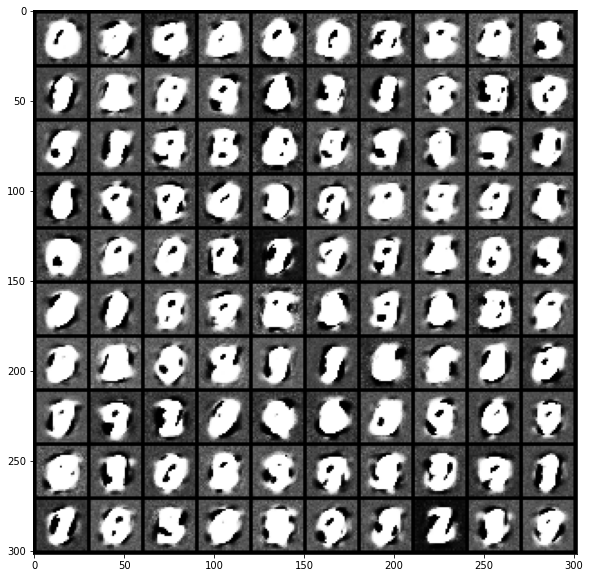

In [26]:
# show output after epochs training
plt.figure(figsize=(10, 10))
plt.grid(False)
plt.imshow(np.asarray(Image.open(os.path.join(sample_dir, "fake_images-0168.png"))))

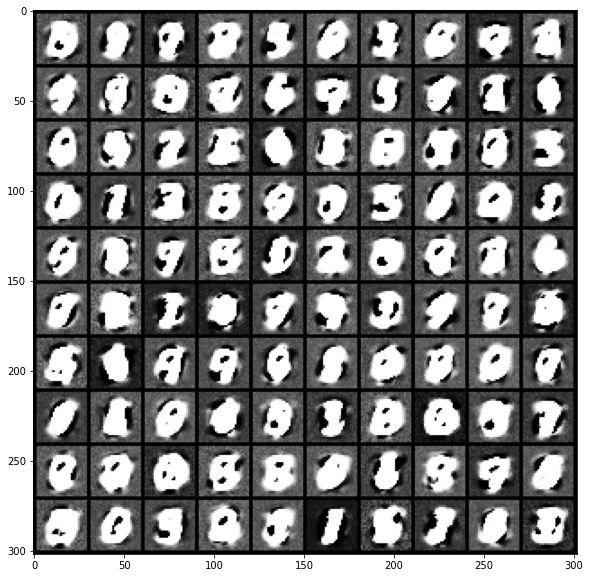

In [27]:
# show output after epochs training
plt.figure(figsize=(10, 10))
plt.grid(False)
plt.imshow(np.asarray(Image.open(os.path.join(sample_dir, "fake_images-0167.png"))))

In [ ]:
1+1

In [23]:
1+1

2